In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import math
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as snsbb


In [2]:
summary_df = pd.read_csv('Research_Firearm/summary_test.csv')

In [3]:
summary_df

Precinct  Year        Borough    Budget  Full Time Positions  \
0           40  2006          Bronx  13116563                  329   
1           41  2006          Bronx  10065880                  240   
2           42  2006          Bronx  10284423                  237   
3           44  2006          Bronx  14762864                  386   
4           46  2006          Bronx  14793947                  379   
...        ...   ...            ...       ...                  ...   
1235       113  2022   QUEENS SOUTH  20999094                  219   
1236       101  2022   QUEENS SOUTH  17684040                  224   
1237       120  2022  STATEN ISLAND  28791443                  399   
1238       123  2022  STATEN ISLAND  13044192                  148   
1239       122  2022  STATEN ISLAND  19370626                  249   

      Population_2010  
0               91497  
1               52246  
2               79762  
3              146441  
4              128200  
...               ...  
1235           120116  
1236            66962  
1237           112569  
1238            97894  
1239           138982  

[1240 rows x 6 columns]

In [4]:
#merged_pivot = pd.read_csv('csv_for_TS_Da_prepare/merged_pivot_test.csv')
merged_pivot = pd.read_csv('Research_Firearm/merged_pivot_test.csv')

In [5]:
merged_pivot

Year  Precinct  Full Time Positions    Budget          Borough  \
0     2006         1                  219  11001943  MANHATTAN SOUTH   
1     2006         5                  240  12354423  MANHATTAN SOUTH   
2     2006         6                  237  10716126  MANHATTAN SOUTH   
3     2006         7                  174   7786080  MANHATTAN SOUTH   
4     2006         9                  234  10190005  MANHATTAN SOUTH   
...    ...       ...                  ...       ...              ...   
1235  2022       114                  252  20127717     QUEENS NORTH   
1236  2022       115                  289  16569581     QUEENS NORTH   
1237  2022       120                  399  28791443    STATEN ISLAND   
1238  2022       122                  249  19370626    STATEN ISLAND   
1239  2022       123                  148  13044192    STATEN ISLAND   

      Population_2010  Citizen_2010 Poverty Rate_2010 Immigration Rates 2010  \
0               66033         44138             6.12%                 33.16%   
1               52683         37193            24.59%                 29.40%   
2               62226         50266             6.20%                 19.22%   
3               56240         43853            29.72%                 22.03%   
4               76443         58772            21.06%                 23.12%   
...               ...           ...               ...                    ...   
1235           202766        129728            16.62%                 36.02%   
1236           171576         80034            19.76%                 53.35%   
1237           112569         73854            19.79%                 34.39%   
1238           138982        103552             9.18%                 25.49%   
1239            97894         75250             7.23%                 23.13%   

      Budget per Capita  BURGLARY  FELONY ASSAULT  GRAND LARCENY  \
0                166.61       255              94           1462   
1                234.50       152             104            605   
2                172.21       280             123           1283   
3                138.44       127             105            362   
4                133.30       297             165            775   
...                 ...       ...             ...            ...   
1235              99.27       269             489            883   
1236              96.57       152             410            970   
1237             255.77       124             386            338   
1238             139.38        92             128            373   
1239             133.25        43              53            271   

      GRAND LARCENY OF MOTOR VEHICLE  MURDER & NON NEGL. MANSLAUGHTER  RAPE  \
0                                 78                                1     4   
1                                 40                                2     5   
2                                 70                                3     6   
3                                 83                                4     7   
4                                 75                                1    14   
...                              ...                              ...   ...   
1235                             360                                4    26   
1236                             320                                3    38   
1237                             136                                7    14   
1238                             136                                1     8   
1239                             126                                2     3   

      ROBBERY  TOTAL SEVEN MAJOR FELONY OFFENSES  
0         119                               2013  
1         132                               1040  
2         214                               1979  
3         176                                864  
4         252                               1579  
...       ...                                ...  
1235      266                               2297  
1236  

In [6]:
# Assuming 'merged_pivot' is your DataFrame

table_for_tableau = merged_pivot.copy()
# Create 'Violent Crime' column
table_for_tableau['Violent Crime'] = table_for_tableau['FELONY ASSAULT'] + table_for_tableau['MURDER & NON NEGL. MANSLAUGHTER'] + table_for_tableau['RAPE'] + table_for_tableau['ROBBERY']

# Create 'Property Crime' column
table_for_tableau['Property Crime'] = table_for_tableau['GRAND LARCENY'] + table_for_tableau['GRAND LARCENY OF MOTOR VEHICLE'] + table_for_tableau['BURGLARY']

# Display the updated DataFrame
table_for_tableau

Year  Precinct  Full Time Positions    Budget          Borough  \
0     2006         1                  219  11001943  MANHATTAN SOUTH   
1     2006         5                  240  12354423  MANHATTAN SOUTH   
2     2006         6                  237  10716126  MANHATTAN SOUTH   
3     2006         7                  174   7786080  MANHATTAN SOUTH   
4     2006         9                  234  10190005  MANHATTAN SOUTH   
...    ...       ...                  ...       ...              ...   
1235  2022       114                  252  20127717     QUEENS NORTH   
1236  2022       115                  289  16569581     QUEENS NORTH   
1237  2022       120                  399  28791443    STATEN ISLAND   
1238  2022       122                  249  19370626    STATEN ISLAND   
1239  2022       123                  148  13044192    STATEN ISLAND   

      Population_2010  Citizen_2010 Poverty Rate_2010 Immigration Rates 2010  \
0               66033         44138             6.12%                 33.16%   
1               52683         37193            24.59%                 29.40%   
2               62226         50266             6.20%                 19.22%   
3               56240         43853            29.72%                 22.03%   
4               76443         58772            21.06%                 23.12%   
...               ...           ...               ...                    ...   
1235           202766        129728            16.62%                 36.02%   
1236           171576         80034            19.76%                 53.35%   
1237           112569         73854            19.79%                 34.39%   
1238           138982        103552             9.18%                 25.49%   
1239            97894         75250             7.23%                 23.13%   

      Budget per Capita  BURGLARY  FELONY ASSAULT  GRAND LARCENY  \
0                166.61       255              94           1462   
1                234.50       152             104            605   
2                172.21       280             123           1283   
3                138.44       127             105            362   
4                133.30       297             165            775   
...                 ...       ...             ...            ...   
1235              99.27       269             489            883   
1236              96.57       152             410            970   
1237             255.77       124             386            338   
1238             139.38        92             128            373   
1239             133.25        43              53            271   

      GRAND LARCENY OF MOTOR VEHICLE  MURDER & NON NEGL. MANSLAUGHTER  RAPE  \
0                                 78                                1     4   
1                                 40                                2     5   
2                                 70                                3     6   
3                                 83                                4     7   
4                                 75                                1    14   
...                              ...                              ...   ...   
1235                             360                                4    26   
1236                             320                                3    38   
1237                             136                                7    14   
1238                             136                                1     8   
1239                             126                                2     3   

      ROBBERY  TOTAL SEVEN MAJOR FELONY OFFENSES  Violent Crime  \
0         119                               2013            218   
1         132                               1040            243   
2         214                               1979            346   
3         176                                864            292   
4         252                               1579            432   
...       ..

In [7]:
# Assuming 'table_for_tableau' is your DataFrame with 'Violent Crime' and 'Property Crime' columns

# Calculate the sum of 'Violent Crime' and 'Property Crime'
table_for_tableau['Calculated Total'] = table_for_tableau['Violent Crime'] + table_for_tableau['Property Crime']

# Compare with 'TOTAL SEVEN MAJOR FELONY OFFENSES' and create a validation column
table_for_tableau['Validation'] = table_for_tableau['Calculated Total'] == table_for_tableau['TOTAL SEVEN MAJOR FELONY OFFENSES']

# Display the DataFrame with the new columns
table_for_tableau

# Export the DataFrame to a CSV file
table_for_tableau.to_csv('table_for_tableau.csv', index=False)

In [8]:
# Calculate the number of 'True' values in 'Validation'
true_count = table_for_tableau['Validation'].sum()

# Get the total number of rows
total_rows = table_for_tableau.shape[0]

# Calculate the percentage of 'True' values
percentage_true = (true_count / total_rows) * 100

# Print the percentage
print(f"Percentage of True in Validation: {percentage_true:.2f}%")

Percentage of True in Validation: 100.00%


In [9]:
#shooting_historic = pd.read_csv('csv_for_TS_Da_prepare/NYPD_Shooting_Incident_Data__Historic_.csv')
shooting_historic = pd.read_csv('Research_Firearm/NYPD_Shooting_Incident_Data__Historic_.csv')
shooting_historic['Year'] = pd.to_datetime(shooting_historic['OCCUR_DATE']).dt.year
shooting_historic = shooting_historic[['INCIDENT_KEY','Year','PRECINCT']]
shooting_historic = shooting_historic.drop_duplicates()

In [10]:
shooting_historic

INCIDENT_KEY  Year  PRECINCT
0         236168668  2021        79
1         231008085  2021        72
2         230717903  2021        79
3         237712309  2021        81
4         224465521  2021       113
...             ...   ...       ...
25591     186329304  2018        84
25592      29277330  2007        81
25593      77443443  2011        81
25594     176027888  2018        43
25595     218777493  2020       113

[20126 rows x 3 columns]

In [11]:
min_year = shooting_historic['Year'].min()
max_year = shooting_historic['Year'].max()

print(f"The range of the 'Year' column is from {min_year} to {max_year}.")

The range of the 'Year' column is from 2006 to 2021.


In [12]:
# Count the number of shootings by Year and PRECINCT
shootings_count = shooting_historic.groupby(['Year', 'PRECINCT']).size().reset_index(name='Shootings')

# Merge with merged_pivot table
merged_data = pd.merge(merged_pivot, shootings_count, how='left', left_on=['Year', 'Precinct'], right_on=['Year', 'PRECINCT'])

# Fill NaN values in the Shootings column with 0 (assuming that NaN means there were no shootings)
merged_data['Shootings'].fillna(0, inplace=True)

# You can now drop the redundant PRECINCT column
merged_data.drop('PRECINCT', axis=1, inplace=True)

In [13]:
merged_data

Year  Precinct  Full Time Positions    Budget          Borough  \
0     2006         1                  219  11001943  MANHATTAN SOUTH   
1     2006         5                  240  12354423  MANHATTAN SOUTH   
2     2006         6                  237  10716126  MANHATTAN SOUTH   
3     2006         7                  174   7786080  MANHATTAN SOUTH   
4     2006         9                  234  10190005  MANHATTAN SOUTH   
...    ...       ...                  ...       ...              ...   
1235  2022       114                  252  20127717     QUEENS NORTH   
1236  2022       115                  289  16569581     QUEENS NORTH   
1237  2022       120                  399  28791443    STATEN ISLAND   
1238  2022       122                  249  19370626    STATEN ISLAND   
1239  2022       123                  148  13044192    STATEN ISLAND   

      Population_2010  Citizen_2010 Poverty Rate_2010 Immigration Rates 2010  \
0               66033         44138             6.12%                 33.16%   
1               52683         37193            24.59%                 29.40%   
2               62226         50266             6.20%                 19.22%   
3               56240         43853            29.72%                 22.03%   
4               76443         58772            21.06%                 23.12%   
...               ...           ...               ...                    ...   
1235           202766        129728            16.62%                 36.02%   
1236           171576         80034            19.76%                 53.35%   
1237           112569         73854            19.79%                 34.39%   
1238           138982        103552             9.18%                 25.49%   
1239            97894         75250             7.23%                 23.13%   

      Budget per Capita  BURGLARY  FELONY ASSAULT  GRAND LARCENY  \
0                166.61       255              94           1462   
1                234.50       152             104            605   
2                172.21       280             123           1283   
3                138.44       127             105            362   
4                133.30       297             165            775   
...                 ...       ...             ...            ...   
1235              99.27       269             489            883   
1236              96.57       152             410            970   
1237             255.77       124             386            338   
1238             139.38        92             128            373   
1239             133.25        43              53            271   

      GRAND LARCENY OF MOTOR VEHICLE  MURDER & NON NEGL. MANSLAUGHTER  RAPE  \
0                                 78                                1     4   
1                                 40                                2     5   
2                                 70                                3     6   
3                                 83                                4     7   
4                                 75                                1    14   
...                              ...                              ...   ...   
1235                             360                                4    26   
1236                             320                                3    38   
1237                             136                                7    14   
1238                             136                                1     8   
1239                             126                                2     3   

      ROBBERY  TOTAL SEVEN MAJOR FELONY OFFENSES  Shootings  
0         119                               2013        0.0  
1         132                               1040        2.0  
2         214                               1979        1.0  
3         176                                864        7.0  
4         252                               1579        3.0  
...       ...                             

In [14]:
# Calculate yearly totals
yearly_totals = merged_data.groupby('Year').sum().reset_index()

# List of metrics for which you want to calculate yearly totals
metrics = ['BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE', 
           'MURDER & NON NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY', 'TOTAL SEVEN MAJOR FELONY OFFENSES', 
           'Shootings', 'Budget']

# Rename columns to *_by_year
yearly_totals = yearly_totals.rename(columns={metric: f"{metric.lower()}_by_year" for metric in metrics})

# Merge yearly totals with merged_data
merged_data = pd.merge(merged_data, yearly_totals[['Year'] + [f"{metric.lower()}_by_year" for metric in metrics]], 
                       on='Year', how='left')

# Now, calculate the percentage-based columns, for example:
merged_data['Burglary_pct'] = merged_data['BURGLARY'] / merged_data['burglary_by_year']

# And the per capita rate:
merged_data['Burglary_per_capita'] = merged_data['BURGLARY'] / merged_data['Population_2010']




In [15]:
merged_data

Year  Precinct  Full Time Positions    Budget          Borough  \
0     2006         1                  219  11001943  MANHATTAN SOUTH   
1     2006         5                  240  12354423  MANHATTAN SOUTH   
2     2006         6                  237  10716126  MANHATTAN SOUTH   
3     2006         7                  174   7786080  MANHATTAN SOUTH   
4     2006         9                  234  10190005  MANHATTAN SOUTH   
...    ...       ...                  ...       ...              ...   
1235  2022       114                  252  20127717     QUEENS NORTH   
1236  2022       115                  289  16569581     QUEENS NORTH   
1237  2022       120                  399  28791443    STATEN ISLAND   
1238  2022       122                  249  19370626    STATEN ISLAND   
1239  2022       123                  148  13044192    STATEN ISLAND   

      Population_2010  Citizen_2010 Poverty Rate_2010 Immigration Rates 2010  \
0               66033         44138             6.12%                 33.16%   
1               52683         37193            24.59%                 29.40%   
2               62226         50266             6.20%                 19.22%   
3               56240         43853            29.72%                 22.03%   
4               76443         58772            21.06%                 23.12%   
...               ...           ...               ...                    ...   
1235           202766        129728            16.62%                 36.02%   
1236           171576         80034            19.76%                 53.35%   
1237           112569         73854            19.79%                 34.39%   
1238           138982        103552             9.18%                 25.49%   
1239            97894         75250             7.23%                 23.13%   

      Budget per Capita  ...  grand larceny_by_year  \
0                166.61  ...                  41309   
1                234.50  ...                  41309   
2                172.21  ...                  41309   
3                138.44  ...                  41309   
4                133.30  ...                  41309   
...                 ...  ...                    ...   
1235              99.27  ...                  46698   
1236              96.57  ...                  46698   
1237             255.77  ...                  46698   
1238             139.38  ...                  46698   
1239             133.25  ...                  46698   

      grand larceny of motor vehicle_by_year  \
0                                      15646   
1                                      15646   
2                                      15646   
3                                      15646   
4                                      15646   
...                                      ...   
1235                                   13450   
1236                                   13450   
1237                                   13450   
1238                                   13450   
1239                                   13450   

      murder & non negl. manslaughter_by_year  rape_by_year  robbery_by_year  \
0                                         591          1516            23197   
1                                         591          1516            23197   
2                                         591          1516            23197   
3                                         591          1516            23197   
4                                         591          1516            23197   
...                                       ...           ...              ...   
1235                                      427          1556            16484   
1236                                      427          1556            16484   
1237                                      427          1556            16484   
1238                                      427          1556            16484   
1239                                      427          1556   

In [16]:
na_per_column = merged_data.isna().sum()
print(na_per_column)

Year                                         0
Precinct                                     0
Full Time Positions                          0
Budget                                       0
Borough                                      0
Population_2010                              0
Citizen_2010                                 0
Poverty Rate_2010                            0
Immigration Rates 2010                       0
Budget per Capita                            0
BURGLARY                                     0
FELONY ASSAULT                               0
GRAND LARCENY                                0
GRAND LARCENY OF MOTOR VEHICLE               0
MURDER & NON NEGL. MANSLAUGHTER              0
RAPE                                         0
ROBBERY                                      0
TOTAL SEVEN MAJOR FELONY OFFENSES            0
Shootings                                    0
burglary_by_year                             0
felony assault_by_year                       0
grand larceny

In [17]:
# List of metrics for which you want to calculate yearly totals and per capita rates
metrics = ['FELONY ASSAULT', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE', 
           'MURDER & NON NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY', 'TOTAL SEVEN MAJOR FELONY OFFENSES', 
           'Shootings', 'Budget']

# Loop through each metric
for metric in metrics:
    # Compute the per capita rate
    per_capita_col_name = f"{metric}_per_capita"
    merged_data[per_capita_col_name] = merged_data[metric] / merged_data['Population_2010']
    
    # Compute the percentage-based rate
    pct_col_name = f"{metric}_pct"
    yearly_col_name = f"{metric.lower()}_by_year"
    merged_data[pct_col_name] = merged_data[metric] / merged_data[yearly_col_name]









In [18]:
print(merged_data.groupby('Year')['Burglary_pct'].sum())
print(merged_data.groupby('Year')['FELONY ASSAULT_pct'].sum())
print(merged_data.groupby('Year')['GRAND LARCENY_pct'].sum())
print(merged_data.groupby('Year')['GRAND LARCENY OF MOTOR VEHICLE_pct'].sum())
print(merged_data.groupby('Year')['MURDER & NON NEGL. MANSLAUGHTER_pct'].sum())
print(merged_data.groupby('Year')['RAPE_pct'].sum())
print(merged_data.groupby('Year')['ROBBERY_pct'].sum())
print(merged_data.groupby('Year')['Shootings_pct'].sum())
print(merged_data.groupby('Year')['Budget_pct'].sum())

Year
2006    1.0
2007    1.0
2008    1.0
2009    1.0
2010    1.0
2011    1.0
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
2018    1.0
2019    1.0
2020    1.0
2021    1.0
2022    1.0
Name: Burglary_pct, dtype: float64
Year
2006    1.0
2007    1.0
2008    1.0
2009    1.0
2010    1.0
2011    1.0
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
2018    1.0
2019    1.0
2020    1.0
2021    1.0
2022    1.0
Name: FELONY ASSAULT_pct, dtype: float64
Year
2006    1.0
2007    1.0
2008    1.0
2009    1.0
2010    1.0
2011    1.0
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
2018    1.0
2019    1.0
2020    1.0
2021    1.0
2022    1.0
Name: GRAND LARCENY_pct, dtype: float64
Year
2006    1.0
2007    1.0
2008    1.0
2009    1.0
2010    1.0
2011    1.0
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
2018    1.0
2019    1.0
2020    1.0
2021    1.0
2022    1.0
Name: GRAND LARCENY OF MOTOR VEHICLE_pct, dtype:

In [19]:
merged_data.to_csv('pre_merge_ts.csv', index=False)

In [20]:
#pre_ts_analysis = pd.read_csv('csv_for_TS_Da_prepare/pre_ts_analysis.csv')
pre_ts_analysis = pd.read_csv('Research_Firearm/pre_ts_analysis.csv')


In [21]:
pre_ts_analysis

Year  Precinct  Full Time Positions    Budget          Borough  \
0     2006         1                  219  11001943  MANHATTAN SOUTH   
1     2006         5                  240  12354423  MANHATTAN SOUTH   
2     2006         6                  237  10716126  MANHATTAN SOUTH   
3     2006         7                  174   7786080  MANHATTAN SOUTH   
4     2006         9                  234  10190005  MANHATTAN SOUTH   
...    ...       ...                  ...       ...              ...   
1235  2022       114                  252  20127717     QUEENS NORTH   
1236  2022       115                  289  16569581     QUEENS NORTH   
1237  2022       120                  399  28791443    STATEN ISLAND   
1238  2022       122                  249  19370626    STATEN ISLAND   
1239  2022       123                  148  13044192    STATEN ISLAND   

      Citizen_2010 Poverty Rate_2010 Immigration Rates 2010  \
0            44138             6.12%                 33.16%   
1            37193            24.59%                 29.40%   
2            50266             6.20%                 19.22%   
3            43853            29.72%                 22.03%   
4            58772            21.06%                 23.12%   
...            ...               ...                    ...   
1235        129728            16.62%                 36.02%   
1236         80034            19.76%                 53.35%   
1237         73854            19.79%                 34.39%   
1238        103552             9.18%                 25.49%   
1239         75250             7.23%                 23.13%   

      Budget per Capita  BURGLARY  ...  RAPE_pct  ROBBERY_per_capita  \
0                166.61       255  ...  0.002639            0.001802   
1                234.50       152  ...  0.003298            0.002506   
2                172.21       280  ...  0.003958            0.003439   
3                138.44       127  ...  0.004617            0.003129   
4                133.30       297  ...  0.009235            0.003297   
...                 ...       ...  ...       ...                 ...   
1235              99.27       269  ...  0.016710            0.001312   
1236              96.57       152  ...  0.024422            0.001818   
1237             255.77       124  ...  0.008997            0.001039   
1238             139.38        92  ...  0.005141            0.000453   
1239             133.25        43  ...  0.001928            0.000225   

      ROBBERY_pct  TOTAL SEVEN MAJOR FELONY OFFENSES_per_capita  \
0        0.005130                                      0.030485   
1        0.005690                                      0.019741   
2        0.009225                                      0.031803   
3        0.007587                                      0.015363   
4        0.010863                                      0.020656   
...           ...                                           ...   
1235     0.016137                                      0.011328   
1236     0.018927                                      0.012851   
1237     0.007098                                      0.009967   
1238     0.003822                                      0.005763   
1239     0.001335                                      0.005312   

      TOTAL SEVEN MAJOR FELONY OFFENSES_pct  Shootings_per_capita  \
0                                  0.016574              0.000000   
1                                  0.008563              0.000038   
2                                  0.016294              0.000016   
3                                  0.007114              0.000124   
4                                  0.013000              0.000039   
...                                     ...                   ...   
1235                               0.019405              0.000000   
1236                               0.018628              0.000000   
1237                               0.009479              0.000000   
1238                    

In [22]:
import pandas as pd

# Setting pandas to display all columns
pd.set_option('display.max_columns', None)

# Your code to work with DataFrames here



In [23]:
pre_ts_analysis

Year  Precinct  Full Time Positions    Budget          Borough  \
0     2006         1                  219  11001943  MANHATTAN SOUTH   
1     2006         5                  240  12354423  MANHATTAN SOUTH   
2     2006         6                  237  10716126  MANHATTAN SOUTH   
3     2006         7                  174   7786080  MANHATTAN SOUTH   
4     2006         9                  234  10190005  MANHATTAN SOUTH   
...    ...       ...                  ...       ...              ...   
1235  2022       114                  252  20127717     QUEENS NORTH   
1236  2022       115                  289  16569581     QUEENS NORTH   
1237  2022       120                  399  28791443    STATEN ISLAND   
1238  2022       122                  249  19370626    STATEN ISLAND   
1239  2022       123                  148  13044192    STATEN ISLAND   

      Citizen_2010 Poverty Rate_2010 Immigration Rates 2010  \
0            44138             6.12%                 33.16%   
1            37193            24.59%                 29.40%   
2            50266             6.20%                 19.22%   
3            43853            29.72%                 22.03%   
4            58772            21.06%                 23.12%   
...            ...               ...                    ...   
1235        129728            16.62%                 36.02%   
1236         80034            19.76%                 53.35%   
1237         73854            19.79%                 34.39%   
1238        103552             9.18%                 25.49%   
1239         75250             7.23%                 23.13%   

      Budget per Capita  BURGLARY  FELONY ASSAULT  GRAND LARCENY  \
0                166.61       255              94           1462   
1                234.50       152             104            605   
2                172.21       280             123           1283   
3                138.44       127             105            362   
4                133.30       297             165            775   
...                 ...       ...             ...            ...   
1235              99.27       269             489            883   
1236              96.57       152             410            970   
1237             255.77       124             386            338   
1238             139.38        92             128            373   
1239             133.25        43              53            271   

      GRAND LARCENY OF MOTOR VEHICLE  MURDER & NON NEGL. MANSLAUGHTER  RAPE  \
0                                 78                                1     4   
1                                 40                                2     5   
2                                 70                                3     6   
3                                 83                                4     7   
4                                 75                                1    14   
...                              ...                              ...   ...   
1235                             360                                4    26   
1236                             320                                3    38   
1237                             136                                7    14   
1238                             136                                1     8   
1239                             126                                2     3   

      ROBBERY  TOTAL SEVEN MAJOR FELONY OFFENSES  Shootings  burglary_by_year  \
0         119                               2013        0.0             22234   
1         132                               1040        2.0             22234   
2         214                               1979        1.0             22234   
3         176                                864        7.0             22234   
4         252                               1579        3.0             22234   
...       ...                                ...        ...               ...   
1235      266                               2297   

In [24]:
pre_ts_analysis_pre_v = pre_ts_analysis[['Year', 'Precinct', 'Budget', 'BURGLARY', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE', 'TOTAL SEVEN MAJOR FELONY OFFENSES', 'Population_Year']]

In [25]:
pre_ts_analysis_pre_v

Year  Precinct    Budget  BURGLARY  GRAND LARCENY  \
0     2006         1  11001943       255           1462   
1     2006         5  12354423       152            605   
2     2006         6  10716126       280           1283   
3     2006         7   7786080       127            362   
4     2006         9  10190005       297            775   
...    ...       ...       ...       ...            ...   
1235  2022       114  20127717       269            883   
1236  2022       115  16569581       152            970   
1237  2022       120  28791443       124            338   
1238  2022       122  19370626        92            373   
1239  2022       123  13044192        43            271   

      GRAND LARCENY OF MOTOR VEHICLE  TOTAL SEVEN MAJOR FELONY OFFENSES  \
0                                 78                               2013   
1                                 40                               1040   
2                                 70                               1979   
3                                 83                                864   
4                                 75                               1579   
...                              ...                                ...   
1235                             360                               2297   
1236                             320                               2205   
1237                             136                               1122   
1238                             136                                801   
1239                             126                                520   

      Population_Year  
0               59431  
1               53356  
2               61259  
3               55703  
4               76639  
...               ...  
1235           209676  
1236           180645  
1237           124168  
1238           145666  
1239           101279  

[1240 rows x 8 columns]

In [26]:
# Grouping by 'Year' and summing 'TOTAL SEVEN MAJOR FELONY OFFENSES'
total_seven_per_year = pre_ts_analysis_pre_v.groupby('Year')['TOTAL SEVEN MAJOR FELONY OFFENSES'].sum().reset_index(name='Total Seven for Year')

# Merging this back into the original DataFrame
pre_ts_analysis_pre_v_y = pre_ts_analysis_pre_v.merge(total_seven_per_year, on='Year')

In [27]:
pre_ts_analysis_pre_v_y

Year  Precinct    Budget  BURGLARY  GRAND LARCENY  \
0     2006         1  11001943       255           1462   
1     2006         5  12354423       152            605   
2     2006         6  10716126       280           1283   
3     2006         7   7786080       127            362   
4     2006         9  10190005       297            775   
...    ...       ...       ...       ...            ...   
1235  2022       114  20127717       269            883   
1236  2022       115  16569581       152            970   
1237  2022       120  28791443       124            338   
1238  2022       122  19370626        92            373   
1239  2022       123  13044192        43            271   

      GRAND LARCENY OF MOTOR VEHICLE  TOTAL SEVEN MAJOR FELONY OFFENSES  \
0                                 78                               2013   
1                                 40                               1040   
2                                 70                               1979   
3                                 83                                864   
4                                 75                               1579   
...                              ...                                ...   
1235                             360                               2297   
1236                             320                               2205   
1237                             136                               1122   
1238                             136                                801   
1239                             126                                520   

      Population_Year  Total Seven for Year  
0               59431                121457  
1               53356                121457  
2               61259                121457  
3               55703                121457  
4               76639                121457  
...               ...                   ...  
1235           209676                118373  
1236           180645                118373  
1237           124168                118373  
1238           145666                118373  
1239           101279                118373  

[1240 rows x 9 columns]

In [28]:
# Assuming pre_ts_analysis_pre_v is your DataFrame

# Grouping by 'Year' and calculating the total budget for each year
budget_per_year = pre_ts_analysis_pre_v.groupby('Year')['Budget'].sum().reset_index(name='Budget for Year')

# Grouping by 'Year' and calculating the total property crimes for each year
property_crimes_per_year = pre_ts_analysis_pre_v.groupby('Year')[['BURGLARY', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE']].sum()
property_crimes_per_year['Property Crime for Year'] = property_crimes_per_year.sum(axis=1)
property_crimes_per_year = property_crimes_per_year.reset_index()

# Calculating 'Violent Crime for Year'
total_crimes_per_year = pre_ts_analysis_pre_v.groupby('Year')['TOTAL SEVEN MAJOR FELONY OFFENSES'].sum().reset_index()
violent_crimes_per_year = pd.merge(total_crimes_per_year, property_crimes_per_year[['Year', 'Property Crime for Year']], on='Year')
violent_crimes_per_year['Violent Crime for Year'] = violent_crimes_per_year['TOTAL SEVEN MAJOR FELONY OFFENSES'] - violent_crimes_per_year['Property Crime for Year']

# Merging all results into final_df
pre_ts_analysis_pre_v_test = pd.merge(budget_per_year, property_crimes_per_year[['Year', 'Property Crime for Year']], on='Year')
pre_ts_analysis_pre_v_test = pd.merge(pre_ts_analysis_pre_v_test, violent_crimes_per_year[['Year', 'Violent Crime for Year']], on='Year')

In [29]:
pre_ts_analysis_pre_v_test

Year  Budget for Year  Property Crime for Year  Violent Crime for Year
0   2006        775570787                    79189                   42268
1   2007        901697223                    73850                   40323
2   2008        928149006                    71694                   39739
3   2009        928149006                    64462                   36389
4   2010        941632319                    61952                   37662
5   2011       1139619643                    61970                   39474
6   2012       1064812342                    65359                   40819
7   2013       1116323671                    65307                   40242
8   2014       1119114121                    64072                   36980
9   2015       1114301121                    61320                   37429
10  2016       1127954121                    58446                   36483
11  2017       1171442894                    56033                   34248
12  2018       1262305132                    55846                   33947
13  2019       1254917566                    54716                   34879
14  2020       1240915936                    55468                   33904
15  2021       1233116678                    59984                   37072
16  2022       1255392341                    74935                   43438

In [30]:
# Resetting the option to default (usually 20)
pd.reset_option('display.max_columns')

In [31]:
na_per_column = pre_ts_analysis.isna().sum()
print(na_per_column)

Year                                             0
Precinct                                         0
Full Time Positions                              0
Budget                                           0
Borough                                          0
Citizen_2010                                     0
Poverty Rate_2010                                0
Immigration Rates 2010                           0
Budget per Capita                                0
BURGLARY                                         0
FELONY ASSAULT                                   0
GRAND LARCENY                                    0
GRAND LARCENY OF MOTOR VEHICLE                   0
MURDER & NON NEGL. MANSLAUGHTER                  0
RAPE                                             0
ROBBERY                                          0
TOTAL SEVEN MAJOR FELONY OFFENSES                0
Shootings                                        0
burglary_by_year                                 0
felony assault_by_year         

In [32]:
pre_ts_analysis_no_2022 = pre_ts_analysis[pre_ts_analysis['Year'] != 2022]


In [33]:
pre_ts_analysis

Year  Precinct  Full Time Positions    Budget          Borough  \
0     2006         1                  219  11001943  MANHATTAN SOUTH   
1     2006         5                  240  12354423  MANHATTAN SOUTH   
2     2006         6                  237  10716126  MANHATTAN SOUTH   
3     2006         7                  174   7786080  MANHATTAN SOUTH   
4     2006         9                  234  10190005  MANHATTAN SOUTH   
...    ...       ...                  ...       ...              ...   
1235  2022       114                  252  20127717     QUEENS NORTH   
1236  2022       115                  289  16569581     QUEENS NORTH   
1237  2022       120                  399  28791443    STATEN ISLAND   
1238  2022       122                  249  19370626    STATEN ISLAND   
1239  2022       123                  148  13044192    STATEN ISLAND   

      Citizen_2010 Poverty Rate_2010 Immigration Rates 2010  \
0            44138             6.12%                 33.16%   
1            37193            24.59%                 29.40%   
2            50266             6.20%                 19.22%   
3            43853            29.72%                 22.03%   
4            58772            21.06%                 23.12%   
...            ...               ...                    ...   
1235        129728            16.62%                 36.02%   
1236         80034            19.76%                 53.35%   
1237         73854            19.79%                 34.39%   
1238        103552             9.18%                 25.49%   
1239         75250             7.23%                 23.13%   

      Budget per Capita  BURGLARY  ...  RAPE_pct  ROBBERY_per_capita  \
0                166.61       255  ...  0.002639            0.001802   
1                234.50       152  ...  0.003298            0.002506   
2                172.21       280  ...  0.003958            0.003439   
3                138.44       127  ...  0.004617            0.003129   
4                133.30       297  ...  0.009235            0.003297   
...                 ...       ...  ...       ...                 ...   
1235              99.27       269  ...  0.016710            0.001312   
1236              96.57       152  ...  0.024422            0.001818   
1237             255.77       124  ...  0.008997            0.001039   
1238             139.38        92  ...  0.005141            0.000453   
1239             133.25        43  ...  0.001928            0.000225   

      ROBBERY_pct  TOTAL SEVEN MAJOR FELONY OFFENSES_per_capita  \
0        0.005130                                      0.030485   
1        0.005690                                      0.019741   
2        0.009225                                      0.031803   
3        0.007587                                      0.015363   
4        0.010863                                      0.020656   
...           ...                                           ...   
1235     0.016137                                      0.011328   
1236     0.018927                                      0.012851   
1237     0.007098                                      0.009967   
1238     0.003822                                      0.005763   
1239     0.001335                                      0.005312   

      TOTAL SEVEN MAJOR FELONY OFFENSES_pct  Shootings_per_capita  \
0                                  0.016574              0.000000   
1                                  0.008563              0.000038   
2                                  0.016294              0.000016   
3                                  0.007114              0.000124   
4                                  0.013000              0.000039   
...                                     ...                   ...   
1235                               0.019405              0.000000   
1236                               0.018628              0.000000   
1237                               0.009479              0.000000   
1238                    

In [34]:
pre_ts_analysis.columns

Index(['Year', 'Precinct', 'Full Time Positions', 'Budget', 'Borough',
       'Citizen_2010', 'Poverty Rate_2010', 'Immigration Rates 2010',
       'Budget per Capita', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY',
       'GRAND LARCENY OF MOTOR VEHICLE', 'MURDER & NON NEGL. MANSLAUGHTER',
       'RAPE', 'ROBBERY', 'TOTAL SEVEN MAJOR FELONY OFFENSES', 'Shootings',
       'burglary_by_year', 'felony assault_by_year', 'grand larceny_by_year',
       'grand larceny of motor vehicle_by_year',
       'murder & non negl. manslaughter_by_year', 'rape_by_year',
       'robbery_by_year', 'total seven major felony offenses_by_year',
       'shootings_by_year', 'budget_by_year', 'Burglary_pct',
       'Burglary_per_capita', 'FELONY ASSAULT_per_capita',
       'FELONY ASSAULT_pct', 'GRAND LARCENY_per_capita', 'GRAND LARCENY_pct',
       'GRAND LARCENY OF MOTOR VEHICLE_per_capita',
       'GRAND LARCENY OF MOTOR VEHICLE_pct',
       'MURDER & NON NEGL. MANSLAUGHTER_per_capita',
       'MURDER & NO

In [35]:

# Get all columns ending with '_pct' or '_per_capita'
cols_to_lag = [col for col in pre_ts_analysis.columns if col.endswith('_pct') or col.endswith('_per_capita')]

# Loop through the columns and create a lag-1 column for each
for col in cols_to_lag:
    lag_col_name = col + '_lag1'  # Name of the new lag column
    pre_ts_analysis[lag_col_name] = pre_ts_analysis.groupby('Precinct')[col].shift(1)

In [36]:
pre_ts_analysis

Year  Precinct  Full Time Positions    Budget          Borough  \
0     2006         1                  219  11001943  MANHATTAN SOUTH   
1     2006         5                  240  12354423  MANHATTAN SOUTH   
2     2006         6                  237  10716126  MANHATTAN SOUTH   
3     2006         7                  174   7786080  MANHATTAN SOUTH   
4     2006         9                  234  10190005  MANHATTAN SOUTH   
...    ...       ...                  ...       ...              ...   
1235  2022       114                  252  20127717     QUEENS NORTH   
1236  2022       115                  289  16569581     QUEENS NORTH   
1237  2022       120                  399  28791443    STATEN ISLAND   
1238  2022       122                  249  19370626    STATEN ISLAND   
1239  2022       123                  148  13044192    STATEN ISLAND   

      Citizen_2010 Poverty Rate_2010 Immigration Rates 2010  \
0            44138             6.12%                 33.16%   
1            37193            24.59%                 29.40%   
2            50266             6.20%                 19.22%   
3            43853            29.72%                 22.03%   
4            58772            21.06%                 23.12%   
...            ...               ...                    ...   
1235        129728            16.62%                 36.02%   
1236         80034            19.76%                 53.35%   
1237         73854            19.79%                 34.39%   
1238        103552             9.18%                 25.49%   
1239         75250             7.23%                 23.13%   

      Budget per Capita  BURGLARY  ...  RAPE_per_capita_lag1  RAPE_pct_lag1  \
0                166.61       255  ...                   NaN            NaN   
1                234.50       152  ...                   NaN            NaN   
2                172.21       280  ...                   NaN            NaN   
3                138.44       127  ...                   NaN            NaN   
4                133.30       297  ...                   NaN            NaN   
...                 ...       ...  ...                   ...            ...   
1235              99.27       269  ...              0.000178       0.025210   
1236              96.57       152  ...              0.000181       0.021709   
1237             255.77       124  ...              0.000195       0.015406   
1238             139.38        92  ...              0.000043       0.004202   
1239             133.25        43  ...              0.000020       0.001401   

      ROBBERY_per_capita_lag1  ROBBERY_pct_lag1  \
0                         NaN               NaN   
1                         NaN               NaN   
2                         NaN               NaN   
3                         NaN               NaN   
4                         NaN               NaN   
...                       ...               ...   
1235                 0.001011          0.015546   
1236                 0.001457          0.018958   
1237                 0.000755          0.006446   
1238                 0.000317          0.003337   
1239                 0.000112          0.000834   

      TOTAL SEVEN MAJOR FELONY OFFENSES_per_capita_lag1  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
1235                                           0.009277   
1236                                           0.011324   
1237                                           0.007098   
1238                                           0.004763   
1239                                           0.003453   

      TOTAL SEVEN MAJOR FELONY OFFENSES_pct_lag1  Shootings_per_capita_lag1  \
0                                 

In [37]:
pre_ts_analysis

Year  Precinct  Full Time Positions    Budget          Borough  \
0     2006         1                  219  11001943  MANHATTAN SOUTH   
1     2006         5                  240  12354423  MANHATTAN SOUTH   
2     2006         6                  237  10716126  MANHATTAN SOUTH   
3     2006         7                  174   7786080  MANHATTAN SOUTH   
4     2006         9                  234  10190005  MANHATTAN SOUTH   
...    ...       ...                  ...       ...              ...   
1235  2022       114                  252  20127717     QUEENS NORTH   
1236  2022       115                  289  16569581     QUEENS NORTH   
1237  2022       120                  399  28791443    STATEN ISLAND   
1238  2022       122                  249  19370626    STATEN ISLAND   
1239  2022       123                  148  13044192    STATEN ISLAND   

      Citizen_2010 Poverty Rate_2010 Immigration Rates 2010  \
0            44138             6.12%                 33.16%   
1            37193            24.59%                 29.40%   
2            50266             6.20%                 19.22%   
3            43853            29.72%                 22.03%   
4            58772            21.06%                 23.12%   
...            ...               ...                    ...   
1235        129728            16.62%                 36.02%   
1236         80034            19.76%                 53.35%   
1237         73854            19.79%                 34.39%   
1238        103552             9.18%                 25.49%   
1239         75250             7.23%                 23.13%   

      Budget per Capita  BURGLARY  ...  RAPE_per_capita_lag1  RAPE_pct_lag1  \
0                166.61       255  ...                   NaN            NaN   
1                234.50       152  ...                   NaN            NaN   
2                172.21       280  ...                   NaN            NaN   
3                138.44       127  ...                   NaN            NaN   
4                133.30       297  ...                   NaN            NaN   
...                 ...       ...  ...                   ...            ...   
1235              99.27       269  ...              0.000178       0.025210   
1236              96.57       152  ...              0.000181       0.021709   
1237             255.77       124  ...              0.000195       0.015406   
1238             139.38        92  ...              0.000043       0.004202   
1239             133.25        43  ...              0.000020       0.001401   

      ROBBERY_per_capita_lag1  ROBBERY_pct_lag1  \
0                         NaN               NaN   
1                         NaN               NaN   
2                         NaN               NaN   
3                         NaN               NaN   
4                         NaN               NaN   
...                       ...               ...   
1235                 0.001011          0.015546   
1236                 0.001457          0.018958   
1237                 0.000755          0.006446   
1238                 0.000317          0.003337   
1239                 0.000112          0.000834   

      TOTAL SEVEN MAJOR FELONY OFFENSES_per_capita_lag1  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
1235                                           0.009277   
1236                                           0.011324   
1237                                           0.007098   
1238                                           0.004763   
1239                                           0.003453   

      TOTAL SEVEN MAJOR FELONY OFFENSES_pct_lag1  Shootings_per_capita_lag1  \
0                                 

In [38]:
# update new population data
# List of metrics for which you want to calculate yearly totals and per capita rates
metrics = ['FELONY ASSAULT', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE', 
           'MURDER & NON NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY', 'TOTAL SEVEN MAJOR FELONY OFFENSES', 
           'Shootings', 'Budget']

# Loop through each metric
for metric in metrics:
    # Compute the per capita rate using the updated Population_Year column
    per_capita_col_name = f"{metric}_per_capita"
    pre_ts_analysis[per_capita_col_name] = pre_ts_analysis[metric] / pre_ts_analysis['Population_Year']

In [39]:
na_counts = pre_ts_analysis.isna().sum()
print(na_counts)

Year                                           0
Precinct                                       0
Full Time Positions                            0
Budget                                         0
Borough                                        0
                                              ..
TOTAL SEVEN MAJOR FELONY OFFENSES_pct_lag1    73
Shootings_per_capita_lag1                     73
Shootings_pct_lag1                            73
Budget_per_capita_lag1                        73
Budget_pct_lag1                               73
Length: 69, dtype: int64


In [40]:
pre_ts_analysis.columns


Index(['Year', 'Precinct', 'Full Time Positions', 'Budget', 'Borough',
       'Citizen_2010', 'Poverty Rate_2010', 'Immigration Rates 2010',
       'Budget per Capita', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY',
       'GRAND LARCENY OF MOTOR VEHICLE', 'MURDER & NON NEGL. MANSLAUGHTER',
       'RAPE', 'ROBBERY', 'TOTAL SEVEN MAJOR FELONY OFFENSES', 'Shootings',
       'burglary_by_year', 'felony assault_by_year', 'grand larceny_by_year',
       'grand larceny of motor vehicle_by_year',
       'murder & non negl. manslaughter_by_year', 'rape_by_year',
       'robbery_by_year', 'total seven major felony offenses_by_year',
       'shootings_by_year', 'budget_by_year', 'Burglary_pct',
       'Burglary_per_capita', 'FELONY ASSAULT_per_capita',
       'FELONY ASSAULT_pct', 'GRAND LARCENY_per_capita', 'GRAND LARCENY_pct',
       'GRAND LARCENY OF MOTOR VEHICLE_per_capita',
       'GRAND LARCENY OF MOTOR VEHICLE_pct',
       'MURDER & NON NEGL. MANSLAUGHTER_per_capita',
       'MURDER & NO

In [41]:


# List of crimes to compute per_capita_lag1_pct for
crimes = ['Burglary', 'FELONY ASSAULT', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE', 
          'MURDER & NON NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY', 'Shootings']

for crime in crimes:
    column_name = f"{crime}_per_capita_lag1"
    total_column_name = f"NYC_{column_name}_total"
    
    # 1. Compute total crime_per_capita_lag1 for each year across all precincts
    nyc_totals = pre_ts_analysis.groupby('Year')[column_name].sum().reset_index()
    nyc_totals = nyc_totals.rename(columns={column_name: total_column_name})
    
    # 2. Merge the total back to the pre_ts_analysis DataFrame
    pre_ts_analysis = pd.merge(pre_ts_analysis, nyc_totals, on='Year', how='left')
    
    # 3. Compute the percentage
    pct_column_name = f"{crime}_per_capita_lag1_pct"
    pre_ts_analysis[pct_column_name] = (pre_ts_analysis[column_name] / pre_ts_analysis[total_column_name]) 
    
    # Drop the NYC total column
    pre_ts_analysis = pre_ts_analysis.drop(total_column_name, axis=1)


In [42]:
pre_ts_analysis.columns

Index(['Year', 'Precinct', 'Full Time Positions', 'Budget', 'Borough',
       'Citizen_2010', 'Poverty Rate_2010', 'Immigration Rates 2010',
       'Budget per Capita', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY',
       'GRAND LARCENY OF MOTOR VEHICLE', 'MURDER & NON NEGL. MANSLAUGHTER',
       'RAPE', 'ROBBERY', 'TOTAL SEVEN MAJOR FELONY OFFENSES', 'Shootings',
       'burglary_by_year', 'felony assault_by_year', 'grand larceny_by_year',
       'grand larceny of motor vehicle_by_year',
       'murder & non negl. manslaughter_by_year', 'rape_by_year',
       'robbery_by_year', 'total seven major felony offenses_by_year',
       'shootings_by_year', 'budget_by_year', 'Burglary_pct',
       'Burglary_per_capita', 'FELONY ASSAULT_per_capita',
       'FELONY ASSAULT_pct', 'GRAND LARCENY_per_capita', 'GRAND LARCENY_pct',
       'GRAND LARCENY OF MOTOR VEHICLE_per_capita',
       'GRAND LARCENY OF MOTOR VEHICLE_pct',
       'MURDER & NON NEGL. MANSLAUGHTER_per_capita',
       'MURDER & NO

In [43]:
# Compute Budget_per_capita_pct

# 1. Calculate the total Budget_per_capita for each year across all precincts
nyc_totals_budget = pre_ts_analysis.groupby('Year')['Budget_per_capita'].sum().reset_index()
nyc_totals_budget = nyc_totals_budget.rename(columns={'Budget_per_capita': 'budget_by_year'})

# 2. Merge this total with the main dataframe
pre_ts_analysis = pd.merge(pre_ts_analysis, nyc_totals_budget, on='Year', how='left')

# 3. Calculate the percentage using the correct column (budget_by_year_x in this case)
pre_ts_analysis['Budget_per_capita_pct'] = pre_ts_analysis['Budget_per_capita'] / pre_ts_analysis['budget_by_year_x']

# Compute Budget_per_capita_lag1_pct

# 1. Calculate the total Budget_per_capita_lag1 for each year across all precincts
nyc_totals_budget_lag1 = pre_ts_analysis.groupby('Year')['Budget_per_capita_lag1'].sum().reset_index()
nyc_totals_budget_lag1 = nyc_totals_budget_lag1.rename(columns={'Budget_per_capita_lag1': 'budget_lag1_by_year'})

# 2. Merge this total with the main dataframe
pre_ts_analysis = pd.merge(pre_ts_analysis, nyc_totals_budget_lag1, on='Year', how='left')

# 3. Calculate the percentage using the correct column (presumably budget_lag1_by_year if no naming collision occurred)
pre_ts_analysis['Budget_per_capita_lag1_pct'] = pre_ts_analysis['Budget_per_capita_lag1'] / pre_ts_analysis['budget_lag1_by_year']

# Cleanup
pre_ts_analysis.drop(columns=['budget_by_year_x', 'budget_lag1_by_year'], inplace=True)

In [44]:
# 1. Calculate the total Budget_per_capita for each year across all precincts
nyc_totals_budget = pre_ts_analysis.groupby('Year')['Budget_per_capita'].sum().reset_index()
nyc_totals_budget = nyc_totals_budget.rename(columns={'Budget_per_capita': 'total_budget_per_capita_by_year'})

# 2. Merge this total with the main dataframe
pre_ts_analysis = pd.merge(pre_ts_analysis, nyc_totals_budget, on='Year', how='left')

# 3. Calculate the percentage
pre_ts_analysis['Budget_per_capita_pct'] = pre_ts_analysis['Budget_per_capita'] / pre_ts_analysis['total_budget_per_capita_by_year']

# Now verify if the sum for Budget_per_capita_pct by Year is close to 1.
check_6 = pre_ts_analysis.groupby('Year')['Budget_per_capita_pct'].sum()
print(check_6)

Year
2006    1.0
2007    1.0
2008    1.0
2009    1.0
2010    1.0
2011    1.0
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
2018    1.0
2019    1.0
2020    1.0
2021    1.0
2022    1.0
Name: Budget_per_capita_pct, dtype: float64


In [45]:
# Build Crime_capita:

# Define the severity ratios for different crimes
r_GL = 5.25
r_GLM = 5.25
r_shooting = 12*0.75 + 35.6*0.25
r_manslaughter = 35.6
r_burglary = 3.2
r_rape = 25.8
r_fassault = 12
r_robbery = 7.3

# Calculate the weighted crime index for pre_ts_analysis DataFrame
pre_ts_analysis['CRIME_Index_per_capita'] = (pre_ts_analysis['GRAND LARCENY_per_capita'] * r_GL +
                            pre_ts_analysis['GRAND LARCENY OF MOTOR VEHICLE_per_capita'] * r_GLM +
                            pre_ts_analysis['Shootings_per_capita'] * r_shooting +
                            pre_ts_analysis['RAPE_per_capita'] * r_rape +
                            pre_ts_analysis['ROBBERY_per_capita'] * r_robbery +
                            pre_ts_analysis['MURDER & NON NEGL. MANSLAUGHTER_per_capita'] * r_manslaughter +
                            pre_ts_analysis['FELONY ASSAULT_per_capita'] * r_fassault +
                            pre_ts_analysis['Burglary_per_capita'] * r_burglary)

# Calculate the weighted crime index lag 1 for pre_ts_analysis DataFrame
pre_ts_analysis['CRIME_Index_per_capita_lag1'] = (
                            pre_ts_analysis['GRAND LARCENY_per_capita_lag1'] * r_GL +
                            pre_ts_analysis['GRAND LARCENY OF MOTOR VEHICLE_per_capita_lag1'] * r_GLM +
                            pre_ts_analysis['Shootings_per_capita_lag1'] * r_shooting +
                            pre_ts_analysis['RAPE_per_capita_lag1'] * r_rape +
                            pre_ts_analysis['ROBBERY_per_capita_lag1'] * r_robbery +
                            pre_ts_analysis['MURDER & NON NEGL. MANSLAUGHTER_per_capita_lag1'] * r_manslaughter +
                            pre_ts_analysis['FELONY ASSAULT_per_capita_lag1'] * r_fassault +
                            pre_ts_analysis['Burglary_per_capita_lag1'] * r_burglary)

# Calculate the weighted crime index using the pct columns
pre_ts_analysis['CRIME_Index_pct'] = (
                            pre_ts_analysis['GRAND LARCENY_pct'] * r_GL +
                            pre_ts_analysis['GRAND LARCENY OF MOTOR VEHICLE_pct'] * r_GLM +
                            pre_ts_analysis['Shootings_pct'] * r_shooting +
                            pre_ts_analysis['RAPE_pct'] * r_rape +
                            pre_ts_analysis['ROBBERY_pct'] * r_robbery +
                            pre_ts_analysis['MURDER & NON NEGL. MANSLAUGHTER_pct'] * r_manslaughter +
                            pre_ts_analysis['FELONY ASSAULT_pct'] * r_fassault +
                            pre_ts_analysis['Burglary_pct'] * r_burglary
)

# Calculate the weighted crime index using the pct_lag1 columns
pre_ts_analysis['CRIME_Index_pct_lag1'] = (
                            pre_ts_analysis['GRAND LARCENY_pct_lag1'] * r_GL +
                            pre_ts_analysis['GRAND LARCENY OF MOTOR VEHICLE_pct_lag1'] * r_GLM +
                            pre_ts_analysis['Shootings_pct_lag1'] * r_shooting +
                            pre_ts_analysis['RAPE_pct_lag1'] * r_rape +
                            pre_ts_analysis['ROBBERY_pct_lag1'] * r_robbery +
                            pre_ts_analysis['MURDER & NON NEGL. MANSLAUGHTER_pct_lag1'] * r_manslaughter +
                            pre_ts_analysis['FELONY ASSAULT_pct_lag1'] * r_fassault +
                            pre_ts_analysis['Burglary_pct_lag1'] * r_burglary
)

# Calculate ViolentCrime_per_capita
pre_ts_analysis['ViolentCrime_per_capita'] = (
                            pre_ts_analysis['FELONY ASSAULT_per_capita'] +
                            pre_ts_analysis['MURDER & NON NEGL. MANSLAUGHTER_per_capita'] +
                            pre_ts_analysis['ROBBERY_per_capita'] +
                            pre_ts_analysis['RAPE_per_capita']
)

# Calculate PropertyCrime_per_capita
pre_ts_analysis['PropertyCrime_per_capita'] = (
                            pre_ts_analysis['GRAND LARCENY_per_capita'] +
                            pre_ts_analysis['GRAND LARCENY OF MOTOR VEHICLE_per_capita'] +
                            pre_ts_analysis['Burglary_per_capita']
)

# Calculate ViolentCrime_per_capita_lag1
pre_ts_analysis['ViolentCrime_per_capita_lag1'] = (
                            pre_ts_analysis['FELONY ASSAULT_per_capita_lag1'] +
                            pre_ts_analysis['MURDER & NON NEGL. MANSLAUGHTER_per_capita_lag1'] +
                            pre_ts_analysis['ROBBERY_per_capita_lag1'] +
                            pre_ts_analysis['RAPE_per_capita_lag1']
)

# Calculate PropertyCrime_per_capita_lag1
pre_ts_analysis['PropertyCrime_per_capita_lag1'] = (
                            pre_ts_analysis['GRAND LARCENY_per_capita_lag1'] +
                            pre_ts_analysis['GRAND LARCENY OF MOTOR VEHICLE_per_capita_lag1'] +
                            pre_ts_analysis['Burglary_per_capita_lag1']
)

# Calculate ViolentCrime_pct
pre_ts_analysis['ViolentCrime_pct'] = (
                            pre_ts_analysis['FELONY ASSAULT_pct'] +
                            pre_ts_analysis['MURDER & NON NEGL. MANSLAUGHTER_pct'] +
                            pre_ts_analysis['ROBBERY_pct'] +
                            pre_ts_analysis['RAPE_pct']
)

# Calculate ViolentCrime_pct_lag1
pre_ts_analysis['ViolentCrime_pct_lag1'] = (
                            pre_ts_analysis['FELONY ASSAULT_pct_lag1'] +
                            pre_ts_analysis['MURDER & NON NEGL. MANSLAUGHTER_pct_lag1'] +
                            pre_ts_analysis['ROBBERY_pct_lag1'] +
                            pre_ts_analysis['RAPE_pct_lag1']
)

# Calculate PropertyCrime_pct
pre_ts_analysis['PropertyCrime_pct'] = (
                            pre_ts_analysis['GRAND LARCENY_pct'] +
                            pre_ts_analysis['GRAND LARCENY OF MOTOR VEHICLE_pct'] +
                            pre_ts_analysis['Burglary_pct']
)

# Calculate PropertyCrime_pct_lag1
pre_ts_analysis['PropertyCrime_pct_lag1'] = (
                            pre_ts_analysis['GRAND LARCENY_pct_lag1'] +
                            pre_ts_analysis['GRAND LARCENY OF MOTOR VEHICLE_pct_lag1'] +
                            pre_ts_analysis['Burglary_pct_lag1']
)

In [46]:
# Calculate the total CRIME_Index_per_capita_lag1 for each year across all precincts
nyc_totals_crime_lag1 = pre_ts_analysis.groupby('Year')['CRIME_Index_per_capita_lag1'].sum().reset_index()
nyc_totals_crime_lag1 = nyc_totals_crime_lag1.rename(columns={'CRIME_Index_per_capita_lag1': 'crime_index_by_year_lag1'})

# Merge this total with the main dataframe
pre_ts_analysis = pd.merge(pre_ts_analysis, nyc_totals_crime_lag1, on='Year', how='left')

# Calculate the percentage
pre_ts_analysis['CRIME_Index_per_capita_lag1_pct'] = pre_ts_analysis['CRIME_Index_per_capita_lag1'] / pre_ts_analysis['crime_index_by_year_lag1']


# Calculate the total ViolentCrime_per_capita_lag1 for each year across all precincts
nyc_totals_violent_lag1 = pre_ts_analysis.groupby('Year')['ViolentCrime_per_capita_lag1'].sum().reset_index()
nyc_totals_violent_lag1 = nyc_totals_violent_lag1.rename(columns={'ViolentCrime_per_capita_lag1': 'violentcrime_by_year_lag1'})

# Merge this total with the main dataframe
pre_ts_analysis = pd.merge(pre_ts_analysis, nyc_totals_violent_lag1, on='Year', how='left')

# Calculate the percentage
pre_ts_analysis['ViolentCrime_per_capita_lag1_pct'] = pre_ts_analysis['ViolentCrime_per_capita_lag1'] / pre_ts_analysis['violentcrime_by_year_lag1']


# Calculate the total PropertyCrime_per_capita_lag1 for each year across all precincts
nyc_totals_property_lag1 = pre_ts_analysis.groupby('Year')['PropertyCrime_per_capita_lag1'].sum().reset_index()
nyc_totals_property_lag1 = nyc_totals_property_lag1.rename(columns={'PropertyCrime_per_capita_lag1': 'propertycrime_by_year_lag1'})

# Merge this total with the main dataframe
pre_ts_analysis = pd.merge(pre_ts_analysis, nyc_totals_property_lag1, on='Year', how='left')

# Calculate the percentage
pre_ts_analysis['PropertyCrime_per_capita_lag1_pct'] = pre_ts_analysis['PropertyCrime_per_capita_lag1'] / pre_ts_analysis['propertycrime_by_year_lag1']

# Cleanup
pre_ts_analysis.drop(columns=['crime_index_by_year_lag1', 'violentcrime_by_year_lag1', 'propertycrime_by_year_lag1'], inplace=True)

In [47]:
# Group by Year and sum the percentage columns
check = pre_ts_analysis.groupby('Year')['Burglary_per_capita_lag1_pct'].sum()
check_2 = pre_ts_analysis.groupby('Year')['RAPE_per_capita_lag1_pct'].sum()
check_3 = pre_ts_analysis.groupby('Year')['Shootings_per_capita_lag1_pct'].sum()
check_4 = pre_ts_analysis.groupby('Year')['Shootings_pct'].sum()
check_5 = pre_ts_analysis.groupby('Year')['Budget_per_capita_lag1_pct'].sum()
check_6 = pre_ts_analysis.groupby('Year')['Budget_per_capita_pct'].sum()

check_7 = pre_ts_analysis.groupby('Year')['CRIME_Index_per_capita_lag1_pct'].sum()
check_8 = pre_ts_analysis.groupby('Year')['ViolentCrime_per_capita_lag1_pct'].sum()
check_9 = pre_ts_analysis.groupby('Year')['PropertyCrime_per_capita_lag1_pct'].sum()
print(check)
print(check_2)
print(check_3)
print(check_4)
print(check_5)
print(check_6)

print(check_7)
print(check_8)
print(check_9)

Year
2006    0.0
2007    1.0
2008    1.0
2009    1.0
2010    1.0
2011    1.0
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
2018    1.0
2019    1.0
2020    1.0
2021    1.0
2022    1.0
Name: Burglary_per_capita_lag1_pct, dtype: float64
Year
2006    0.0
2007    1.0
2008    1.0
2009    1.0
2010    1.0
2011    1.0
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
2018    1.0
2019    1.0
2020    1.0
2021    1.0
2022    1.0
Name: RAPE_per_capita_lag1_pct, dtype: float64
Year
2006    0.0
2007    1.0
2008    1.0
2009    1.0
2010    1.0
2011    1.0
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
2018    1.0
2019    1.0
2020    1.0
2021    1.0
2022    1.0
Name: Shootings_per_capita_lag1_pct, dtype: float64
Year
2006    1.0
2007    1.0
2008    1.0
2009    1.0
2010    1.0
2011    1.0
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
2018    1.0
2019    1.0
2020    1.0
2021    1.0
2022    0.0
Name: Shooting

In [48]:
import pandas as pd

# Set the display to max rows
pd.set_option('display.max_rows', None)

na_counts = pre_ts_analysis.isna().sum()
print(na_counts)

# Reset to default
pd.reset_option('display.max_rows')

Year                                                    0
Precinct                                                0
Full Time Positions                                     0
Budget                                                  0
Borough                                                 0
Citizen_2010                                            0
Poverty Rate_2010                                       0
Immigration Rates 2010                                  0
Budget per Capita                                       0
BURGLARY                                                0
FELONY ASSAULT                                          0
GRAND LARCENY                                           0
GRAND LARCENY OF MOTOR VEHICLE                          0
MURDER & NON NEGL. MANSLAUGHTER                         0
RAPE                                                    0
ROBBERY                                                 0
TOTAL SEVEN MAJOR FELONY OFFENSES                       0
Shootings     

In [49]:
pre_ts_analysis_no_2022 = pre_ts_analysis[~pre_ts_analysis['Year'].isin([2006, 2022])]

In [50]:
pre_ts_analysis_no_2022



Year  Precinct  Full Time Positions    Budget          Borough  \
73    2007         1                  220  12140487  MANHATTAN SOUTH   
74    2007         5                  245   9474430  MANHATTAN SOUTH   
75    2007         6                  240  11254960  MANHATTAN SOUTH   
76    2007         7                  178   9164428  MANHATTAN SOUTH   
77    2007         9                  237  10638169  MANHATTAN SOUTH   
...    ...       ...                  ...       ...              ...   
1162  2021       114                  252  19082217     QUEENS NORTH   
1163  2021       115                  289  17305581     QUEENS NORTH   
1164  2021       120                  399  28790672    STATEN ISLAND   
1165  2021       122                  249  19369546    STATEN ISLAND   
1166  2021       123                  148  13001576    STATEN ISLAND   

      Citizen_2010 Poverty Rate_2010 Immigration Rates 2010  \
73           44138             6.12%                 33.16%   
74           37193            24.59%                 29.40%   
75           50266             6.20%                 19.22%   
76           43853            29.72%                 22.03%   
77           58772            21.06%                 23.12%   
...            ...               ...                    ...   
1162        129728            16.62%                 36.02%   
1163         80034            19.76%                 53.35%   
1164         73854            19.79%                 34.39%   
1165        103552             9.18%                 25.49%   
1166         75250             7.23%                 23.13%   

      Budget per Capita  BURGLARY  ...  PropertyCrime_per_capita  \
73               183.85       231  ...                  0.027305   
74               179.84       122  ...                  0.014035   
75               180.87       203  ...                  0.024205   
76               162.95       118  ...                  0.008972   
77               139.16       210  ...                  0.014602   
...                 ...       ...  ...                       ...   
1162              94.11       228  ...                  0.005888   
1163             100.86       151  ...                  0.007106   
1164             255.76        61  ...                  0.003414   
1165             139.37        69  ...                  0.003363   
1166             132.81        26  ...                  0.002909   

      ViolentCrime_per_capita_lag1  PropertyCrime_per_capita_lag1  \
73                        0.003301                       0.027183   
74                        0.004612                       0.015128   
75                        0.005560                       0.026243   
76                        0.005192                       0.010171   
77                        0.005651                       0.015005   
...                            ...                            ...   
1162                      0.002846                       0.005997   
1163                      0.003322                       0.005228   
1164                      0.003349                       0.003891   
1165                      0.001202                       0.002871   
1166                      0.000787                       0.002697   

      ViolentCrime_pct  ViolentCrime_pct_lag1  PropertyCrime_pct  \
73            0.016536               0.015002           0.050877   
74            0.021675               0.018503           0.023574   
75            0.032534               0.025510           0.045836   
76            0.026918               0.025162           0.018151   
77            0.031477               0.031517           0.037396   
...                ...                    ...                ...   
1162          0.080191               0.065400           0.062423   
1163          0.070761               0.079397           0.057194   
1164          0.050862               0.064877           0.020006   
1165          0.019469               0.016954           0.

In [51]:
import pandas as pd

# Setting pandas to display all columns
pd.set_option('display.max_columns', None)



In [52]:
pre_ts_analysis_no_2022

Year  Precinct  Full Time Positions    Budget          Borough  \
73    2007         1                  220  12140487  MANHATTAN SOUTH   
74    2007         5                  245   9474430  MANHATTAN SOUTH   
75    2007         6                  240  11254960  MANHATTAN SOUTH   
76    2007         7                  178   9164428  MANHATTAN SOUTH   
77    2007         9                  237  10638169  MANHATTAN SOUTH   
...    ...       ...                  ...       ...              ...   
1162  2021       114                  252  19082217     QUEENS NORTH   
1163  2021       115                  289  17305581     QUEENS NORTH   
1164  2021       120                  399  28790672    STATEN ISLAND   
1165  2021       122                  249  19369546    STATEN ISLAND   
1166  2021       123                  148  13001576    STATEN ISLAND   

      Citizen_2010 Poverty Rate_2010 Immigration Rates 2010  \
73           44138             6.12%                 33.16%   
74           37193            24.59%                 29.40%   
75           50266             6.20%                 19.22%   
76           43853            29.72%                 22.03%   
77           58772            21.06%                 23.12%   
...            ...               ...                    ...   
1162        129728            16.62%                 36.02%   
1163         80034            19.76%                 53.35%   
1164         73854            19.79%                 34.39%   
1165        103552             9.18%                 25.49%   
1166         75250             7.23%                 23.13%   

      Budget per Capita  BURGLARY  FELONY ASSAULT  GRAND LARCENY  \
73               183.85       231              90           1395   
74               179.84       122             129            582   
75               180.87       203             127           1214   
76               162.95       118             123            328   
77               139.16       210             179            819   
...                 ...       ...             ...            ...   
1162              94.11       228             406            756   
1163             100.86       151             385            910   
1164             255.76        61             269            276   
1165             139.37        69             124            333   
1166             132.81        26              31            202   

      GRAND LARCENY OF MOTOR VEHICLE  MURDER & NON NEGL. MANSLAUGHTER  RAPE  \
73                                63                                0     7   
74                                41                                2     4   
75                                74                                5     7   
76                                56                                2     7   
77                                89                                0    15   
...                              ...                              ...   ...   
1162                             240                               10    36   
1163                             210                                6    31   
1164                              78                                8    22   
1165                              83                                3     6   
1166                              65                                1     2   

      ROBBERY  TOTAL SEVEN MAJOR FELONY OFFENSES  Shootings  burglary_by_year  \
73        128                               1914        1.0             20960   
74        151                               1031        0.0             20960   
75        207                               1837        2.0             20960   
76        222                                856        6.0             20960   
77        207                               1519        4.0             20960   
...       ...                                ...        ...               ...   
1162      205                               1881   

In [53]:
# Your code to work with DataFrames here

# Resetting the option to default (usually 20)
pd.reset_option('display.max_columns')

In [54]:
# Set the display to max rows
pd.set_option('display.max_rows', None)

na_counts = pre_ts_analysis_no_2022.isna().sum()
print(na_counts)

# Reset to default
pd.reset_option('display.max_rows')

Year                                                   0
Precinct                                               0
Full Time Positions                                    0
Budget                                                 0
Borough                                                0
Citizen_2010                                           0
Poverty Rate_2010                                      0
Immigration Rates 2010                                 0
Budget per Capita                                      0
BURGLARY                                               0
FELONY ASSAULT                                         0
GRAND LARCENY                                          0
GRAND LARCENY OF MOTOR VEHICLE                         0
MURDER & NON NEGL. MANSLAUGHTER                        0
RAPE                                                   0
ROBBERY                                                0
TOTAL SEVEN MAJOR FELONY OFFENSES                      0
Shootings                      

In [55]:
# # List of metrics for which you want to calculate yearly totals and per capita rates
# metrics = ['FELONY ASSAULT', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE', 
#            'MURDER & NON NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY', 'TOTAL SEVEN MAJOR FELONY OFFENSES', 
#            'Shootings', 'Budget']

# # Loop through each metric
# for metric in metrics:
#     # Compute the per capita rate using the updated Population_Year column
#     per_capita_col_name = f"{metric}_per_capita"
#     pre_ts_analysis_no_2022[per_capita_col_name] = pre_ts_analysis_no_2022[metric] / pre_ts_analysis_no_2022['Population_Year']

In [56]:
pre_ts_analysis_no_2022

Year  Precinct  Full Time Positions    Budget          Borough  \
73    2007         1                  220  12140487  MANHATTAN SOUTH   
74    2007         5                  245   9474430  MANHATTAN SOUTH   
75    2007         6                  240  11254960  MANHATTAN SOUTH   
76    2007         7                  178   9164428  MANHATTAN SOUTH   
77    2007         9                  237  10638169  MANHATTAN SOUTH   
...    ...       ...                  ...       ...              ...   
1162  2021       114                  252  19082217     QUEENS NORTH   
1163  2021       115                  289  17305581     QUEENS NORTH   
1164  2021       120                  399  28790672    STATEN ISLAND   
1165  2021       122                  249  19369546    STATEN ISLAND   
1166  2021       123                  148  13001576    STATEN ISLAND   

      Citizen_2010 Poverty Rate_2010 Immigration Rates 2010  \
73           44138             6.12%                 33.16%   
74           37193            24.59%                 29.40%   
75           50266             6.20%                 19.22%   
76           43853            29.72%                 22.03%   
77           58772            21.06%                 23.12%   
...            ...               ...                    ...   
1162        129728            16.62%                 36.02%   
1163         80034            19.76%                 53.35%   
1164         73854            19.79%                 34.39%   
1165        103552             9.18%                 25.49%   
1166         75250             7.23%                 23.13%   

      Budget per Capita  BURGLARY  ...  PropertyCrime_per_capita  \
73               183.85       231  ...                  0.027305   
74               179.84       122  ...                  0.014035   
75               180.87       203  ...                  0.024205   
76               162.95       118  ...                  0.008972   
77               139.16       210  ...                  0.014602   
...                 ...       ...  ...                       ...   
1162              94.11       228  ...                  0.005888   
1163             100.86       151  ...                  0.007106   
1164             255.76        61  ...                  0.003414   
1165             139.37        69  ...                  0.003363   
1166             132.81        26  ...                  0.002909   

      ViolentCrime_per_capita_lag1  PropertyCrime_per_capita_lag1  \
73                        0.003301                       0.027183   
74                        0.004612                       0.015128   
75                        0.005560                       0.026243   
76                        0.005192                       0.010171   
77                        0.005651                       0.015005   
...                            ...                            ...   
1162                      0.002846                       0.005997   
1163                      0.003322                       0.005228   
1164                      0.003349                       0.003891   
1165                      0.001202                       0.002871   
1166                      0.000787                       0.002697   

      ViolentCrime_pct  ViolentCrime_pct_lag1  PropertyCrime_pct  \
73            0.016536               0.015002           0.050877   
74            0.021675               0.018503           0.023574   
75            0.032534               0.025510           0.045836   
76            0.026918               0.025162           0.018151   
77            0.031477               0.031517           0.037396   
...                ...                    ...                ...   
1162          0.080191               0.065400           0.062423   
1163          0.070761               0.079397           0.057194   
1164          0.050862               0.064877           0.020006   
1165          0.019469               0.016954           0.

In [57]:
pre_ts_analysis_no_2022.to_csv('pre_ts_analysis_no_2022.csv', index = False)

In [58]:
column_titles = pre_ts_analysis_no_2022.columns.tolist()
print(column_titles)

['Year', 'Precinct', 'Full Time Positions', 'Budget', 'Borough', 'Citizen_2010', 'Poverty Rate_2010', 'Immigration Rates 2010', 'Budget per Capita', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE', 'MURDER & NON NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY', 'TOTAL SEVEN MAJOR FELONY OFFENSES', 'Shootings', 'burglary_by_year', 'felony assault_by_year', 'grand larceny_by_year', 'grand larceny of motor vehicle_by_year', 'murder & non negl. manslaughter_by_year', 'rape_by_year', 'robbery_by_year', 'total seven major felony offenses_by_year', 'shootings_by_year', 'Burglary_pct', 'Burglary_per_capita', 'FELONY ASSAULT_per_capita', 'FELONY ASSAULT_pct', 'GRAND LARCENY_per_capita', 'GRAND LARCENY_pct', 'GRAND LARCENY OF MOTOR VEHICLE_per_capita', 'GRAND LARCENY OF MOTOR VEHICLE_pct', 'MURDER & NON NEGL. MANSLAUGHTER_per_capita', 'MURDER & NON NEGL. MANSLAUGHTER_pct', 'RAPE_per_capita', 'RAPE_pct', 'ROBBERY_per_capita', 'ROBBERY_pct', 'TOTAL SEVEN MAJOR FELONY OFFENSES

In [59]:
# Create lag of Budget_pct
#pre_ts_analysis_no_2022['Budget_pct_lag1'] = pre_ts_analysis_no_2022.groupby('Precinct')['Budget_pct'].shift(1)

# List of crime columns
crime_cols = ['FELONY ASSAULT_pct', 'GRAND LARCENY_pct', 'GRAND LARCENY OF MOTOR VEHICLE_pct', 
              'MURDER & NON NEGL. MANSLAUGHTER_pct', 'RAPE_pct', 'ROBBERY_pct','Shootings_pct']

# Constructing the regression formula
independent_vars = ' + '.join(['Q("{}")'.format(col) for col in crime_cols])
regression_formula = 'Budget_pct ~ ' + independent_vars + ' + Budget_pct_lag1'

# Run the regression
model = smf.ols(formula=regression_formula, data=pre_ts_analysis_no_2022)
results = model.fit()
print(results.summary())







                            OLS Regression Results                            
Dep. Variable:             Budget_pct   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1194.
Date:                Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:19:53   Log-Likelihood:                 5941.7
No. Observations:                1094   AIC:                        -1.187e+04
Df Residuals:                    1085   BIC:                        -1.182e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [60]:
# Create lag of Budget_pct
pre_ts_analysis_no_2022['Budget_pct_lag1'] = pre_ts_analysis_no_2022.groupby('Precinct')['Budget_pct'].shift(1)

# List of crime columns
crime_cols = ['GRAND LARCENY_pct', 'GRAND LARCENY OF MOTOR VEHICLE_pct', 
              'Shootings_pct']

# Constructing the regression formula
independent_vars = ' + '.join(['Q("{}")'.format(col) for col in crime_cols])
regression_formula = 'Budget_pct ~ ' + independent_vars + ' + Budget_pct_lag1'

# Run the regression
model = smf.ols(formula=regression_formula, data=pre_ts_analysis_no_2022)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Budget_pct   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     2452.
Date:                Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:19:53   Log-Likelihood:                 5596.0
No. Observations:                1021   AIC:                        -1.118e+04
Df Residuals:                    1016   BIC:                        -1.116e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\3945050384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_ts_analysis_no_2022['Budget_pct_lag1'] = pre_ts_analysis_no_2022.groupby('Precinct')['Budget_pct'].shift(1)


In [61]:
# Creating a lagged version of the Budget_per_capita
pre_ts_analysis_no_2022['Budget_per_capita_lag1'] = pre_ts_analysis_no_2022.groupby('Precinct')['Budget_per_capita'].shift(1)

# Defining the regression formula
regression_formula = "Budget_per_capita ~ Q('GRAND LARCENY_per_capita') + Q('GRAND LARCENY OF MOTOR VEHICLE_per_capita') + Q('Shootings_per_capita') + Budget_per_capita_lag1"

# Running the regression
model = smf.ols(formula=regression_formula, data=pre_ts_analysis_no_2022).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Budget_per_capita   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     3819.
Date:                Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:19:53   Log-Likelihood:                -4257.8
No. Observations:                1021   AIC:                             8526.
Df Residuals:                    1016   BIC:                             8550.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\2728771921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_ts_analysis_no_2022['Budget_per_capita_lag1'] = pre_ts_analysis_no_2022.groupby('Precinct')['Budget_per_capita'].shift(1)


In [62]:
# Creating a lagged version of the Budget_per_capita
pre_ts_analysis_no_2022['Budget_per_capita_lag1'] = pre_ts_analysis_no_2022.groupby('Precinct')['Budget_per_capita'].shift(1)

# Defining the regression formula
regression_formula = "Budget_per_capita ~ Q('GRAND LARCENY_per_capita') + Q('GRAND LARCENY OF MOTOR VEHICLE_per_capita') + Q('Shootings_per_capita') + Q('Burglary_per_capita')+ Q('FELONY ASSAULT_per_capita')+ Q('MURDER & NON NEGL. MANSLAUGHTER_per_capita')+ Q('ROBBERY_per_capita')+ Q('RAPE_per_capita')+ Budget_per_capita_lag1"

# Running the regression
model = smf.ols(formula=regression_formula, data=pre_ts_analysis_no_2022).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Budget_per_capita   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     1723.
Date:                Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:19:53   Log-Likelihood:                -4248.3
No. Observations:                1021   AIC:                             8517.
Df Residuals:                    1011   BIC:                             8566.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\827697763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_ts_analysis_no_2022['Budget_per_capita_lag1'] = pre_ts_analysis_no_2022.groupby('Precinct')['Budget_per_capita'].shift(1)


In [63]:

# Create a dataframe for the predictors
predictors_df = pre_ts_analysis_no_2022[['GRAND LARCENY_per_capita', 'GRAND LARCENY OF MOTOR VEHICLE_per_capita', 
                                         'Shootings_per_capita', 'Burglary_per_capita', 'FELONY ASSAULT_per_capita', 
                                         'MURDER & NON NEGL. MANSLAUGHTER_per_capita', 'ROBBERY_per_capita', 
                                         'RAPE_per_capita']]
# Add a constant to the model (intercept)
predictors_df = sm.add_constant(predictors_df)

# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = predictors_df.columns
vif["VIF"] = [variance_inflation_factor(predictors_df.values, i) for i in range(predictors_df.shape[1])]

print(vif)

                                     Variable        VIF
0                                       const  11.531343
1                    GRAND LARCENY_per_capita   1.427036
2   GRAND LARCENY OF MOTOR VEHICLE_per_capita   1.800447
3                        Shootings_per_capita   6.812338
4                         Burglary_per_capita   2.252299
5                   FELONY ASSAULT_per_capita   4.436173
6  MURDER & NON NEGL. MANSLAUGHTER_per_capita   4.729328
7                          ROBBERY_per_capita   4.246708
8                             RAPE_per_capita   2.389617


In [64]:
print(predictors_df.isnull().sum())

const                                         0
GRAND LARCENY_per_capita                      0
GRAND LARCENY OF MOTOR VEHICLE_per_capita     0
Shootings_per_capita                          0
Burglary_per_capita                           0
FELONY ASSAULT_per_capita                     0
MURDER & NON NEGL. MANSLAUGHTER_per_capita    0
ROBBERY_per_capita                            0
RAPE_per_capita                               0
dtype: int64


In [65]:
scaler = StandardScaler()
# List of predictor variables
predictor_columns = ['GRAND LARCENY_per_capita', 'GRAND LARCENY OF MOTOR VEHICLE_per_capita', 'Shootings_per_capita', 'Burglary_per_capita', 'FELONY ASSAULT_per_capita', 'MURDER & NON NEGL. MANSLAUGHTER_per_capita', 'ROBBERY_per_capita', 'RAPE_per_capita']

# Scale the predictor variables
scaled_predictors = scaler.fit_transform(pre_ts_analysis_no_2022[predictor_columns])

# Convert back to dataframe for ease of use
scaled_df = pd.DataFrame(scaled_predictors, columns=predictor_columns)

pre_ts_analysis_no_2022[predictor_columns] = scaled_df

import statsmodels.api as sm

# Add a constant (i.e., bias or intercept) to the independent data
#X = sm.add_constant(pre_ts_analysis_no_2022[predictor_columns + ['Budget_per_capita_lag1']])
#y = pre_ts_analysis_no_2022['Budget_per_capita']

#model = sm.OLS(y, X).fit()

# Display the regression results
#print(model.summary())

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\2971183950.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_ts_analysis_no_2022[predictor_columns] = scaled_df


In [66]:
for col in pre_ts_analysis_no_2022.select_dtypes(include=[np.number]).columns:
    print(col, np.isinf(pre_ts_analysis_no_2022[col]).sum())


Year 0
Precinct 0
Full Time Positions 0
Budget 0
Citizen_2010 0
Budget per Capita 0
BURGLARY 0
FELONY ASSAULT 0
GRAND LARCENY 0
GRAND LARCENY OF MOTOR VEHICLE 0
MURDER & NON NEGL. MANSLAUGHTER 0
RAPE 0
ROBBERY 0
TOTAL SEVEN MAJOR FELONY OFFENSES 0
Shootings 0
burglary_by_year 0
felony assault_by_year 0
grand larceny_by_year 0
grand larceny of motor vehicle_by_year 0
murder & non negl. manslaughter_by_year 0
rape_by_year 0
robbery_by_year 0
total seven major felony offenses_by_year 0
shootings_by_year 0
Burglary_pct 0
Burglary_per_capita 0
FELONY ASSAULT_per_capita 0
FELONY ASSAULT_pct 0
GRAND LARCENY_per_capita 0
GRAND LARCENY_pct 0
GRAND LARCENY OF MOTOR VEHICLE_per_capita 0
GRAND LARCENY OF MOTOR VEHICLE_pct 0
MURDER & NON NEGL. MANSLAUGHTER_per_capita 0
MURDER & NON NEGL. MANSLAUGHTER_pct 0
RAPE_per_capita 0
RAPE_pct 0
ROBBERY_per_capita 0
ROBBERY_pct 0
TOTAL SEVEN MAJOR FELONY OFFENSES_per_capita 0
TOTAL SEVEN MAJOR FELONY OFFENSES_pct 0
Shootings_per_capita 0
Shootings_pct 0
Budge

In [67]:
print(pre_ts_analysis_no_2022.isnull().sum())

Year                                 0
Precinct                             0
Full Time Positions                  0
Budget                               0
Borough                              0
                                    ..
PropertyCrime_pct                    0
PropertyCrime_pct_lag1               0
CRIME_Index_per_capita_lag1_pct      0
ViolentCrime_per_capita_lag1_pct     0
PropertyCrime_per_capita_lag1_pct    0
Length: 95, dtype: int64


In [68]:
pre_ts_analysis_no_2022

Year  Precinct  Full Time Positions    Budget          Borough  \
73    2007         1                  220  12140487  MANHATTAN SOUTH   
74    2007         5                  245   9474430  MANHATTAN SOUTH   
75    2007         6                  240  11254960  MANHATTAN SOUTH   
76    2007         7                  178   9164428  MANHATTAN SOUTH   
77    2007         9                  237  10638169  MANHATTAN SOUTH   
...    ...       ...                  ...       ...              ...   
1162  2021       114                  252  19082217     QUEENS NORTH   
1163  2021       115                  289  17305581     QUEENS NORTH   
1164  2021       120                  399  28790672    STATEN ISLAND   
1165  2021       122                  249  19369546    STATEN ISLAND   
1166  2021       123                  148  13001576    STATEN ISLAND   

      Citizen_2010 Poverty Rate_2010 Immigration Rates 2010  \
73           44138             6.12%                 33.16%   
74           37193            24.59%                 29.40%   
75           50266             6.20%                 19.22%   
76           43853            29.72%                 22.03%   
77           58772            21.06%                 23.12%   
...            ...               ...                    ...   
1162        129728            16.62%                 36.02%   
1163         80034            19.76%                 53.35%   
1164         73854            19.79%                 34.39%   
1165        103552             9.18%                 25.49%   
1166         75250             7.23%                 23.13%   

      Budget per Capita  BURGLARY  ...  PropertyCrime_per_capita  \
73               183.85       231  ...                  0.027305   
74               179.84       122  ...                  0.014035   
75               180.87       203  ...                  0.024205   
76               162.95       118  ...                  0.008972   
77               139.16       210  ...                  0.014602   
...                 ...       ...  ...                       ...   
1162              94.11       228  ...                  0.005888   
1163             100.86       151  ...                  0.007106   
1164             255.76        61  ...                  0.003414   
1165             139.37        69  ...                  0.003363   
1166             132.81        26  ...                  0.002909   

      ViolentCrime_per_capita_lag1  PropertyCrime_per_capita_lag1  \
73                        0.003301                       0.027183   
74                        0.004612                       0.015128   
75                        0.005560                       0.026243   
76                        0.005192                       0.010171   
77                        0.005651                       0.015005   
...                            ...                            ...   
1162                      0.002846                       0.005997   
1163                      0.003322                       0.005228   
1164                      0.003349                       0.003891   
1165                      0.001202                       0.002871   
1166                      0.000787                       0.002697   

      ViolentCrime_pct  ViolentCrime_pct_lag1  PropertyCrime_pct  \
73            0.016536               0.015002           0.050877   
74            0.021675               0.018503           0.023574   
75            0.032534               0.025510           0.045836   
76            0.026918               0.025162           0.018151   
77            0.031477               0.031517           0.037396   
...                ...                    ...                ...   
1162          0.080191               0.065400           0.062423   
1163          0.070761               0.079397           0.057194   
1164          0.050862               0.064877           0.020006   
1165          0.019469               0.016954           0.

In [69]:
pre_ts_analysis_no_2022.head()

Year  Precinct  Full Time Positions    Budget          Borough  \
73  2007         1                  220  12140487  MANHATTAN SOUTH   
74  2007         5                  245   9474430  MANHATTAN SOUTH   
75  2007         6                  240  11254960  MANHATTAN SOUTH   
76  2007         7                  178   9164428  MANHATTAN SOUTH   
77  2007         9                  237  10638169  MANHATTAN SOUTH   

    Citizen_2010 Poverty Rate_2010 Immigration Rates 2010  Budget per Capita  \
73         44138             6.12%                 33.16%             183.85   
74         37193            24.59%                 29.40%             179.84   
75         50266             6.20%                 19.22%             180.87   
76         43853            29.72%                 22.03%             162.95   
77         58772            21.06%                 23.12%             139.16   

    BURGLARY  ...  PropertyCrime_per_capita  ViolentCrime_per_capita_lag1  \
73       231  ...                  0.027305                      0.003301   
74       122  ...                  0.014035                      0.004612   
75       203  ...                  0.024205                      0.005560   
76       118  ...                  0.008972                      0.005192   
77       210  ...                  0.014602                      0.005651   

    PropertyCrime_per_capita_lag1  ViolentCrime_pct  ViolentCrime_pct_lag1  \
73                       0.027183          0.016536               0.015002   
74                       0.015128          0.021675               0.018503   
75                       0.026243          0.032534               0.025510   
76                       0.010171          0.026918               0.025162   
77                       0.015005          0.031477               0.031517   

    PropertyCrime_pct  PropertyCrime_pct_lag1  \
73           0.050877                0.051846   
74           0.023574                0.024039   
75           0.045836                0.048126   
76           0.018151                0.019780   
77           0.037396                0.036913   

    CRIME_Index_per_capita_lag1_pct  ViolentCrime_per_capita_lag1_pct  \
73                         0.020116                          0.007702   
74                         0.014439                          0.010761   
75                         0.021890                          0.012972   
76                         0.012275                          0.012113   
77                         0.015246                          0.013184   

    PropertyCrime_per_capita_lag1_pct  
73                           0.035146  
74                           0.019560  
75                           0.033931  
76                           0.013150  
77                           0.019400  

[5 rows x 95 columns]

In [70]:
pre_ts_analysis_no_2022 = pre_ts_analysis_no_2022.dropna(subset=predictor_columns + ['Budget_per_capita_lag1'])
# Ensure there's no 'inf' values in the dataset
pre_ts_analysis_no_2022 = pre_ts_analysis_no_2022.replace([np.inf, -np.inf], np.nan)
pre_ts_analysis_no_2022 = pre_ts_analysis_no_2022.dropna(subset=predictor_columns + ['Budget_per_capita_lag1'])

# Now run the regression
X = sm.add_constant(pre_ts_analysis_no_2022[predictor_columns + ['Budget_per_capita_lag1']])
y = pre_ts_analysis_no_2022['Budget_per_capita']

model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Budget_per_capita   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1527.
Date:                Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:19:53   Log-Likelihood:                -3968.9
No. Observations:                 948   AIC:                             7958.
Df Residuals:                     938   BIC:                             8006.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [71]:
# Define the features to compute the VIF for
features = predictor_columns
# Drop any rows with NaN values in these features for the VIF calculation
pre_ts_analysis_no_2022_vif = pre_ts_analysis_no_2022.dropna(subset=features)

# Define the features dataframe
X_vif = pre_ts_analysis_no_2022_vif[features]
# Add a constant to the model (intercept)
X_vif_const = sm.add_constant(X_vif)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_const.values, i) for i in range(X_vif_const.shape[1])]

print(vif_data)

                                     Variable       VIF
0                                       const  1.067950
1                    GRAND LARCENY_per_capita  1.420484
2   GRAND LARCENY OF MOTOR VEHICLE_per_capita  1.656950
3                        Shootings_per_capita  6.127738
4                         Burglary_per_capita  2.173264
5                   FELONY ASSAULT_per_capita  4.848691
6  MURDER & NON NEGL. MANSLAUGHTER_per_capita  4.223291
7                          ROBBERY_per_capita  4.473011
8                             RAPE_per_capita  2.372733


In [72]:
# Define the features, excluding 'Shootings_per_capita'
features_to_check = [feature for feature in features if feature != 'Shootings_per_capita']

# Drop any rows with NaN values in these features for the VIF calculation
pre_ts_analysis_no_2022_vif = pre_ts_analysis_no_2022.dropna(subset=features_to_check)

# Define the features dataframe without 'Shootings_per_capita'
X_vif = pre_ts_analysis_no_2022_vif[features_to_check]
# Add a constant to the model (intercept)
X_vif_const = sm.add_constant(X_vif)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_const.values, i) for i in range(X_vif_const.shape[1])]

print(vif_data)

                                     Variable       VIF
0                                       const  1.067860
1                    GRAND LARCENY_per_capita  1.351366
2   GRAND LARCENY OF MOTOR VEHICLE_per_capita  1.655399
3                         Burglary_per_capita  2.140205
4                   FELONY ASSAULT_per_capita  4.370557
5  MURDER & NON NEGL. MANSLAUGHTER_per_capita  2.287384
6                          ROBBERY_per_capita  4.408962
7                             RAPE_per_capita  2.372700


In [73]:
# Define the features, excluding both 'Shootings_per_capita' and 'ROBBERY_per_capita'
features_to_check = [feature for feature in features if feature not in ['Shootings_per_capita', 'ROBBERY_per_capita']]

# Drop any rows with NaN values in these features for the VIF calculation
pre_ts_analysis_no_2022_vif = pre_ts_analysis_no_2022.dropna(subset=features_to_check)

# Define the features dataframe without 'Shootings_per_capita' and 'ROBBERY_per_capita'
X_vif = pre_ts_analysis_no_2022_vif[features_to_check]
# Add a constant to the model (intercept)
X_vif_const = sm.add_constant(X_vif)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_const.values, i) for i in range(X_vif_const.shape[1])]

print(vif_data)

                                     Variable       VIF
0                                       const  1.047741
1                    GRAND LARCENY_per_capita  1.332986
2   GRAND LARCENY OF MOTOR VEHICLE_per_capita  1.643342
3                         Burglary_per_capita  1.864808
4                   FELONY ASSAULT_per_capita  3.213477
5  MURDER & NON NEGL. MANSLAUGHTER_per_capita  2.211182
6                             RAPE_per_capita  2.306813


In [74]:
# Step 1: Normalize the predictors

# Features list without 'Shootings_per_capita' and 'RAPE_per_capita'
features_to_include = [feature for feature in features if feature not in ['Shootings_per_capita', 'ROBBERY_per_capita','FELONY ASSAULT_per_capita']]

# Drop rows with NaN values for the features and 'Budget_per_capita_lag1'
required_columns = features_to_include + ['Budget_per_capita_lag1']
pre_ts_analysis_no_2022_clean = pre_ts_analysis_no_2022.dropna(subset=required_columns)

# Extract features and target
X = pre_ts_analysis_no_2022_clean[features_to_include]
y = pre_ts_analysis_no_2022_clean['Budget_per_capita']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_normalized = scaler.fit_transform(X)

# Convert the normalized features back to a DataFrame for better readability
X_normalized_df = pd.DataFrame(X_normalized, columns=features_to_include, index=X.index)

# Add the non-normalized 'Budget_per_capita_lag1' to the DataFrame
X_normalized_df['Budget_per_capita_lag1'] = pre_ts_analysis_no_2022_clean['Budget_per_capita_lag1']

# Add a constant to the model (intercept)
X_normalized_const = sm.add_constant(X_normalized_df)

# Conduct the OLS regression
model = sm.OLS(y, X_normalized_const).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Budget_per_capita   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     2286.
Date:                Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:19:53   Log-Likelihood:                -3971.2
No. Observations:                 948   AIC:                             7956.
Df Residuals:                     941   BIC:                             7990.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [75]:
num_rows, num_columns = pre_ts_analysis_no_2022_clean.shape
print(f"The dataset has {num_rows} rows and {num_columns} columns.")

The dataset has 948 rows and 95 columns.


In [76]:
# Step 1: Normalize the predictors

# Features list without 'Shootings_per_capita' and 'RAPE_per_capita'
features_to_include = [feature for feature in features if feature not in ['Shootings_per_capita', 'ROBBERY_per_capita','FELONY ASSAULT_per_capita']]

# Drop rows with NaN values for the features and 'Budget_per_capita_lag1'
required_columns = features_to_include + ['Budget_per_capita_lag1']
pre_ts_analysis_no_2022_clean = pre_ts_analysis_no_2022.dropna(subset=required_columns)

# Extract features and target
X = pre_ts_analysis_no_2022_clean[features_to_include]
y = pre_ts_analysis_no_2022_clean['Budget_per_capita']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_normalized = scaler.fit_transform(X)

# Convert the normalized features back to a DataFrame for better readability
X_normalized_df = pd.DataFrame(X_normalized, columns=features_to_include, index=X.index)

# Add the non-normalized 'Budget_per_capita_lag1' to the DataFrame
X_normalized_df['Budget_per_capita_lag1'] = pre_ts_analysis_no_2022_clean['Budget_per_capita_lag1']

# Add a constant to the model (intercept)
X_normalized_const = sm.add_constant(X_normalized_df)

# Conduct the OLS regression
model = sm.OLS(y, X_normalized_const).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Budget_per_capita   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     2286.
Date:                Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:19:53   Log-Likelihood:                -3971.2
No. Observations:                 948   AIC:                             7956.
Df Residuals:                     941   BIC:                             7990.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [77]:

# Assuming you've already imported the necessary libraries and loaded your dataset 'pre_ts_analysis_no_2022'

# List of features you want to exclude
exclude_features = ['Shootings_per_capita', 'ROBBERY_per_capita', 'FELONY ASSAULT_per_capita', 
                    'GRAND LARCENY_per_capita', 'MURDER & NON NEGL. MANSLAUGHTER_per_capita']

# Features list without the excluded features
features_to_include = [feature for feature in features if feature not in exclude_features]

# Drop rows with NaN values for the features and 'Budget_per_capita_lag1'
required_columns = features_to_include + ['Budget_per_capita_lag1']
pre_ts_analysis_no_2022_clean = pre_ts_analysis_no_2022.dropna(subset=required_columns)

# Extract features and target
X = pre_ts_analysis_no_2022_clean[features_to_include]
y = pre_ts_analysis_no_2022_clean['Budget_per_capita']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_normalized = scaler.fit_transform(X)

# Convert the normalized features back to a DataFrame for better readability
X_normalized_df = pd.DataFrame(X_normalized, columns=features_to_include, index=X.index)

# Add the non-normalized 'Budget_per_capita_lag1' to the DataFrame
X_normalized_df['Budget_per_capita_lag1'] = pre_ts_analysis_no_2022_clean['Budget_per_capita_lag1']

# Add a constant to the model (intercept)
X_normalized_const = sm.add_constant(X_normalized_df)

# Conduct the OLS regression
model = sm.OLS(y, X_normalized_const).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Budget_per_capita   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     3425.
Date:                Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:19:53   Log-Likelihood:                -3972.6
No. Observations:                 948   AIC:                             7955.
Df Residuals:                     943   BIC:                             7980.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [78]:
#inflation_data = pd.read_csv('csv_for_TS_Da_prepare/inflation.csv')
inflation_data_o = pd.read_csv('Research_Firearm/Inflation.csv')

In [79]:
inflation_data = inflation_data_o[(inflation_data_o['Year'] != 2006) & (inflation_data_o['Year'] != 2022)]


In [80]:
inflation_data_o

Year   Annual
0   2006  205.900
1   2007  210.729
2   2008  215.572
3   2009  219.235
4   2010  221.337
5   2011  225.008
6   2012  229.755
7   2013  233.806
8   2014  237.897
9   2015  242.247
10  2016  247.602
11  2017  252.169
12  2018  257.565
13  2019  263.211
14  2020  267.693
15  2021  277.255
16  2022  294.307

In [81]:
pre_ts_analysis_pre_v_test

Year  Budget for Year  Property Crime for Year  Violent Crime for Year
0   2006        775570787                    79189                   42268
1   2007        901697223                    73850                   40323
2   2008        928149006                    71694                   39739
3   2009        928149006                    64462                   36389
4   2010        941632319                    61952                   37662
5   2011       1139619643                    61970                   39474
6   2012       1064812342                    65359                   40819
7   2013       1116323671                    65307                   40242
8   2014       1119114121                    64072                   36980
9   2015       1114301121                    61320                   37429
10  2016       1127954121                    58446                   36483
11  2017       1171442894                    56033                   34248
12  2018       1262305132                    55846                   33947
13  2019       1254917566                    54716                   34879
14  2020       1240915936                    55468                   33904
15  2021       1233116678                    59984                   37072
16  2022       1255392341                    74935                   43438

In [82]:
# Sample data for inflation_data
inflation_data_o = {
    "Year": [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Annual": [205.900, 210.729, 215.572, 219.235, 221.337, 225.008, 229.755, 233.806, 237.897, 242.247, 247.602, 252.169, 257.565, 263.211, 267.693, 277.255, 294.307]
}

# Sample data for pre_ts_analysis_pre_v_test
pre_ts_analysis_pre_v_test = {
    "Year": [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Budget for Year": [775570787, 901697223, 928149006, 928149006, 941632319, 1139619643, 1064812342, 1116323671, 1119114121, 1114301121, 1127954121, 1171442894, 1262305132, 1254917566, 1240915936, 1233116678, 1255392341],
    "Property Crime for Year": [79189, 73850, 71694, 64462, 61952, 61970, 65359, 65307, 64072, 61320, 58446, 56033, 55846, 54716, 55468, 59984, 74935],
    "Violent Crime for Year": [42268, 40323, 39739, 36389, 37662, 39474, 40819, 40242, 36980, 37429, 36483, 34248, 33947, 34879, 33904, 37072, 43438]
}

# Convert dictionaries to DataFrames
df_inflation = pd.DataFrame(inflation_data_o)
df_analysis = pd.DataFrame(pre_ts_analysis_pre_v_test)

# Merging the dataframes
merged_df_inflation_pre_v = pd.merge(df_analysis, df_inflation, on='Year')

In [83]:
merged_df_inflation_pre_v

Year  Budget for Year  Property Crime for Year  Violent Crime for Year  \
0   2006        775570787                    79189                   42268   
1   2007        901697223                    73850                   40323   
2   2008        928149006                    71694                   39739   
3   2009        928149006                    64462                   36389   
4   2010        941632319                    61952                   37662   
5   2011       1139619643                    61970                   39474   
6   2012       1064812342                    65359                   40819   
7   2013       1116323671                    65307                   40242   
8   2014       1119114121                    64072                   36980   
9   2015       1114301121                    61320                   37429   
10  2016       1127954121                    58446                   36483   
11  2017       1171442894                    56033                   34248   
12  2018       1262305132                    55846                   33947   
13  2019       1254917566                    54716                   34879   
14  2020       1240915936                    55468                   33904   
15  2021       1233116678                    59984                   37072   
16  2022       1255392341                    74935                   43438   

     Annual  
0   205.900  
1   210.729  
2   215.572  
3   219.235  
4   221.337  
5   225.008  
6   229.755  
7   233.806  
8   237.897  
9   242.247  
10  247.602  
11  252.169  
12  257.565  
13  263.211  
14  267.693  
15  277.255  
16  294.307

In [84]:
index_2022 = 294.307  # Base year index (2022)
merged_df_inflation_pre_v["Adjusted Budget for Year"] = merged_df_inflation_pre_v.apply(
    lambda row: row["Budget for Year"] * (index_2022 / row["Annual"]), axis=1
)

In [85]:
merged_df_inflation_pre_v.to_csv('merged_df_inflation_pre_v.csv', index=False)

In [86]:
merged_df_inflation_pre_v.to_excel('merged_df_inflation_pre_v.xlsx', index=False)

In [87]:
merged_df_inflation_pre_v

merged_df_inflation_pre_v['Adjusted Budget for Year'] = merged_df_inflation_pre_v['Adjusted Budget for Year'].apply(lambda x: f"{x:,.2f}")

# This will convert the numbers in 'Adjusted Budget for Year' to strings with commas and two decimal places
print(merged_df_inflation_pre_v)

    Year  Budget for Year  Property Crime for Year  Violent Crime for Year  \
0   2006        775570787                    79189                   42268   
1   2007        901697223                    73850                   40323   
2   2008        928149006                    71694                   39739   
3   2009        928149006                    64462                   36389   
4   2010        941632319                    61952                   37662   
5   2011       1139619643                    61970                   39474   
6   2012       1064812342                    65359                   40819   
7   2013       1116323671                    65307                   40242   
8   2014       1119114121                    64072                   36980   
9   2015       1114301121                    61320                   37429   
10  2016       1127954121                    58446                   36483   
11  2017       1171442894                    56033              

In [88]:
pre_ts_analysis_no_2022_clean

Year  Precinct  Full Time Positions    Budget          Borough  \
146   2008         1                  223  14165270  MANHATTAN SOUTH   
147   2008         5                  195   9738430  MANHATTAN SOUTH   
148   2008         6                  220  11254960  MANHATTAN SOUTH   
149   2008         7                  178   9164428  MANHATTAN SOUTH   
150   2008         9                  212  10708169  MANHATTAN SOUTH   
...    ...       ...                  ...       ...              ...   
1089  2020       114                  252  20251282     QUEENS NORTH   
1090  2020       115                  289  17972579     QUEENS NORTH   
1091  2020       120                  399  26776288    STATEN ISLAND   
1092  2020       122                  249  18356669    STATEN ISLAND   
1093  2020       123                  148  13281550    STATEN ISLAND   

      Citizen_2010 Poverty Rate_2010 Immigration Rates 2010  \
146          44138             6.12%                 33.16%   
147          37193            24.59%                 29.40%   
148          50266             6.20%                 19.22%   
149          43853            29.72%                 22.03%   
150          58772            21.06%                 23.12%   
...            ...               ...                    ...   
1089        129728            16.62%                 36.02%   
1090         80034            19.76%                 53.35%   
1091         73854            19.79%                 34.39%   
1092        103552             9.18%                 25.49%   
1093         75250             7.23%                 23.13%   

      Budget per Capita  BURGLARY  ...  PropertyCrime_per_capita  \
146              214.52       189  ...                  0.023717   
147              184.85       150  ...                  0.014044   
148              180.87       282  ...                  0.023498   
149              162.95       104  ...                  0.009274   
150              140.08       225  ...                  0.014467   
...                 ...       ...  ...                       ...   
1089              99.88       273  ...                  0.005869   
1090             104.75       167  ...                  0.005048   
1091             237.87       105  ...                  0.003655   
1092             132.08        92  ...                  0.002786   
1093             135.67        41  ...                  0.002632   

      ViolentCrime_per_capita_lag1  PropertyCrime_per_capita_lag1  \
146                       0.003407                       0.025578   
147                       0.005429                       0.014141   
148                       0.005560                       0.023961   
149                       0.006294                       0.008926   
150                       0.005246                       0.014625   
...                            ...                            ...   
1089                      0.002880                       0.005494   
1090                      0.003748                       0.004505   
1091                      0.003571                       0.003873   
1092                      0.000986                       0.002691   
1093                      0.000827                       0.002319   

      ViolentCrime_pct  ViolentCrime_pct_lag1  PropertyCrime_pct  \
146           0.021394               0.016536           0.046062   
147           0.020833               0.021675           0.023695   
148           0.018233               0.032534           0.046108   
149           0.028337               0.026918           0.019982   
150           0.032511               0.031477           0.038388   
...                ...                    ...                ...   
1089          0.065400               0.058964           0.068714   
1090          0.079397               0.096142           0.051324   
1091          0.064877               0.044576           0.023723   
1092          0.016954               0.032179           0.

In [89]:
# Merge the inflation data with your main dataset based on the 'Year' column
merged_data = pre_ts_analysis_no_2022_clean.merge(inflation_data, on='Year', how='left')

# Set target year's CPI, for example, using the most recent year, 2022
target_cpi = inflation_data[inflation_data['Year'] == 2021]['Annual'].values[0]

# Adjust the columns for inflation
merged_data['Adjusted_Budget_per_capita'] = merged_data['Budget_per_capita'] * (target_cpi / merged_data['Annual'])
merged_data['Adjusted_Budget_per_capita_lag1'] = merged_data['Budget_per_capita_lag1'] * (target_cpi / merged_data['Annual'])

#merged_data['Adjusted_Income_per_capita'] = merged_data['IncomePerCap_ '] * (target_cpi / merged_data['Annual'])

# Now, 'Adjusted_Budget_per_capita' and 'Adjusted_Budget_per_capita_lag1' are in 2022 dollar terms.

In [90]:
pre_ts_analysis_no_2022_clean = merged_data


In [91]:
num_rows, num_columns = pre_ts_analysis_no_2022_clean.shape
print(f"The dataset has {num_rows} rows and {num_columns} columns.")

pre_ts_analysis_no_2022_clean['Year'].unique()

The dataset has 948 rows and 98 columns.


array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020], dtype=int64)

In [92]:
# Assuming you've already imported the necessary libraries and loaded your dataset 'pre_ts_analysis_no_2022'

# List of features you want to exclude
exclude_features = ['Shootings_per_capita', 'ROBBERY_per_capita', 'FELONY ASSAULT_per_capita', 
                    'GRAND LARCENY_per_capita', 'MURDER & NON NEGL. MANSLAUGHTER_per_capita']

# Features list without the excluded features
features_to_include = [feature for feature in features if feature not in exclude_features]

# Drop rows with NaN values for the features and 'Budget_per_capita_lag1'
required_columns = features_to_include + ['Adjusted_Budget_per_capita_lag1']


# Extract features and target
X = pre_ts_analysis_no_2022_clean[features_to_include]
y = pre_ts_analysis_no_2022_clean['Adjusted_Budget_per_capita']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_normalized = scaler.fit_transform(X)

# Convert the normalized features back to a DataFrame for better readability
X_normalized_df = pd.DataFrame(X_normalized, columns=features_to_include, index=X.index)

# Add the non-normalized 'Budget_per_capita_lag1' to the DataFrame
X_normalized_df['Adjusted_Budget_per_capita_lag1'] = pre_ts_analysis_no_2022_clean['Adjusted_Budget_per_capita_lag1']

# Add a constant to the model (intercept)
X_normalized_const = sm.add_constant(X_normalized_df)

# Conduct the OLS regression
model = sm.OLS(y, X_normalized_const).fit()

# Display the regression results
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Adjusted_Budget_per_capita   R-squared:                       0.930
Model:                                    OLS   Adj. R-squared:                  0.929
Method:                         Least Squares   F-statistic:                     3122.
Date:                        Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                                14:19:54   Log-Likelihood:                -4148.2
No. Observations:                         948   AIC:                             8306.
Df Residuals:                             943   BIC:                             8331.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [93]:
X

GRAND LARCENY OF MOTOR VEHICLE_per_capita  Burglary_per_capita  \
0                                    -0.330576             1.221140   
1                                    -1.122963             0.701146   
2                                    -0.730727             1.894426   
3                                    -0.323380            -0.822063   
4                                    -0.465941             1.879499   
..                                         ...                  ...   
943                                   0.244460            -1.059278   
944                                   0.280225            -1.336479   
945                                  -0.694507            -1.720098   
946                                  -0.805643            -1.771622   
947                                  -0.675191            -2.033512   

     RAPE_per_capita  
0          -1.137999  
1          -0.652614  
2          -0.358970  
3           0.112534  
4           0.237638  
..               ...  
943        -0.107473  
944        -0.105962  
945        -0.048254  
946        -1.327468  
947        -1.528420  

[948 rows x 3 columns]

In [94]:
pre_ts_analysis_no_2022_clean

Year  Precinct  Full Time Positions    Budget          Borough  \
0    2008         1                  223  14165270  MANHATTAN SOUTH   
1    2008         5                  195   9738430  MANHATTAN SOUTH   
2    2008         6                  220  11254960  MANHATTAN SOUTH   
3    2008         7                  178   9164428  MANHATTAN SOUTH   
4    2008         9                  212  10708169  MANHATTAN SOUTH   
..    ...       ...                  ...       ...              ...   
943  2020       114                  252  20251282     QUEENS NORTH   
944  2020       115                  289  17972579     QUEENS NORTH   
945  2020       120                  399  26776288    STATEN ISLAND   
946  2020       122                  249  18356669    STATEN ISLAND   
947  2020       123                  148  13281550    STATEN ISLAND   

     Citizen_2010 Poverty Rate_2010 Immigration Rates 2010  Budget per Capita  \
0           44138             6.12%                 33.16%             214.52   
1           37193            24.59%                 29.40%             184.85   
2           50266             6.20%                 19.22%             180.87   
3           43853            29.72%                 22.03%             162.95   
4           58772            21.06%                 23.12%             140.08   
..            ...               ...                    ...                ...   
943        129728            16.62%                 36.02%              99.88   
944         80034            19.76%                 53.35%             104.75   
945         73854            19.79%                 34.39%             237.87   
946        103552             9.18%                 25.49%             132.08   
947         75250             7.23%                 23.13%             135.67   

     BURGLARY  ...  ViolentCrime_pct  ViolentCrime_pct_lag1  \
0         189  ...          0.021394               0.016536   
1         150  ...          0.020833               0.021675   
2         282  ...          0.018233               0.032534   
3         104  ...          0.028337               0.026918   
4         225  ...          0.032511               0.031477   
..        ...  ...               ...                    ...   
943       273  ...          0.065400               0.058964   
944       167  ...          0.079397               0.096142   
945       105  ...          0.064877               0.044576   
946        92  ...          0.016954               0.032179   
947        41  ...          0.007098               0.015960   

     PropertyCrime_pct  PropertyCrime_pct_lag1  \
0             0.046062                0.050877   
1             0.023695                0.023574   
2             0.046108                0.045836   
3             0.019982                0.018151   
4             0.038388                0.037396   
..                 ...                     ...   
943           0.068714                0.064570   
944           0.051324                0.049493   
945           0.023723                0.027226   
946           0.021933                0.020304   
947           0.013525                0.012152   

     CRIME_Index_per_capita_lag1_pct  ViolentCrime_per_capita_lag1_pct  \
0                           0.020461                          0.008311   
1                           0.015682                          0.013241   
2                           0.022192                          0.013562   
3                           0.013249                          0.015353   
4                           0.015925                          0.012795   
..                               ...                               ...   
943                         0.009168                          0.008350   
944                         0.009917                          0.010865   
945                         0.009458                          0.010354   
946                         0.003934                          0.002858   
947    

In [95]:
num_rows, num_columns = pre_ts_analysis_no_2022_clean.shape
print(f"The dataset has {num_rows} rows and {num_columns} columns.")


The dataset has 948 rows and 98 columns.


In [96]:
# Step 1: Define the features to include
features_to_include = ['Adjusted_Budget_per_capita_lag1', 'GRAND LARCENY OF MOTOR VEHICLE_per_capita_lag1', 'Burglary_per_capita_lag1', 'RAPE_per_capita_lag1']

# Step 2: Extract features and target
X = pre_ts_analysis_no_2022_clean[features_to_include]
y = pre_ts_analysis_no_2022_clean['Adjusted_Budget_per_capita']

# Step 3: Scale the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convert the normalized features back to a DataFrame for better readability
X_normalized_df = pd.DataFrame(X_normalized, columns=features_to_include, index=X.index)

# Step 4: Add a constant to the model (intercept)
X_normalized_const = sm.add_constant(X_normalized_df)

# Conduct the OLS regression
model = sm.OLS(y, X_normalized_const).fit()

# Step 5: Display the regression results
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Adjusted_Budget_per_capita   R-squared:                       0.929
Model:                                    OLS   Adj. R-squared:                  0.928
Method:                         Least Squares   F-statistic:                     3073.
Date:                        Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                                14:19:54   Log-Likelihood:                -4155.2
No. Observations:                         948   AIC:                             8320.
Df Residuals:                             943   BIC:                             8345.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------

In [97]:
pre_ts_analysis_no_2022_clean

Year  Precinct  Full Time Positions    Budget          Borough  \
0    2008         1                  223  14165270  MANHATTAN SOUTH   
1    2008         5                  195   9738430  MANHATTAN SOUTH   
2    2008         6                  220  11254960  MANHATTAN SOUTH   
3    2008         7                  178   9164428  MANHATTAN SOUTH   
4    2008         9                  212  10708169  MANHATTAN SOUTH   
..    ...       ...                  ...       ...              ...   
943  2020       114                  252  20251282     QUEENS NORTH   
944  2020       115                  289  17972579     QUEENS NORTH   
945  2020       120                  399  26776288    STATEN ISLAND   
946  2020       122                  249  18356669    STATEN ISLAND   
947  2020       123                  148  13281550    STATEN ISLAND   

     Citizen_2010 Poverty Rate_2010 Immigration Rates 2010  Budget per Capita  \
0           44138             6.12%                 33.16%             214.52   
1           37193            24.59%                 29.40%             184.85   
2           50266             6.20%                 19.22%             180.87   
3           43853            29.72%                 22.03%             162.95   
4           58772            21.06%                 23.12%             140.08   
..            ...               ...                    ...                ...   
943        129728            16.62%                 36.02%              99.88   
944         80034            19.76%                 53.35%             104.75   
945         73854            19.79%                 34.39%             237.87   
946        103552             9.18%                 25.49%             132.08   
947         75250             7.23%                 23.13%             135.67   

     BURGLARY  ...  ViolentCrime_pct  ViolentCrime_pct_lag1  \
0         189  ...          0.021394               0.016536   
1         150  ...          0.020833               0.021675   
2         282  ...          0.018233               0.032534   
3         104  ...          0.028337               0.026918   
4         225  ...          0.032511               0.031477   
..        ...  ...               ...                    ...   
943       273  ...          0.065400               0.058964   
944       167  ...          0.079397               0.096142   
945       105  ...          0.064877               0.044576   
946        92  ...          0.016954               0.032179   
947        41  ...          0.007098               0.015960   

     PropertyCrime_pct  PropertyCrime_pct_lag1  \
0             0.046062                0.050877   
1             0.023695                0.023574   
2             0.046108                0.045836   
3             0.019982                0.018151   
4             0.038388                0.037396   
..                 ...                     ...   
943           0.068714                0.064570   
944           0.051324                0.049493   
945           0.023723                0.027226   
946           0.021933                0.020304   
947           0.013525                0.012152   

     CRIME_Index_per_capita_lag1_pct  ViolentCrime_per_capita_lag1_pct  \
0                           0.020461                          0.008311   
1                           0.015682                          0.013241   
2                           0.022192                          0.013562   
3                           0.013249                          0.015353   
4                           0.015925                          0.012795   
..                               ...                               ...   
943                         0.009168                          0.008350   
944                         0.009917                          0.010865   
945                         0.009458                          0.010354   
946                         0.003934                          0.002858   
947    

In [98]:
pre_ts_analysis_no_2022_clean.columns

Index(['Year', 'Precinct', 'Full Time Positions', 'Budget', 'Borough',
       'Citizen_2010', 'Poverty Rate_2010', 'Immigration Rates 2010',
       'Budget per Capita', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY',
       'GRAND LARCENY OF MOTOR VEHICLE', 'MURDER & NON NEGL. MANSLAUGHTER',
       'RAPE', 'ROBBERY', 'TOTAL SEVEN MAJOR FELONY OFFENSES', 'Shootings',
       'burglary_by_year', 'felony assault_by_year', 'grand larceny_by_year',
       'grand larceny of motor vehicle_by_year',
       'murder & non negl. manslaughter_by_year', 'rape_by_year',
       'robbery_by_year', 'total seven major felony offenses_by_year',
       'shootings_by_year', 'Burglary_pct', 'Burglary_per_capita',
       'FELONY ASSAULT_per_capita', 'FELONY ASSAULT_pct',
       'GRAND LARCENY_per_capita', 'GRAND LARCENY_pct',
       'GRAND LARCENY OF MOTOR VEHICLE_per_capita',
       'GRAND LARCENY OF MOTOR VEHICLE_pct',
       'MURDER & NON NEGL. MANSLAUGHTER_per_capita',
       'MURDER & NON NEGL. MANSLAUGHT

In [99]:
violent_crime = pre_ts_analysis_no_2022_clean['ViolentCrime_pct_lag1']
property_crime = pre_ts_analysis_no_2022_clean['PropertyCrime_pct_lag1']
Budget_pct = pre_ts_analysis_no_2022_clean['Budget_pct']
Budget_pct_lag1 = pre_ts_analysis_no_2022_clean['Budget_pct_lag1']
CRIME_Index_pct_lag1 = pre_ts_analysis_no_2022_clean['CRIME_Index_pct_lag1']


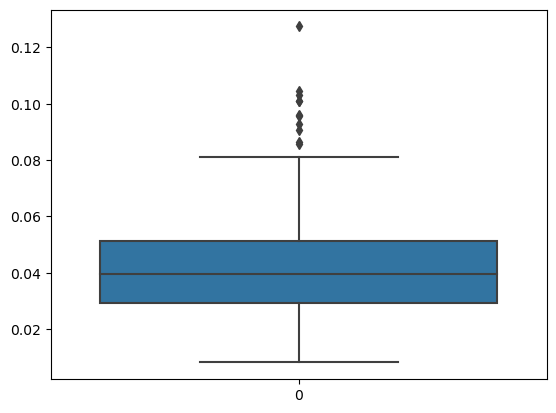

In [100]:
property_crime.describe() * 100


sns.boxplot(property_crime)
plt.show()

In [101]:
property_crime.describe() * 100

count    94800.000000
mean         4.107727
std          1.681169
min          0.812613
25%          2.910991
50%          3.960360
75%          5.112895
max         12.743491
Name: PropertyCrime_pct_lag1, dtype: float64

In [102]:
violent_crime.describe() * 100

count    94800.000000
mean         5.476485
std          3.454552
min          0.430378
25%          2.774075
50%          4.711536
75%          7.467656
max         21.554439
Name: ViolentCrime_pct_lag1, dtype: float64

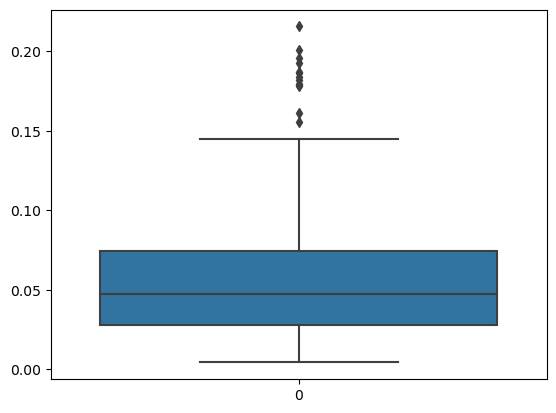

In [103]:



sns.boxplot(violent_crime)
plt.show()

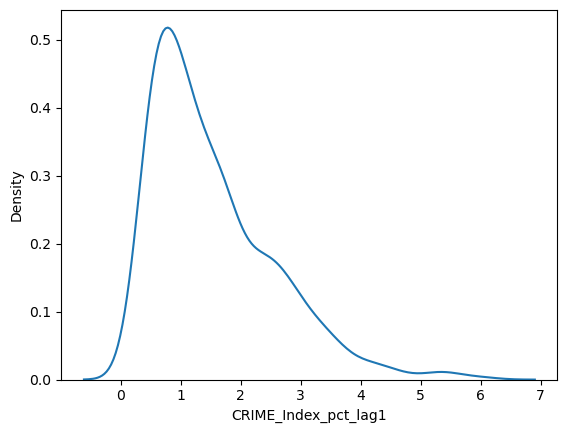

In [104]:
sns.kdeplot(CRIME_Index_pct_lag1)
plt.show()

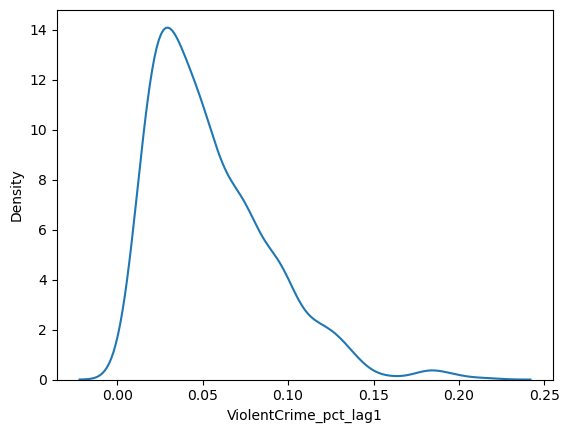

In [105]:
sns.kdeplot(violent_crime)
plt.show()

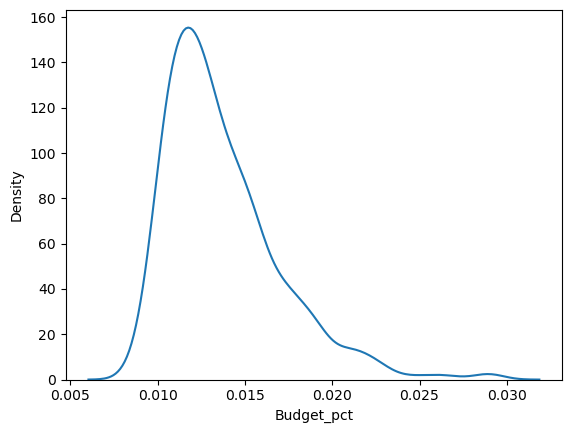

In [106]:
sns.kdeplot(Budget_pct)
plt.show()

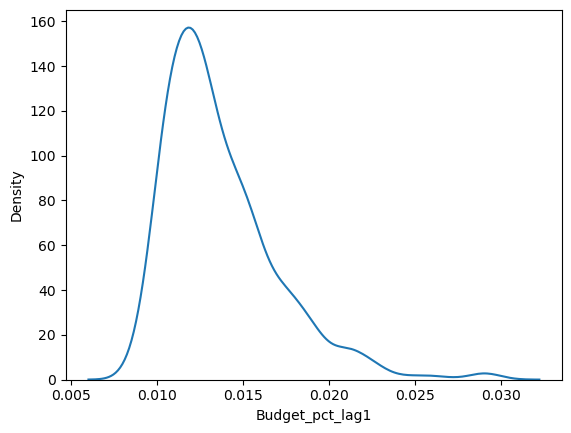

In [107]:
sns.kdeplot(Budget_pct_lag1)
plt.show()

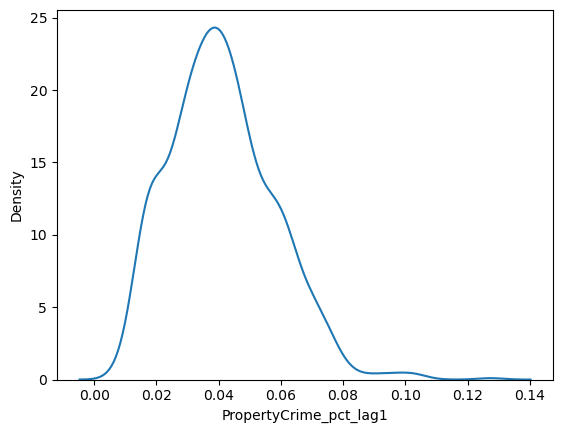

In [108]:
sns.kdeplot(property_crime)
plt.show()

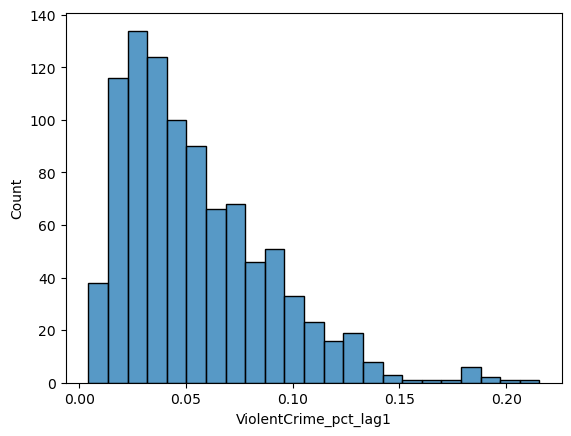

In [109]:
sns.histplot(violent_crime)
plt.show()

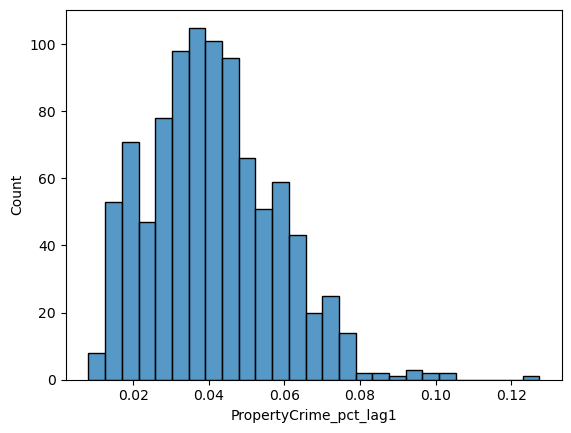

In [110]:
sns.histplot(property_crime)
plt.show()

In [111]:
violent_crime_log = np.log(violent_crime)

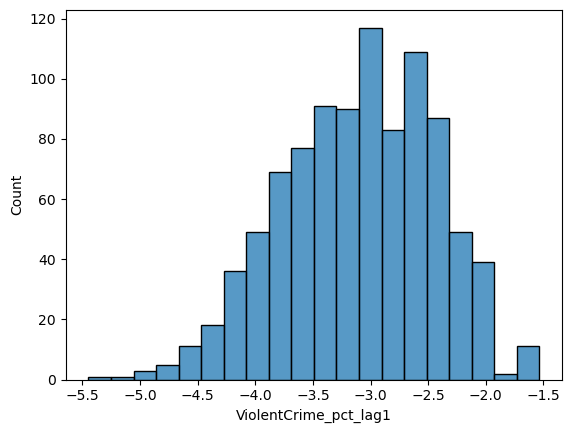

In [112]:
sns.histplot(violent_crime_log)
plt.show()

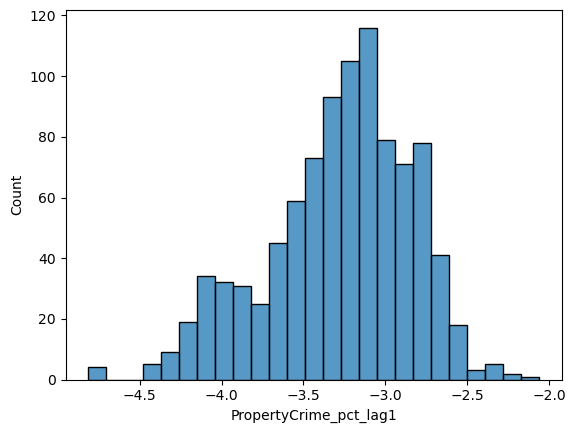

In [113]:
property_crime_log = np.log(property_crime)
sns.histplot(property_crime_log)
plt.show()

In [114]:
from sklearn.preprocessing import StandardScaler

violent_scaler = StandardScaler()

violent_crime_scaled = violent_scaler.fit_transform(pre_ts_analysis_no_2022_clean[['ViolentCrime_pct_lag1']])

property_scaler = StandardScaler()

property_crime_scaled = property_scaler.fit_transform(pre_ts_analysis_no_2022_clean[['PropertyCrime_pct_lag1']])



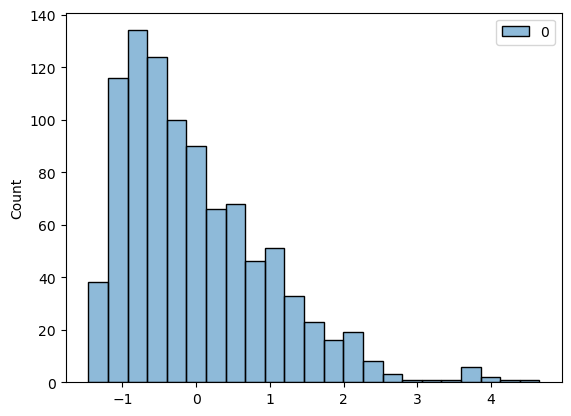

In [115]:
sns.histplot(violent_crime_scaled)
plt.show()

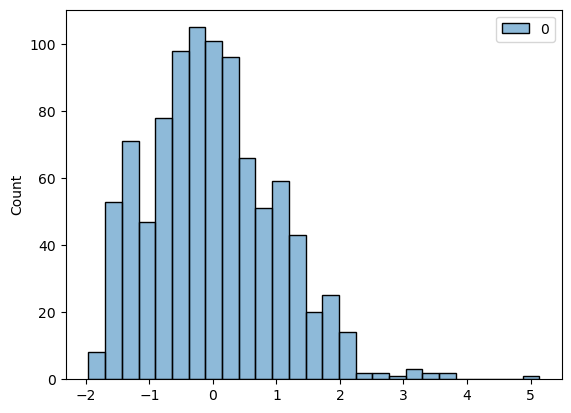

In [116]:
sns.histplot(property_crime_scaled)
plt.show()

In [117]:
from scipy.stats import boxcox

violent_crime_boxcox, lambda_best_fit = boxcox(violent_crime)

In [118]:
lambda_best_fit

0.17474138577912954

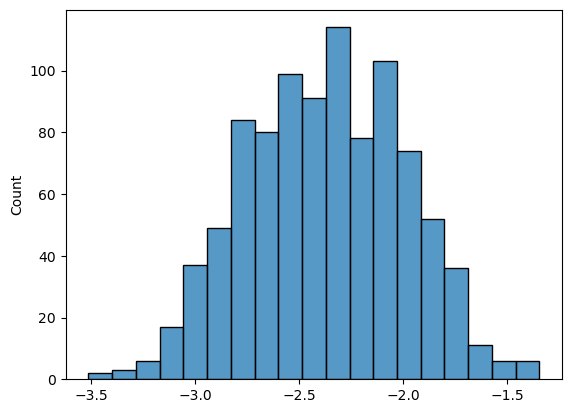

In [119]:
sns.histplot(violent_crime_boxcox)
plt.show()

In [120]:
property_crime_boxcox, lambda_best_fit = boxcox(property_crime)
lambda_best_fit

0.4476968789517491

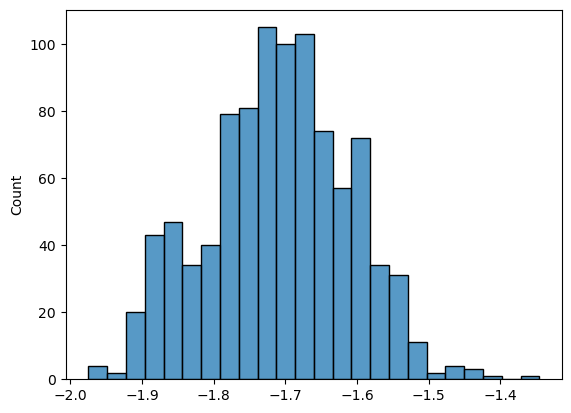

In [121]:
sns.histplot(property_crime_boxcox)
plt.show()

In [122]:
# violent_crime_pct_lag1, property_crime_pct_lag1, crime_index

crime_index_pct_lag1 = pre_ts_analysis_no_2022_clean['CRIME_Index_pct_lag1']
violent_crime_pct_lag1 = pre_ts_analysis_no_2022_clean['ViolentCrime_pct_lag1']
property_crime_pct_lag1 = pre_ts_analysis_no_2022_clean['PropertyCrime_pct_lag1']

#df = pre_ts_analysis_no_2022_clean

# Capture best lambda values from Boxcox transformations across all columns 

lambdas = {}

crime_index_transform, lambdas["crime_index"] = boxcox(crime_index_pct_lag1)
violent_crime_transform, lambdas["violent_crime"] = boxcox(violent_crime_pct_lag1)
property_crime_transform, lambdas["property_crime"] = boxcox(property_crime_pct_lag1)
Budget_pct_transform, lambdas["Budget_pct"] = boxcox(Budget_pct)
Budget_pct_lag1_transform, lambdas["Budget_pct_lag1"] = boxcox(Budget_pct_lag1)

crime_index_transform_log = np.log(crime_index_pct_lag1)
violent_crime_transform_log = np.log(violent_crime_pct_lag1)
property_crime_transform_log = np.log(property_crime_pct_lag1)
Budget_pct_transform_log = np.log(Budget_pct)
Budget_pct_lag1_transform_log = np.log(Budget_pct_lag1)

#for col in df.columns:
#    df[col], lambdas[col] = boxcox(df[col])

#    print(lambdas)

In [123]:
lambdas

{'crime_index': 0.08216662296598502,
 'violent_crime': 0.17474138577912954,
 'property_crime': 0.4476968789517491,
 'Budget_pct': -1.2967345344392136,
 'Budget_pct_lag1': -1.2912092934339563}

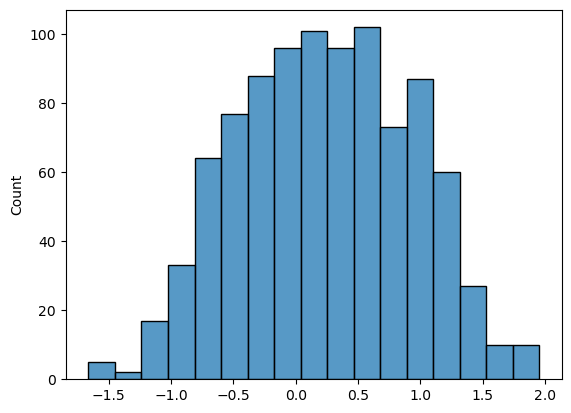

In [124]:
sns.histplot(crime_index_transform)
plt.show()

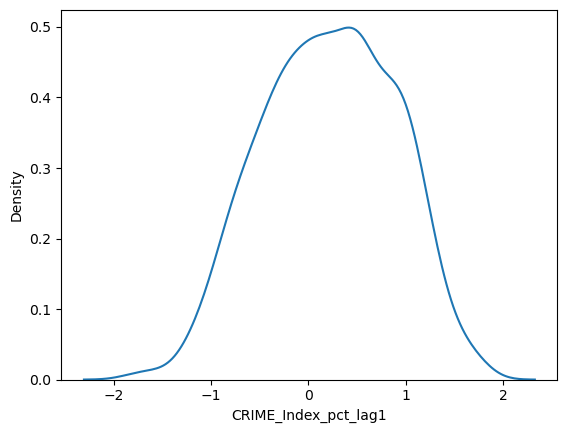

In [125]:
sns.kdeplot(crime_index_transform_log)
plt.show()

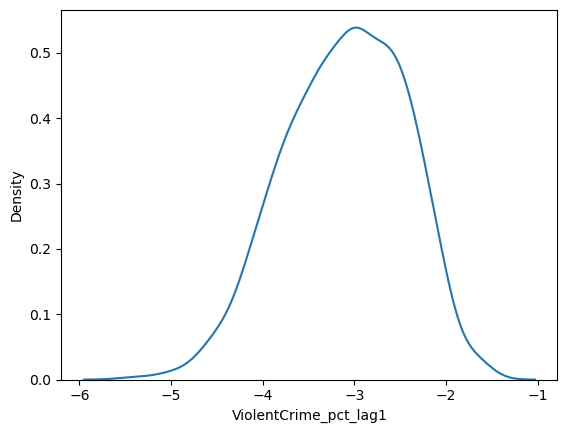

In [126]:
sns.kdeplot(violent_crime_transform_log)
plt.show()

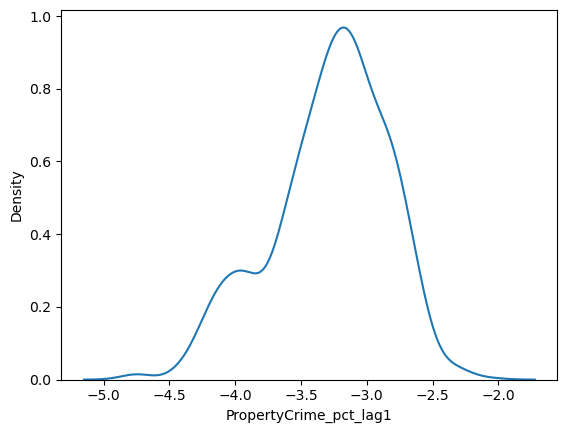

In [127]:
sns.kdeplot(property_crime_transform_log)
plt.show()

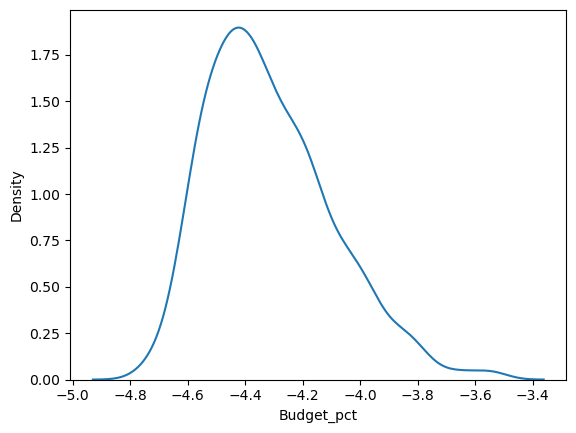

In [128]:
sns.kdeplot(Budget_pct_transform_log)
plt.show()

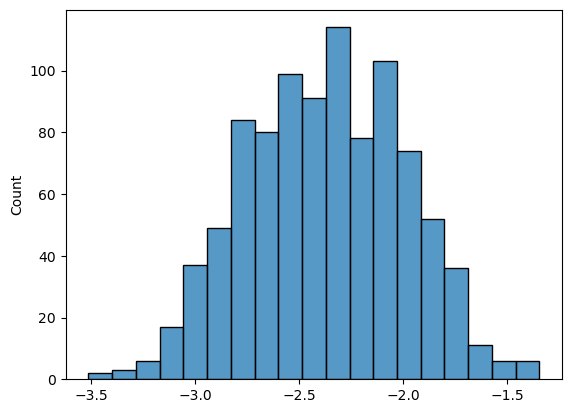

In [129]:
sns.histplot(violent_crime_transform)
plt.show()

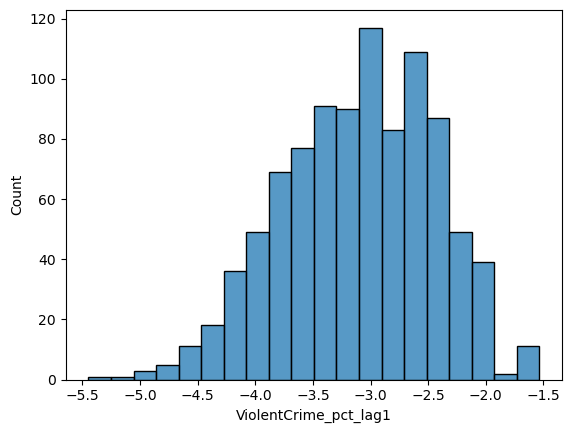

In [130]:
sns.histplot(violent_crime_transform_log)
plt.show()

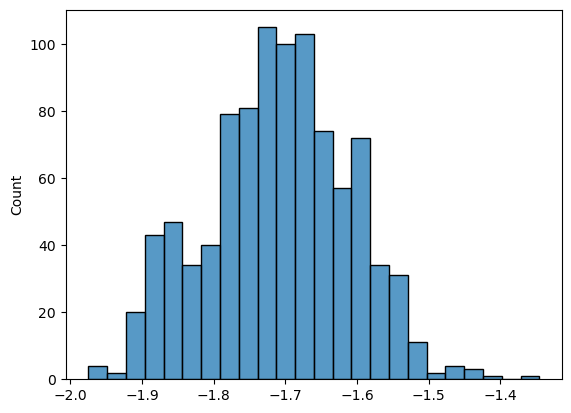

In [131]:
sns.histplot(property_crime_transform)
plt.show()

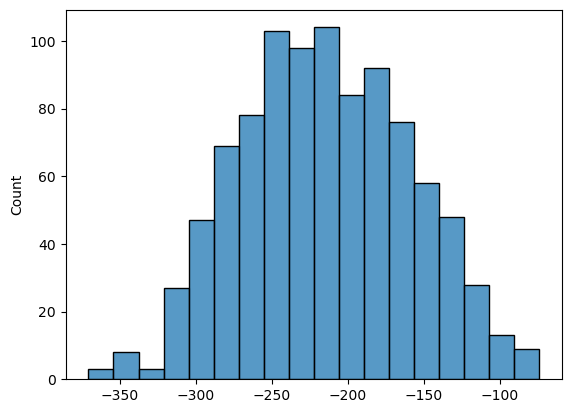

In [132]:
sns.histplot(Budget_pct_transform)
plt.show()

In [133]:
pre_ts_analysis_no_2022_clean

Year  Precinct  Full Time Positions    Budget          Borough  \
0    2008         1                  223  14165270  MANHATTAN SOUTH   
1    2008         5                  195   9738430  MANHATTAN SOUTH   
2    2008         6                  220  11254960  MANHATTAN SOUTH   
3    2008         7                  178   9164428  MANHATTAN SOUTH   
4    2008         9                  212  10708169  MANHATTAN SOUTH   
..    ...       ...                  ...       ...              ...   
943  2020       114                  252  20251282     QUEENS NORTH   
944  2020       115                  289  17972579     QUEENS NORTH   
945  2020       120                  399  26776288    STATEN ISLAND   
946  2020       122                  249  18356669    STATEN ISLAND   
947  2020       123                  148  13281550    STATEN ISLAND   

     Citizen_2010 Poverty Rate_2010 Immigration Rates 2010  Budget per Capita  \
0           44138             6.12%                 33.16%             214.52   
1           37193            24.59%                 29.40%             184.85   
2           50266             6.20%                 19.22%             180.87   
3           43853            29.72%                 22.03%             162.95   
4           58772            21.06%                 23.12%             140.08   
..            ...               ...                    ...                ...   
943        129728            16.62%                 36.02%              99.88   
944         80034            19.76%                 53.35%             104.75   
945         73854            19.79%                 34.39%             237.87   
946        103552             9.18%                 25.49%             132.08   
947         75250             7.23%                 23.13%             135.67   

     BURGLARY  ...  ViolentCrime_pct  ViolentCrime_pct_lag1  \
0         189  ...          0.021394               0.016536   
1         150  ...          0.020833               0.021675   
2         282  ...          0.018233               0.032534   
3         104  ...          0.028337               0.026918   
4         225  ...          0.032511               0.031477   
..        ...  ...               ...                    ...   
943       273  ...          0.065400               0.058964   
944       167  ...          0.079397               0.096142   
945       105  ...          0.064877               0.044576   
946        92  ...          0.016954               0.032179   
947        41  ...          0.007098               0.015960   

     PropertyCrime_pct  PropertyCrime_pct_lag1  \
0             0.046062                0.050877   
1             0.023695                0.023574   
2             0.046108                0.045836   
3             0.019982                0.018151   
4             0.038388                0.037396   
..                 ...                     ...   
943           0.068714                0.064570   
944           0.051324                0.049493   
945           0.023723                0.027226   
946           0.021933                0.020304   
947           0.013525                0.012152   

     CRIME_Index_per_capita_lag1_pct  ViolentCrime_per_capita_lag1_pct  \
0                           0.020461                          0.008311   
1                           0.015682                          0.013241   
2                           0.022192                          0.013562   
3                           0.013249                          0.015353   
4                           0.015925                          0.012795   
..                               ...                               ...   
943                         0.009168                          0.008350   
944                         0.009917                          0.010865   
945                         0.009458                          0.010354   
946                         0.003934                          0.002858   
947    

In [134]:
# Test OLS on Budget_pct i,t = Violent crime_lag1_i,t + Property_crime_lag1 i, t + Budget_pct i, t-1 

# Assuming pre_ts_analysis_no_2022_clean is the DataFrame with your data
df = pre_ts_analysis_no_2022_clean

# Add a constant column to the DataFrame to account for the intercept term in the regression
df['const'] = 1

#decrease one degree of freedom:
random_precinct = df['Precinct'].sample(n=1).iloc[0]
df = df[df['Precinct'] != random_precinct]



# Use the transformed variables and Budget_pct lagged by one period as independent variables
X = df[['const', 'CRIME_Index_pct_lag1']]
y = df['Budget_pct']

# Fit the OLS regression model
model_3 = sm.OLS(y, X).fit()

# Use the transformed variables and Budget_pct lagged by one period as independent variables
X = df[['const', 'CRIME_Index_pct_lag1', 'Budget_pct_lag1']]
y = df['Budget_pct']

# Fit the OLS regression model
model_4 = sm.OLS(y, X).fit()


# Use the transformed variables and Budget_pct lagged by one period as independent variables
X = df[['const', 'ViolentCrime_pct_lag1', 'PropertyCrime_pct_lag1']]
y = df['Budget_pct']

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Use the transformed variables and Budget_pct lagged by one period as independent variables
X = df[['const', 'ViolentCrime_pct_lag1', 'PropertyCrime_pct_lag1', 'Budget_pct_lag1' ]]
y = df['Budget_pct']

# Fit the OLS regression model
model_2_before_log = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())
print(model_2_before_log.summary())
print(model_3.summary())
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Budget_pct   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     657.9
Date:                Sun, 21 Jan 2024   Prob (F-statistic):          6.64e-179
Time:                        14:19:58   Log-Likelihood:                 4430.9
No. Observations:                 935   AIC:                            -8856.
Df Residuals:                     932   BIC:                            -8841.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [135]:
# Log transformation
df['crime_index_transform_log'] = crime_index_transform_log
df['violent_crime_transform_log'] = violent_crime_transform_log
df['property_crime_transform_log'] = property_crime_transform_log
df['Budget_pct_transform_log'] = Budget_pct_transform_log
df['Budget_pct_lag1_transform_log'] = Budget_pct_lag1_transform_log


# Use the Log transformed variables and Budget_pct lagged by one period as independent variables
X = df[['const', 'crime_index_transform_log']]
y = df['Budget_pct_transform_log']

# Fit the OLS regression model
model_3 = sm.OLS(y, X).fit()


# Use the transformed variables and Budget_pct lagged by one period as independent variables
X = df[['const', 'crime_index_transform_log', 'Budget_pct_lag1_transform_log']]
y = df['Budget_pct_transform_log']

# Fit the OLS regression model
model_4 = sm.OLS(y, X).fit()


# Use the transformed variables and Budget_pct lagged by one period as independent variables
X = df[['const', 'violent_crime_transform_log', 'property_crime_transform_log']]
y = df['Budget_pct_transform_log']

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Use the transformed variables and Budget_pct lagged by one period as independent variables
X = df[['const', 'violent_crime_transform_log', 'property_crime_transform_log', 'Budget_pct_lag1_transform_log' ]]
y = df['Budget_pct_transform_log']

# Fit the OLS regression model
model_2 = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())
print(model_2.summary())
# print(model_3.summary())
# print(model_4.summary())
# crime_index_transform_log = np.log(crime_index_pct_lag1)
# violent_crime_transform_log = np.log(violent_crime_pct_lag1)
# property_crime_transform_log = np.log(property_crime_pct_lag1)
# Budget_pct_transform_log = np.log(Budget_pct)
# Budget_pct_lag1_transform_log = np.log(Budget_pct_lag1)

                               OLS Regression Results                               
Dep. Variable:     Budget_pct_transform_log   R-squared:                       0.528
Model:                                  OLS   Adj. R-squared:                  0.527
Method:                       Least Squares   F-statistic:                     520.8
Date:                      Sun, 21 Jan 2024   Prob (F-statistic):          1.43e-152
Time:                              14:19:58   Log-Likelihood:                 445.74
No. Observations:                       935   AIC:                            -885.5
Df Residuals:                           932   BIC:                            -871.0
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\4002167396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crime_index_transform_log'] = crime_index_transform_log
C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\4002167396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['violent_crime_transform_log'] = violent_crime_transform_log
C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\4002167396.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [136]:
df

Year  Precinct  Full Time Positions    Budget          Borough  \
0    2008         1                  223  14165270  MANHATTAN SOUTH   
1    2008         5                  195   9738430  MANHATTAN SOUTH   
2    2008         6                  220  11254960  MANHATTAN SOUTH   
3    2008         7                  178   9164428  MANHATTAN SOUTH   
4    2008         9                  212  10708169  MANHATTAN SOUTH   
..    ...       ...                  ...       ...              ...   
943  2020       114                  252  20251282     QUEENS NORTH   
944  2020       115                  289  17972579     QUEENS NORTH   
945  2020       120                  399  26776288    STATEN ISLAND   
946  2020       122                  249  18356669    STATEN ISLAND   
947  2020       123                  148  13281550    STATEN ISLAND   

     Citizen_2010 Poverty Rate_2010 Immigration Rates 2010  Budget per Capita  \
0           44138             6.12%                 33.16%             214.52   
1           37193            24.59%                 29.40%             184.85   
2           50266             6.20%                 19.22%             180.87   
3           43853            29.72%                 22.03%             162.95   
4           58772            21.06%                 23.12%             140.08   
..            ...               ...                    ...                ...   
943        129728            16.62%                 36.02%              99.88   
944         80034            19.76%                 53.35%             104.75   
945         73854            19.79%                 34.39%             237.87   
946        103552             9.18%                 25.49%             132.08   
947         75250             7.23%                 23.13%             135.67   

     BURGLARY  ...  PropertyCrime_per_capita_lag1_pct   Annual  \
0         189  ...                           0.035416  215.572   
1         150  ...                           0.019580  215.572   
2         282  ...                           0.033177  215.572   
3         104  ...                           0.012359  215.572   
4         225  ...                           0.020250  215.572   
..        ...  ...                                ...      ...   
943       273  ...                           0.009950  267.693   
944       167  ...                           0.008160  267.693   
945       105  ...                           0.007015  267.693   
946        92  ...                           0.004874  267.693   
947        41  ...                           0.004200  267.693   

     Adjusted_Budget_per_capita  Adjusted_Budget_per_capita_lag1  const  \
0                    288.929817                       254.956852      1   
1                    236.489360                       229.225709      1   
2                    234.450033                       235.372584      1   
3                    210.367927                       210.981717      1   
4                    179.931881                       178.641292      1   
..                          ...                              ...    ...   
943                  100.585821                        97.711686      1   
944                  103.914164                       103.806363      1   
945                  226.745083                       223.724288      1   
946                  131.526161                       132.337557      1   
947                  136.551919                       137.399729      1   

     crime_index_transform_log  violent_crime_transform_log  \
0                    -0.692542                    -4.102213   
1                    -0.741902                    -3.831597   
2                    -0.102064                    -3.425469   
3                    -0.508460                    -3.614974   
4                    -0.336392                    -3.458510   
..                         ...                          ...   
943                   0.541201              

In [137]:
df

Year  Precinct  Full Time Positions    Budget          Borough  \
0    2008         1                  223  14165270  MANHATTAN SOUTH   
1    2008         5                  195   9738430  MANHATTAN SOUTH   
2    2008         6                  220  11254960  MANHATTAN SOUTH   
3    2008         7                  178   9164428  MANHATTAN SOUTH   
4    2008         9                  212  10708169  MANHATTAN SOUTH   
..    ...       ...                  ...       ...              ...   
943  2020       114                  252  20251282     QUEENS NORTH   
944  2020       115                  289  17972579     QUEENS NORTH   
945  2020       120                  399  26776288    STATEN ISLAND   
946  2020       122                  249  18356669    STATEN ISLAND   
947  2020       123                  148  13281550    STATEN ISLAND   

     Citizen_2010 Poverty Rate_2010 Immigration Rates 2010  Budget per Capita  \
0           44138             6.12%                 33.16%             214.52   
1           37193            24.59%                 29.40%             184.85   
2           50266             6.20%                 19.22%             180.87   
3           43853            29.72%                 22.03%             162.95   
4           58772            21.06%                 23.12%             140.08   
..            ...               ...                    ...                ...   
943        129728            16.62%                 36.02%              99.88   
944         80034            19.76%                 53.35%             104.75   
945         73854            19.79%                 34.39%             237.87   
946        103552             9.18%                 25.49%             132.08   
947         75250             7.23%                 23.13%             135.67   

     BURGLARY  ...  PropertyCrime_per_capita_lag1_pct   Annual  \
0         189  ...                           0.035416  215.572   
1         150  ...                           0.019580  215.572   
2         282  ...                           0.033177  215.572   
3         104  ...                           0.012359  215.572   
4         225  ...                           0.020250  215.572   
..        ...  ...                                ...      ...   
943       273  ...                           0.009950  267.693   
944       167  ...                           0.008160  267.693   
945       105  ...                           0.007015  267.693   
946        92  ...                           0.004874  267.693   
947        41  ...                           0.004200  267.693   

     Adjusted_Budget_per_capita  Adjusted_Budget_per_capita_lag1  const  \
0                    288.929817                       254.956852      1   
1                    236.489360                       229.225709      1   
2                    234.450033                       235.372584      1   
3                    210.367927                       210.981717      1   
4                    179.931881                       178.641292      1   
..                          ...                              ...    ...   
943                  100.585821                        97.711686      1   
944                  103.914164                       103.806363      1   
945                  226.745083                       223.724288      1   
946                  131.526161                       132.337557      1   
947                  136.551919                       137.399729      1   

     crime_index_transform_log  violent_crime_transform_log  \
0                    -0.692542                    -4.102213   
1                    -0.741902                    -3.831597   
2                    -0.102064                    -3.425469   
3                    -0.508460                    -3.614974   
4                    -0.336392                    -3.458510   
..                         ...                          ...   
943                   0.541201              

In [138]:
df
pd.set_option('display.max_columns', None)

# Now when you display the dataframe, all columns should be visible
#print(df)
 
#Full Time Positions, Budget_pct, Year,  Precinct , ViolentCrime_pct, PropertyCrime_pct, Borough  

columns_df = ['Full Time Positions', 'Budget_pct', 'Year', 'Precinct', 'ViolentCrime_pct', 'PropertyCrime_pct','Borough','CRIME_Index_per_capita','Adjusted_Budget_per_capita']
  # This should be replaced with your actual data

# Filter the DataFrame for the years 2015 to 2017 and select specific columns
filtered_df = df[(df['Year'] >= 2015) & (df['Year'] <= 2017)][['Full Time Positions', 'Budget_pct', 'Year', 'Precinct', 'ViolentCrime_pct', 'PropertyCrime_pct','Borough','CRIME_Index_per_capita']]
filtered_df_test = df[(df['Year'] >= 2015) & (df['Year'] <= 2017)][['Full Time Positions', 'Budget_pct', 'Year', 'Precinct','Borough','CRIME_Index_per_capita','Adjusted_Budget_per_capita']]

# Display the first few rows of the filtered DataFrame
filtered_df_test.head()
filtered_df_test.to_csv('Precinct_Research/Budget_Officer_2015_2017.csv')

In [139]:
filtered_df_test

Full Time Positions  Budget_pct  Year  Precinct          Borough  \
511                  218    0.015067  2015         1  MANHATTAN SOUTH   
512                  190    0.010997  2015         5  MANHATTAN SOUTH   
513                  218    0.013273  2015         6  MANHATTAN SOUTH   
514                  174    0.011739  2015         7  MANHATTAN SOUTH   
515                  208    0.011455  2015         9  MANHATTAN SOUTH   
..                   ...         ...   ...       ...              ...   
725                  252    0.013564  2017       114     QUEENS NORTH   
726                  289    0.012115  2017       115     QUEENS NORTH   
727                  399    0.024472  2017       120    STATEN ISLAND   
728                  249    0.016433  2017       122    STATEN ISLAND   
729                  148    0.010877  2017       123    STATEN ISLAND   

     CRIME_Index_per_capita  Adjusted_Budget_per_capita  
511                0.109693                  253.705066  
512                0.117361                  271.879671  
513                0.137699                  266.853299  
514                0.093982                  261.861582  
515                0.110169                  191.732902  
..                      ...                         ...  
725                0.056155                   84.478501  
726                0.073334                   88.225469  
727                0.074590                  263.721577  
728                0.027505                  148.130699  
729                0.017480                  140.192585  

[216 rows x 7 columns]

In [140]:
# Group by 'Year' and sum 'ViolentCrime_pct'
violent_crime_sum_by_year = filtered_df.groupby('Year')['PropertyCrime_pct'].sum()

# Display the sum of 'ViolentCrime_pct' for each year
violent_crime_sum_by_year

Year
2015    2.972229
2016    2.970573
2017    2.969982
Name: PropertyCrime_pct, dtype: float64

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\2012279260.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals_1, shade=True)


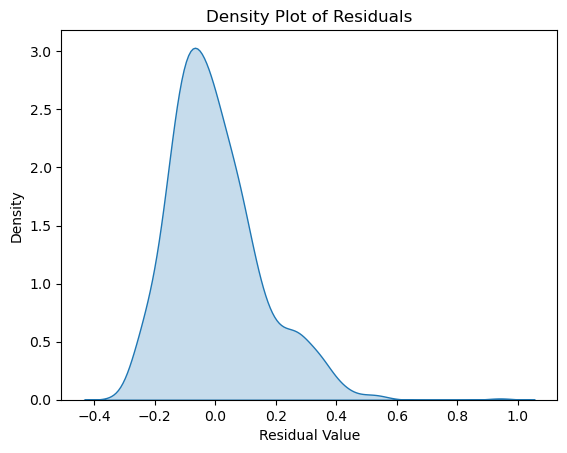

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\2012279260.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals_2, shade=True)


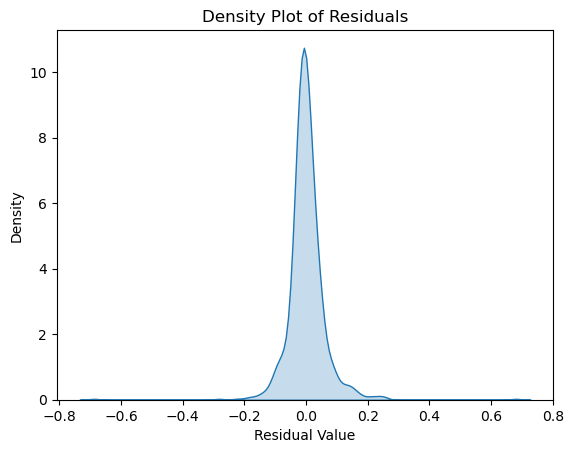

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\2012279260.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals_5, shade=True)


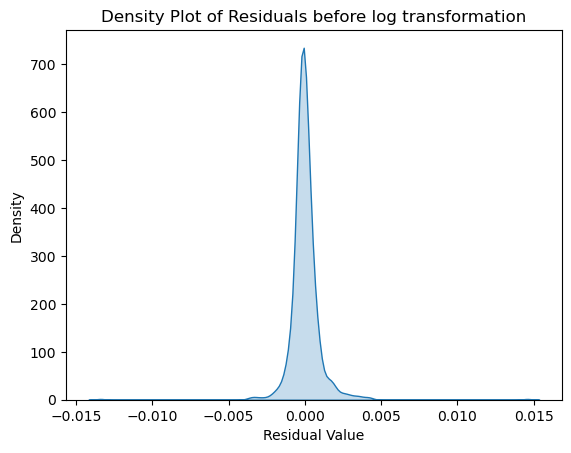

In [141]:
## plot residue

residuals_1 = model.resid
residuals_2 = model_2.resid
residuals_3 = model_3.resid
residuals_4 = model_4.resid
residuals_5 = model_2_before_log.resid

import matplotlib.pyplot as plt


# Density plot of residuals
sns.kdeplot(residuals_1, shade=True)
plt.title('Density Plot of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Density')
plt.show()

sns.kdeplot(residuals_2, shade=True)
plt.title('Density Plot of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Density')
plt.show()

sns.kdeplot(residuals_5, shade=True)
plt.title('Density Plot of Residuals before log transformation')
plt.xlabel('Residual Value')
plt.ylabel('Density')
plt.show()

# sns.kdeplot(residuals_3, shade=True)
# plt.title('Density Plot of Residuals')
# plt.xlabel('Residual Value')
# plt.ylabel('Density')
# plt.show()

# sns.kdeplot(residuals_4, shade=True)
# plt.title('Density Plot of Residuals')
# plt.xlabel('Residual Value')
# plt.ylabel('Density')
# plt.show()

In [142]:
df_filtered_13_20 = df[(df['Year'] >= 2013) & (df['Year'] <= 2020)]

In [143]:
crime_index_transform_log

0     -0.692542
1     -0.741902
2     -0.102064
3     -0.508460
4     -0.336392
         ...   
943    0.541201
944    0.967808
945    0.276362
946    0.087346
947   -0.642383
Name: CRIME_Index_pct_lag1, Length: 948, dtype: float64

In [144]:
# Log transformation

# Use the Log transformed variables and Budget_pct lagged by one period as independent variables
X = df_filtered_13_20[['const', 'crime_index_transform_log']]
y = df_filtered_13_20['Budget_pct_transform_log']

# Fit the OLS regression model
model_3 = sm.OLS(y, X).fit()


# Use the transformed variables and Budget_pct lagged by one period as independent variables
X = df_filtered_13_20[['const', 'crime_index_transform_log', 'Budget_pct_lag1_transform_log']]
y = df_filtered_13_20['Budget_pct_transform_log']

# Fit the OLS regression model
model_4 = sm.OLS(y, X).fit()


# Use the transformed variables and Budget_pct lagged by one period as independent variables
X = df_filtered_13_20[['const', 'violent_crime_transform_log', 'property_crime_transform_log']]
y = df_filtered_13_20['Budget_pct_transform_log']

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Use the transformed variables and Budget_pct lagged by one period as independent variables
X = df_filtered_13_20[['const', 'violent_crime_transform_log', 'property_crime_transform_log', 'Budget_pct_lag1_transform_log' ]]
y = df_filtered_13_20['Budget_pct_transform_log']

# Fit the OLS regression model
model_2 = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())
print(model_2.summary())
print(model_3.summary())
print(model_4.summary())



                               OLS Regression Results                               
Dep. Variable:     Budget_pct_transform_log   R-squared:                       0.511
Model:                                  OLS   Adj. R-squared:                  0.509
Method:                       Least Squares   F-statistic:                     299.1
Date:                      Sun, 21 Jan 2024   Prob (F-statistic):           1.24e-89
Time:                              14:19:59   Log-Likelihood:                 295.37
No. Observations:                       575   AIC:                            -584.7
Df Residuals:                           572   BIC:                            -571.7
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

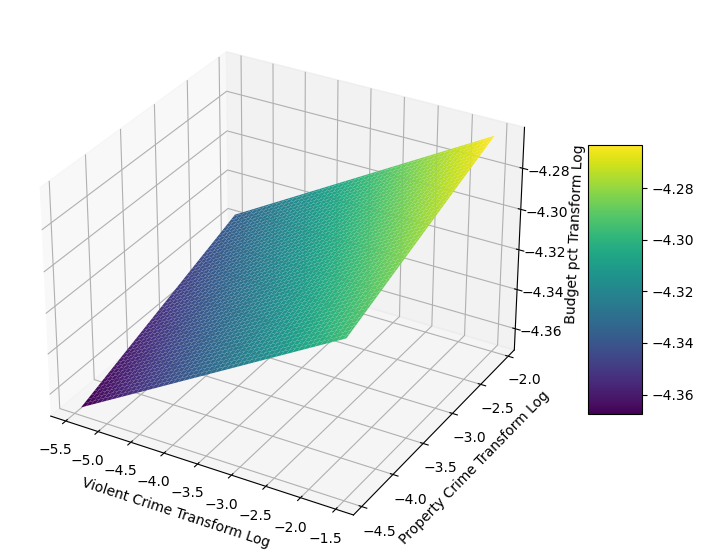

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm

# Assuming `X` is your predictor DataFrame and `y` is your response Series or DataFrame column
# You need to replace 'X' with the actual variable that references your DataFrame

# Generate grid for plotting
x = np.linspace(min(X.iloc[:, 1]), max(X.iloc[:, 1]), 100)
y = np.linspace(min(X.iloc[:, 2]), max(X.iloc[:, 2]), 100)
x, y = np.meshgrid(x, y)

# Assuming you have the model's coefficients (from your output)
# Replace these with your actual model coefficients
const = -0.2347
violent_crime_coef = 0.0188
property_crime_coef = 0.0136
budget_pct_lag1_coef = 0.9214

# Let's say we hold `Budget_pct_lag1_transform_log` constant at its mean
budget_pct_lag1_mean = np.mean(X.iloc[:, 3])  # Adjust the column index accordingly

# Calculate the predicted z values
z = const + violent_crime_coef * x + property_crime_coef * y + budget_pct_lag1_coef * budget_pct_lag1_mean

# Create the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

# Add labels and title
ax.set_xlabel('Violent Crime Transform Log')
ax.set_ylabel('Property Crime Transform Log')
ax.set_zlabel('Budget pct Transform Log')

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

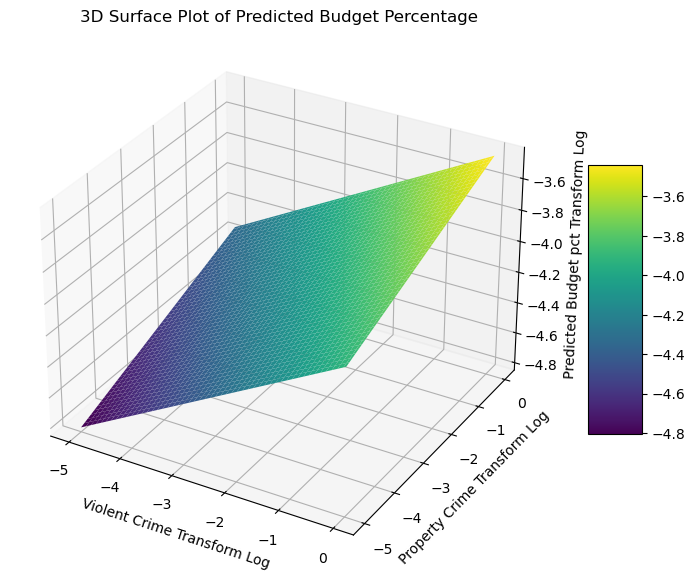

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Regression coefficients from the OLS regression output
const = -3.4331
violent_crime_coef = 0.1821
property_crime_coef = 0.0953

# Create the grid for plotting
x = np.linspace(-5, 0, 100)  # Adjust this range based on your actual data for violent_crime_transform_log
y = np.linspace(-5, 0, 100)  # Adjust this range based on your actual data for property_crime_transform_log
x, y = np.meshgrid(x, y)

# Calculate the predicted z values using the regression equation
z = const + violent_crime_coef * x + property_crime_coef * y

# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

# Add labels and title
ax.set_xlabel('Violent Crime Transform Log')
ax.set_ylabel('Property Crime Transform Log')
ax.set_zlabel('Predicted Budget pct Transform Log')

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

# Add a title for the figure
plt.title('3D Surface Plot of Predicted Budget Percentage')

plt.show()

In [147]:
property_crime_transform_log

0     -2.978346
1     -3.747607
2     -3.082683
3     -4.009044
4     -3.286189
         ...   
943   -2.740009
944   -3.005930
945   -3.603594
946   -3.896937
947   -4.410262
Name: PropertyCrime_pct_lag1, Length: 948, dtype: float64

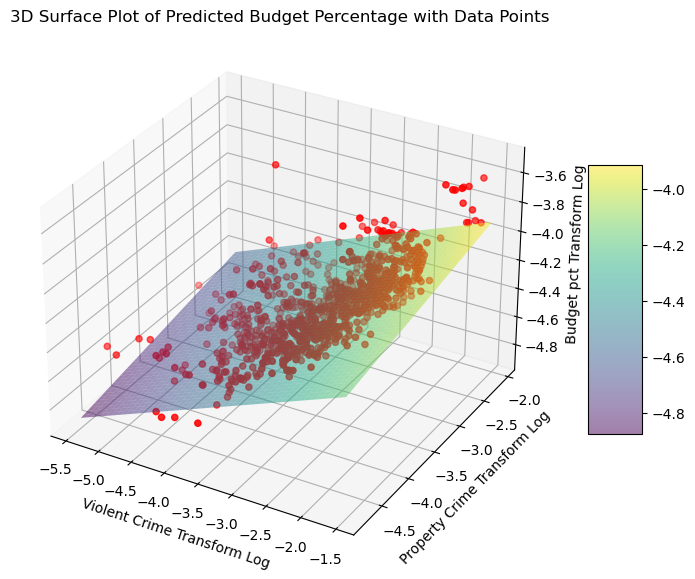

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# Regression coefficients from the OLS regression output
const = -3.4331
violent_crime_coef = 0.1821
property_crime_coef = 0.0953

# Create the grid for plotting
x = np.linspace(df['violent_crime_transform_log'].min(), df['violent_crime_transform_log'].max(), 100)
y = np.linspace(df['property_crime_transform_log'].min(), df['property_crime_transform_log'].max(), 100)
x, y = np.meshgrid(x, y)

# Calculate the predicted z values using the regression equation
z = const + violent_crime_coef * x + property_crime_coef * y

# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none', alpha=0.5)

# Plot the actual data points
ax.scatter(df['violent_crime_transform_log'], df['property_crime_transform_log'], df['Budget_pct_transform_log'], c='red', marker='o')

# Add labels and title
ax.set_xlabel('Violent Crime Transform Log')
ax.set_ylabel('Property Crime Transform Log')
ax.set_zlabel('Budget pct Transform Log')

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

# Add a title for the figure
plt.title('3D Surface Plot of Predicted Budget Percentage with Data Points')

plt.show()


# df['crime_index_transform_log'] = crime_index_transform_log
# df['violent_crime_transform_log'] = violent_crime_transform_log
# df['property_crime_transform_log'] = property_crime_transform_log
# df['Budget_pct_transform_log'] = Budget_pct_transform_log
# df['Budget_pct_lag1_transform_log'] = Budget_pct_lag1_transform_log

In [149]:
import plotly.graph_objs as go

# Create the figure
fig = go.Figure(data=[
    go.Scatter3d(
        x=df['violent_crime_transform_log'],
        y=df['property_crime_transform_log'],
        z=df['Budget_pct_transform_log'],
        mode='markers',
        marker=dict(
            size=5,
            color=df['Budget_pct_transform_log'],  # set color to an array/list of desired values
            colorscale='Viridis',  # choose a colorscale
            opacity=0.8
        )
    )
])

# Set titles and labels
fig.update_layout(
    scene=dict(
        xaxis_title='Violent Crime Transform Log',
        yaxis_title='Property Crime Transform Log',
        zaxis_title='Budget pct Transform Log'
    ),
    title='Interactive 3D Scatter Plot of Data'
)

# Show the figure
fig.show()

In [150]:
import plotly.graph_objs as go
import numpy as np

# Assuming df and regression coefficients are defined as in your context

# Create the grid for the predicted plane
x_range = np.linspace(df['violent_crime_transform_log'].min(), df['violent_crime_transform_log'].max(), 100)
y_range = np.linspace(df['property_crime_transform_log'].min(), df['property_crime_transform_log'].max(), 100)
x_plane, y_plane = np.meshgrid(x_range, y_range)

# Calculate the z values for the predicted plane
z_plane = const + violent_crime_coef * x_plane + property_crime_coef * y_plane

# Create the figure
fig = go.Figure()

# Add the predicted plane as a surface plot
fig.add_trace(go.Surface(x=x_range, y=y_range, z=z_plane, colorscale='Viridis', opacity=0.5))

# Add the scatter plot for actual data points
fig.add_trace(
    go.Scatter3d(
        x=df['violent_crime_transform_log'],
        y=df['property_crime_transform_log'],
        z=df['Budget_pct_transform_log'],
        mode='markers',
        marker=dict(
            size=5,
            color=df['Budget_pct_transform_log'],
            colorscale='Viridis',
            opacity=0.8
        )
    )
)

# Set titles and labels
fig.update_layout(
    scene=dict(
        xaxis_title='Violent Crime Transform Log',
        yaxis_title='Property Crime Transform Log',
        zaxis_title='Budget pct Transform Log'
    ),
    title='Interactive 3D Scatter Plot with Predicted Plane'
)

# Show the figure
fig.show()

In [151]:
import plotly.graph_objs as go
import numpy as np

# Your regression coefficients
const = -3.4331
violent_crime_coef = 0.1821
property_crime_coef = 0.0953

# Generate a meshgrid for the surface plot
x_range = np.linspace(df['violent_crime_transform_log'].min(), df['violent_crime_transform_log'].max(), 100)
y_range = np.linspace(df['property_crime_transform_log'].min(), df['property_crime_transform_log'].max(), 100)
x_surface, y_surface = np.meshgrid(x_range, y_range)
z_surface = const + violent_crime_coef * x_surface + property_crime_coef * y_surface

# Create the 3D Scatter plot for the data points
scatter3d = go.Scatter3d(
    x=df['violent_crime_transform_log'],
    y=df['property_crime_transform_log'],
    z=df['Budget_pct_transform_log'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['Budget_pct_transform_log'],  # set color to an array/list of desired values
        colorscale='Viridis',  # choose a colorscale
        opacity=0.8
    )
)

# Create the surface plot for the regression result
surface = go.Surface(
    x=x_range,
    y=y_range,
    z=z_surface,
    colorscale='Viridis',
    opacity=0.5  # Set the opacity for visibility of data points
)

# Add both the scatter plot and surface plot to the figure
fig = go.Figure(data=[scatter3d, surface])

# Set titles and labels
fig.update_layout(
    scene=dict(
        xaxis_title='Violent Crime Transform Log',
        yaxis_title='Property Crime Transform Log',
        zaxis_title='Budget pct Transform Log'
    ),
    title='Interactive 3D Scatter Plot with Regression Surface'
)

# Show the figure
fig.show()

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\190968440.py:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




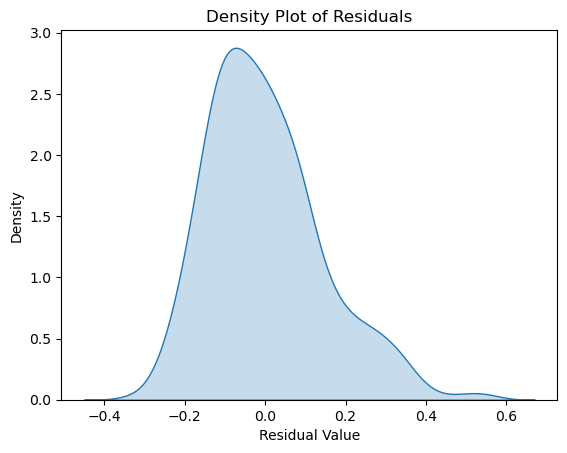

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\190968440.py:17: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




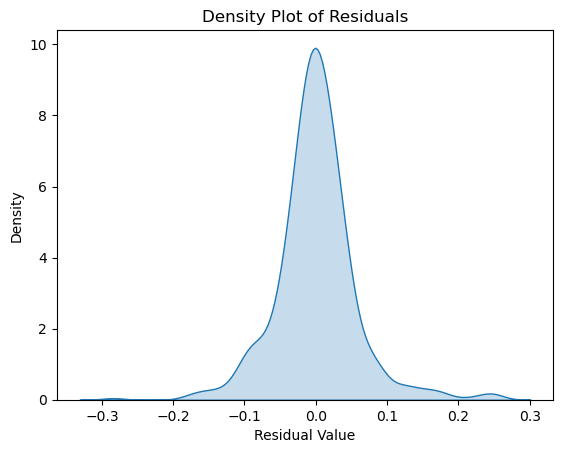

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\190968440.py:23: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




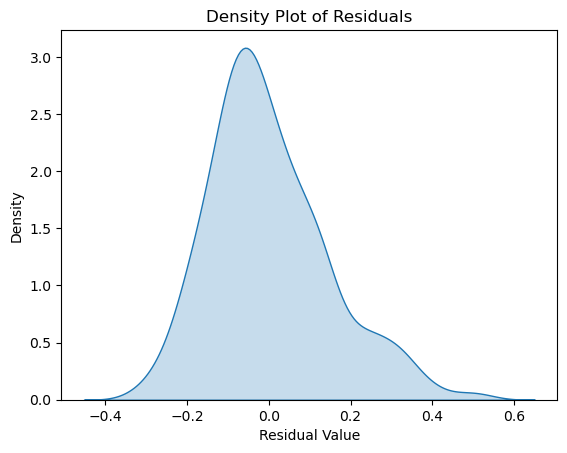

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\190968440.py:29: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




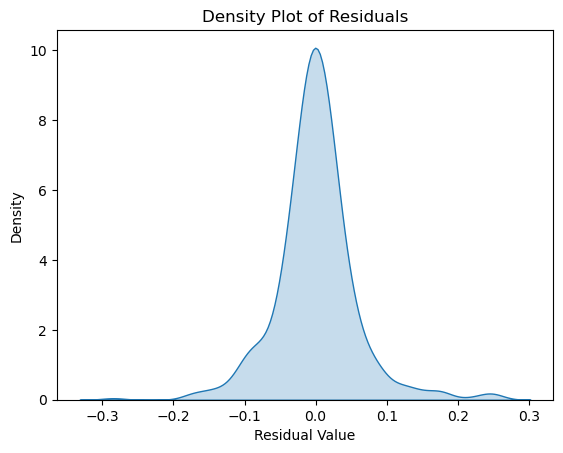

In [152]:
## plot residue

residuals_1 = model.resid
residuals_2 = model_2.resid
residuals_3 = model_3.resid
residuals_4 = model_4.resid
import matplotlib.pyplot as plt


# Density plot of residuals
sns.kdeplot(residuals_1, shade=True)
plt.title('Density Plot of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Density')
plt.show()

sns.kdeplot(residuals_2, shade=True)
plt.title('Density Plot of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Density')
plt.show()

sns.kdeplot(residuals_3, shade=True)
plt.title('Density Plot of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Density')
plt.show()

sns.kdeplot(residuals_4, shade=True)
plt.title('Density Plot of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Density')
plt.show()

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\4172789288.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




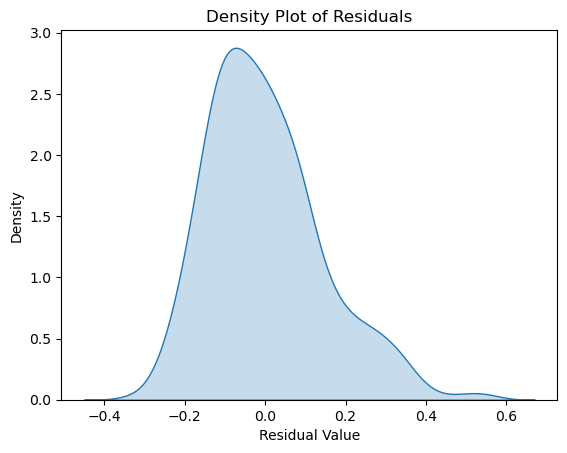

In [153]:
sns.kdeplot(residuals_1, shade=True)
plt.title('Density Plot of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Density')
plt.show()

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\2981034063.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




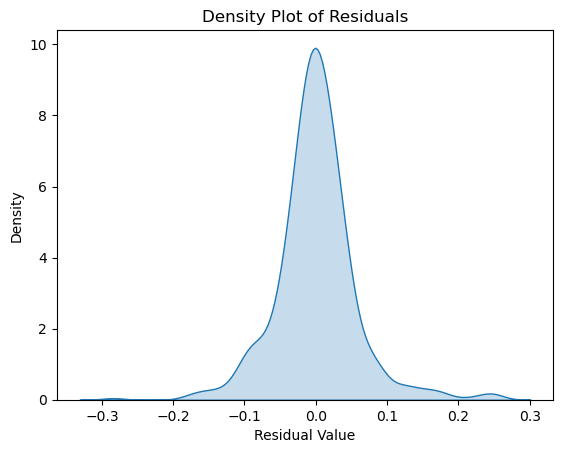

In [154]:
sns.kdeplot(residuals_2, shade=True)
plt.title('Density Plot of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Density')
plt.show()

In [155]:
df_filtered_13_20

Year  Precinct  Full Time Positions    Budget          Borough  \
365  2013         1                  218  20817512  MANHATTAN SOUTH   
366  2013         5                  190  11710462  MANHATTAN SOUTH   
367  2013         6                  218  13693888  MANHATTAN SOUTH   
368  2013         7                  174  12565039  MANHATTAN SOUTH   
369  2013         9                  208  12764786  MANHATTAN SOUTH   
..    ...       ...                  ...       ...              ...   
943  2020       114                  252  20251282     QUEENS NORTH   
944  2020       115                  289  17972579     QUEENS NORTH   
945  2020       120                  399  26776288    STATEN ISLAND   
946  2020       122                  249  18356669    STATEN ISLAND   
947  2020       123                  148  13281550    STATEN ISLAND   

     Citizen_2010 Poverty Rate_2010 Immigration Rates 2010  Budget per Capita  \
365         44138             6.12%                 33.16%             315.26   
366         37193            24.59%                 29.40%             222.28   
367         50266             6.20%                 19.22%             220.07   
368         43853            29.72%                 22.03%             223.42   
369         58772            21.06%                 23.12%             166.98   
..            ...               ...                    ...                ...   
943        129728            16.62%                 36.02%              99.88   
944         80034            19.76%                 53.35%             104.75   
945         73854            19.79%                 34.39%             237.87   
946        103552             9.18%                 25.49%             132.08   
947         75250             7.23%                 23.13%             135.67   

     BURGLARY  FELONY ASSAULT  GRAND LARCENY  GRAND LARCENY OF MOTOR VEHICLE  \
365       171              87           1051                              27   
366        92             167            599                              12   
367       132             135           1253                              33   
368        67             106            362                              24   
369       165             152            904                              46   
..        ...             ...            ...                             ...   
943       273             357            698                             245   
944       167             311            526                             204   
945       105             238            260                              73   
946        92             110            235                              72   
947        41              59            178                              45   

     MURDER & NON NEGL. MANSLAUGHTER  RAPE  ROBBERY  \
365                                0    12       68   
366                                3     5      102   
367                                2     8      140   
368                                1     6      145   
369                                2    18      137   
..                               ...   ...      ...   
943                                7    22      191   
944                               11    29      219   
945                               12    24      103   
946                                1     7       49   
947                                0     4       14   

     TOTAL SEVEN MAJOR FELONY OFFENSES  Shootings  burglary_by_year  \
365                               1416        1.0             16804   
366                                980        2.0             16804   
367                               1703        1.0             16804   
368                                711        3.0             16804   
369                               1424        5.0             16804   
..                                 ...        ...               ...   
943                               1793       24.0           

In [156]:
# Assuming df_filtered_13_20 is your DataFrame
X = df_filtered_13_20[['const', 'violent_crime_transform_log', 'property_crime_transform_log']]
y = df_filtered_13_20['Budget_pct_transform_log']
model = sm.OLS(y, X).fit()

standardized_residuals = model.get_influence().resid_studentized_internal
lower_bound = np.percentile(standardized_residuals, 1)
upper_bound = np.percentile(standardized_residuals, 99)

outlier_indices = np.where((standardized_residuals <= lower_bound) | (standardized_residuals >= upper_bound))
outlier_precincts = df_filtered_13_20.iloc[outlier_indices]['Precinct'].unique()
##print(outlier_precincts)

df_filtered_13_20_no_outlier_precinct = df_filtered_13_20[~df_filtered_13_20['Precinct'].isin(outlier_precincts)]

X_cleaned = df_filtered_13_20_no_outlier_precinct[['const', 'violent_crime_transform_log', 'property_crime_transform_log']]
y_cleaned = df_filtered_13_20_no_outlier_precinct['Budget_pct_transform_log']
model_cleaned = sm.OLS(y_cleaned, X_cleaned).fit()
print(model_cleaned.summary())

                               OLS Regression Results                               
Dep. Variable:     Budget_pct_transform_log   R-squared:                       0.573
Model:                                  OLS   Adj. R-squared:                  0.572
Method:                       Least Squares   F-statistic:                     352.2
Date:                      Sun, 21 Jan 2024   Prob (F-statistic):           1.15e-97
Time:                              14:20:02   Log-Likelihood:                 334.45
No. Observations:                       527   AIC:                            -662.9
Df Residuals:                           524   BIC:                            -650.1
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [157]:
# Categorizing 'violent_crime_transform_log' into 5 groups
df_filtered_13_20['violent_crime_group'] = pd.qcut(df_filtered_13_20['violent_crime_transform_log'], q=5, 
                                                  labels=['1', '2', '3', '4', '5'])
# Categorizing 'property_crime_transform_log' into 5 groups
df_filtered_13_20['property_crime_group'] = pd.qcut(df_filtered_13_20['property_crime_transform_log'], q=5, 
                                                    labels=['1', '2', '3', '4', '5'])

# Categorizing 'Budget_pct_transform_log' into 5 groups
df_filtered_13_20['budget_pct_group'] = pd.qcut(df_filtered_13_20['Budget_pct_transform_log'], q=5, 
                                               labels=['1', '2', '3', '4', '5'])

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\3326880363.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\3326880363.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\3326880363.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [158]:
df_filtered_13_20

Year  Precinct  Full Time Positions    Budget          Borough  \
365  2013         1                  218  20817512  MANHATTAN SOUTH   
366  2013         5                  190  11710462  MANHATTAN SOUTH   
367  2013         6                  218  13693888  MANHATTAN SOUTH   
368  2013         7                  174  12565039  MANHATTAN SOUTH   
369  2013         9                  208  12764786  MANHATTAN SOUTH   
..    ...       ...                  ...       ...              ...   
943  2020       114                  252  20251282     QUEENS NORTH   
944  2020       115                  289  17972579     QUEENS NORTH   
945  2020       120                  399  26776288    STATEN ISLAND   
946  2020       122                  249  18356669    STATEN ISLAND   
947  2020       123                  148  13281550    STATEN ISLAND   

     Citizen_2010 Poverty Rate_2010 Immigration Rates 2010  Budget per Capita  \
365         44138             6.12%                 33.16%             315.26   
366         37193            24.59%                 29.40%             222.28   
367         50266             6.20%                 19.22%             220.07   
368         43853            29.72%                 22.03%             223.42   
369         58772            21.06%                 23.12%             166.98   
..            ...               ...                    ...                ...   
943        129728            16.62%                 36.02%              99.88   
944         80034            19.76%                 53.35%             104.75   
945         73854            19.79%                 34.39%             237.87   
946        103552             9.18%                 25.49%             132.08   
947         75250             7.23%                 23.13%             135.67   

     BURGLARY  FELONY ASSAULT  GRAND LARCENY  GRAND LARCENY OF MOTOR VEHICLE  \
365       171              87           1051                              27   
366        92             167            599                              12   
367       132             135           1253                              33   
368        67             106            362                              24   
369       165             152            904                              46   
..        ...             ...            ...                             ...   
943       273             357            698                             245   
944       167             311            526                             204   
945       105             238            260                              73   
946        92             110            235                              72   
947        41              59            178                              45   

     MURDER & NON NEGL. MANSLAUGHTER  RAPE  ROBBERY  \
365                                0    12       68   
366                                3     5      102   
367                                2     8      140   
368                                1     6      145   
369                                2    18      137   
..                               ...   ...      ...   
943                                7    22      191   
944                               11    29      219   
945                               12    24      103   
946                                1     7       49   
947                                0     4       14   

     TOTAL SEVEN MAJOR FELONY OFFENSES  Shootings  burglary_by_year  \
365                               1416        1.0             16804   
366                                980        2.0             16804   
367                               1703        1.0             16804   
368                                711        3.0             16804   
369                               1424        5.0             16804   
..                                 ...        ...               ...   
943                               1793       24.0           

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\2036656506.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




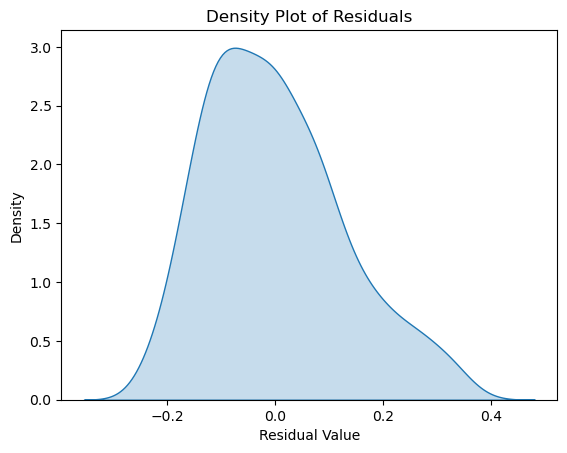

In [159]:
residuals_clean = model_cleaned.resid

sns.kdeplot(residuals_clean, shade=True)
plt.title('Density Plot of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Density')
plt.show()

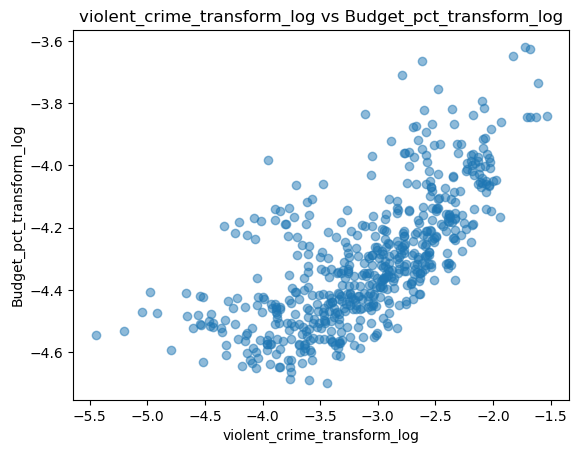

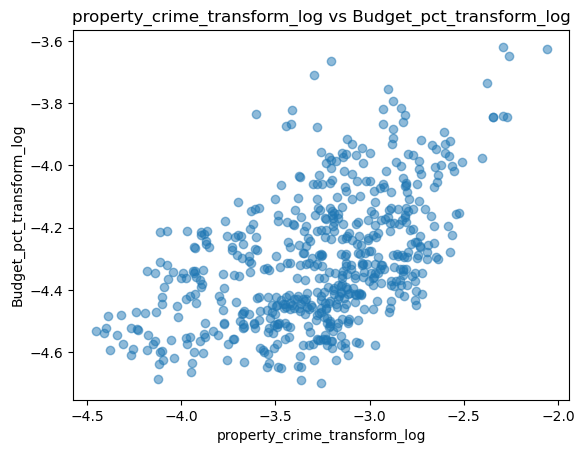

In [160]:
# Scatter plot for violent_crime_transform_log vs Budget_pct_transform_log
plt.scatter(df_filtered_13_20['violent_crime_transform_log'], df_filtered_13_20['Budget_pct_transform_log'], alpha=0.5)
plt.title('violent_crime_transform_log vs Budget_pct_transform_log')
plt.xlabel('violent_crime_transform_log')
plt.ylabel('Budget_pct_transform_log')
plt.show()

# Scatter plot for property_crime_transform_log vs Budget_pct_transform_log
plt.scatter(df_filtered_13_20['property_crime_transform_log'], df_filtered_13_20['Budget_pct_transform_log'], alpha=0.5)
plt.title('property_crime_transform_log vs Budget_pct_transform_log')
plt.xlabel('property_crime_transform_log')
plt.ylabel('Budget_pct_transform_log')
plt.show()

In [161]:
# Splitting data
X_violent = df_filtered_13_20[['violent_crime_transform_log']].values
X_property = df_filtered_13_20[['property_crime_transform_log']].values
y = df_filtered_13_20['Budget_pct_transform_log'].values

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_violent_poly = poly.fit_transform(X_violent)
X_property_poly = poly.fit_transform(X_property)

# Splitting data into training and test sets
X_violent_train, X_violent_test, y_train, y_test = train_test_split(X_violent_poly, y, test_size=0.2, random_state=42)
X_property_train, X_property_test, _ , _ = train_test_split(X_property_poly, y, test_size=0.2, random_state=42)

# Train the model for violent crime
reg_violent = LinearRegression().fit(X_violent_train, y_train)

# Predict on test set
y_violent_pred = reg_violent.predict(X_violent_test)

# Measure the performance for violent crime
mse_violent = mean_squared_error(y_test, y_violent_pred)
print(f"Mean Squared Error for violent crime: {mse_violent}")

# Train the model for property crime
reg_property = LinearRegression().fit(X_property_train, y_train)

# Predict on test set
y_property_pred = reg_property.predict(X_property_test)

# Measure the performance for property crime
mse_property = mean_squared_error(y_test, y_property_pred)
print(f"Mean Squared Error for property crime: {mse_property}")

Mean Squared Error for violent crime: 0.015133834543976606
Mean Squared Error for property crime: 0.024370461435643382


In [162]:
# Step 1: Create squared terms
df_filtered_13_20['violent_crime_squared'] = df_filtered_13_20['violent_crime_transform_log'] ** 2
df_filtered_13_20['property_crime_squared'] = df_filtered_13_20['property_crime_transform_log'] ** 2

# Step 2: Run the regression
X = df_filtered_13_20[['violent_crime_squared', 'property_crime_squared']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df_filtered_13_20['Budget_pct_transform_log']

model = sm.OLS(y, X).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Budget_pct_transform_log   R-squared:                       0.458
Model:                                  OLS   Adj. R-squared:                  0.457
Method:                       Least Squares   F-statistic:                     242.1
Date:                      Sun, 21 Jan 2024   Prob (F-statistic):           6.77e-77
Time:                              14:20:03   Log-Likelihood:                 265.89
No. Observations:                       575   AIC:                            -525.8
Df Residuals:                           572   BIC:                            -512.7
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\1118525969.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\1118525969.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\3759170065.py:8: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




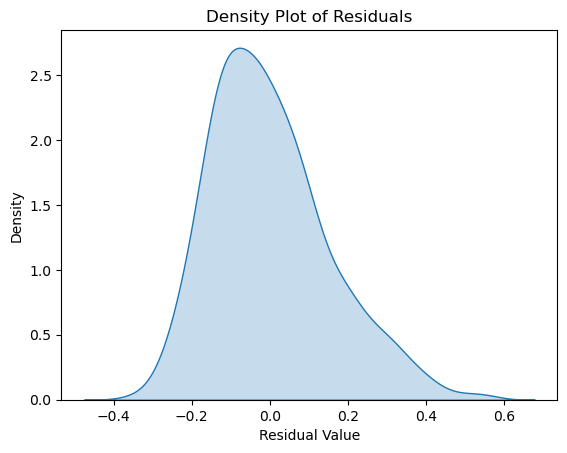

In [163]:
## plot residue

residuals_1 = model.resid



# Density plot of residuals
sns.kdeplot(residuals_1, shade=True)
plt.title('Density Plot of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Density')
plt.show()


In [164]:


# Step 1: Create squared terms
df_filtered_13_20_no_outlier_precinct['violent_crime_squared'] = df_filtered_13_20_no_outlier_precinct['violent_crime_transform_log'] ** 2
df_filtered_13_20_no_outlier_precinct['property_crime_squared'] = df_filtered_13_20_no_outlier_precinct['property_crime_transform_log'] ** 2

# Step 2: Run the regression
X = df_filtered_13_20_no_outlier_precinct[['violent_crime_squared', 'property_crime_squared']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df_filtered_13_20_no_outlier_precinct['Budget_pct_transform_log']

model = sm.OLS(y, X).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Budget_pct_transform_log   R-squared:                       0.518
Model:                                  OLS   Adj. R-squared:                  0.516
Method:                       Least Squares   F-statistic:                     281.6
Date:                      Sun, 21 Jan 2024   Prob (F-statistic):           8.75e-84
Time:                              14:20:03   Log-Likelihood:                 302.31
No. Observations:                       527   AIC:                            -598.6
Df Residuals:                           524   BIC:                            -585.8
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\3918468949.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\3918468949.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\4035214797.py:8: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




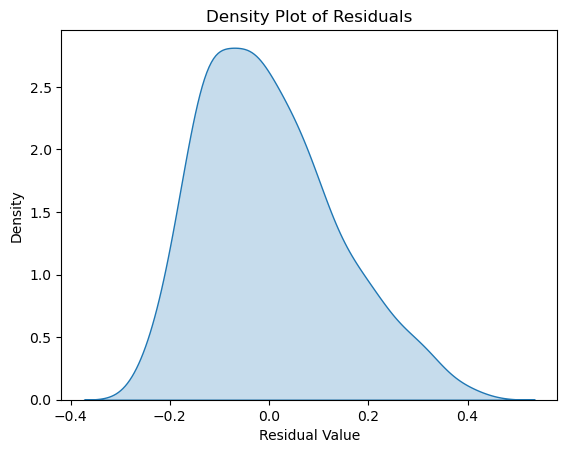

In [165]:
## plot residue

residuals_1 = model.resid



# Density plot of residuals
sns.kdeplot(residuals_1, shade=True)
plt.title('Density Plot of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Density')
plt.show()

In [166]:
# Step 1: Create squared terms
df_filtered_13_20['violent_crime_squared'] = df_filtered_13_20['violent_crime_transform_log'] ** 2
#df_filtered_13_20['property_crime_squared'] = df_filtered_13_20['property_crime_transform_log'] ** 2

# Step 2: Run the regression
X = df_filtered_13_20[['violent_crime_squared']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df_filtered_13_20['Budget_pct_transform_log']

model = sm.OLS(y, X).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Budget_pct_transform_log   R-squared:                       0.424
Model:                                  OLS   Adj. R-squared:                  0.423
Method:                       Least Squares   F-statistic:                     421.8
Date:                      Sun, 21 Jan 2024   Prob (F-statistic):           1.16e-70
Time:                              14:20:03   Log-Likelihood:                 248.19
No. Observations:                       575   AIC:                            -492.4
Df Residuals:                           573   BIC:                            -483.7
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\1827709846.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [167]:
import numpy as np
from scipy import stats
from scipy import ndimage

def transfer_entropy(X,Y,delay=1,gaussian_sigma=None):
	'''
	TE implementation: asymmetric statistic measuring the reduction in uncertainty
	for a future value of X given the history of X and Y. Or the amount
	of information from Y to X. Calculated through the Kullback-Leibler divergence 
	with conditional probabilities

	author: Sebastiano Bontorin
	mail: sbontorin@fbk.eu

	args:
		- X (1D array):
			time series of scalars (1D array)
		- Y (1D array):
			time series of scalars (1D array)
	kwargs:
		- delay (int): 
			step in tuple (x_n, y_n, x_(n - delay))
		- gaussian_sigma (int):
			sigma to be used
			default set at None: no gaussian filtering applied
	returns:
		- TE (float):
			transfer entropy between X and Y given the history of X
	'''

	if len(X)!=len(Y):
		raise ValueError('time series entries need to have same length')

	n = float(len(X[delay:]))

	# number of bins for X and Y using Freeman-Diaconis rule
	# histograms built with numpy.histogramdd
	binX = int( (max(X)-min(X))
				/ (2* stats.iqr(X) / (len(X)**(1.0/3))) )
	binY = int( (max(Y)-min(Y))
				/ (2* stats.iqr(Y) / (len(Y)**(1.0/3))) )

	# Definition of arrays of shape (D,N) to be transposed in histogramdd()
	x3 = np.array([X[delay:],Y[:-delay],X[:-delay]])
	x2 = np.array([X[delay:],Y[:-delay]])
	x2_delay = np.array([X[delay:],X[:-delay]])

	p3,bin_p3 = np.histogramdd(
		sample = x3.T,
		bins = [binX,binY,binX])

	p2,bin_p2 = np.histogramdd(
		sample = x2.T,
		bins=[binX,binY])

	p2delay,bin_p2delay = np.histogramdd(
		sample = x2_delay.T,
		bins=[binX,binX])

	p1,bin_p1 = np.histogramdd(
		sample = np.array(X[delay:]),
		bins=binX)

	# Hists normalized to obtain densities
	p1 = p1/n
	p2 = p2/n
	p2delay = p2delay/n
	p3 = p3/n

	# If True apply gaussian filters at given sigma to the distributions
	if gaussian_sigma is not None:
		s = gaussian_sigma
		p1 = ndimage.gaussian_filter(p1, sigma=s)
		p2 = ndimage.gaussian_filter(p2, sigma=s)
		p2delay = ndimage.gaussian_filter(p2delay, sigma=s)
		p3 = ndimage.gaussian_filter(p3, sigma=s)

	# Ranges of values in time series
	Xrange = bin_p3[0][:-1]
	Yrange = bin_p3[1][:-1]
	X2range = bin_p3[2][:-1]

	# Calculating elements in TE summation
	elements = []
	for i in range(len(Xrange)):
		px = p1[i]
		for j in range(len(Yrange)):
			pxy = p2[i][j]

			for k in range(len(X2range)):
				pxx2 = p2delay[i][k]
				pxyx2 = p3[i][j][k]

				arg1 = float(pxy*pxx2)
				arg2 = float(pxyx2*px)

				# Corrections avoding log(0)
				if arg1 == 0.0: arg1 = float(1e-8)
				if arg2 == 0.0: arg2 = float(1e-8)

				term = pxyx2*np.log2(arg2) - pxyx2*np.log2(arg1) 
				elements.append(term)

	# Transfer Entropy
	TE = np.sum(elements)
	return TE

In [168]:
# Extracting data
df_filtered_13_20_sort = df_filtered_13_20.sort_values(by=['Year', 'Precinct'])

Y = df_filtered_13_20_sort['Budget_pct_transform_log'].to_numpy()
X1 = df_filtered_13_20_sort['violent_crime_transform_log'].to_numpy()
X2 = df_filtered_13_20_sort['property_crime_transform_log'].to_numpy()

# Calculating Transfer Entropy for X1 (violent crime)
TE_X1 = transfer_entropy(X1, Y)
print(f"Transfer Entropy from Budget_pct_transform_log to violent_crime_transform_log: {TE_X1}")

# Calculating Transfer Entropy for X2 (property crime)
TE_X2 = transfer_entropy(X2, Y)
print(f"Transfer Entropy from Budget_pct_transform_log to property_crime_transform_log: {TE_X2}")

Transfer Entropy from Budget_pct_transform_log to violent_crime_transform_log: 1.440516999660527
Transfer Entropy from Budget_pct_transform_log to property_crime_transform_log: 1.374838440556117


In [169]:
# Extracting data

Y = df_filtered_13_20['Budget_pct_transform_log'].to_numpy()
X1 = df_filtered_13_20['violent_crime_transform_log'].to_numpy()
X2 = df_filtered_13_20['property_crime_transform_log'].to_numpy()

# Calculating Transfer Entropy for X1 (violent crime)
TE_X1 = transfer_entropy(X1, Y)
print(f"Transfer Entropy from Budget_pct_transform_log to violent_crime_transform_log: {TE_X1}")

# Calculating Transfer Entropy for X2 (property crime)
TE_X2 = transfer_entropy(X2, Y)
print(f"Transfer Entropy from Budget_pct_transform_log to property_crime_transform_log: {TE_X2}")

Transfer Entropy from Budget_pct_transform_log to violent_crime_transform_log: 1.440516999660527
Transfer Entropy from Budget_pct_transform_log to property_crime_transform_log: 1.374838440556117


In [170]:
# Extracting data
df_filtered_13_20_sort = df_filtered_13_20.sort_values(by=['Year', 'Precinct'])

Y = df_filtered_13_20_sort['Budget_pct_transform_log'].to_numpy()
X1 = df_filtered_13_20_sort['violent_crime_transform_log'].to_numpy()
X2 = df_filtered_13_20_sort['property_crime_transform_log'].to_numpy()

# Calculating Transfer Entropy for X1 (violent crime)
TE_X1 = transfer_entropy(Y, X1)
print(f"Transfer Entropy from violent_crime_transform_log to Budget_pct_transform_log: {TE_X1}")

# Calculating Transfer Entropy for X2 (property crime)
TE_X2 = transfer_entropy(Y, X2)
print(f"Transfer Entropy from property_crime_transform_log to Budget_pct_transform_log: {TE_X2}")

Transfer Entropy from violent_crime_transform_log to Budget_pct_transform_log: 1.4290668252760346
Transfer Entropy from property_crime_transform_log to Budget_pct_transform_log: 1.403860051416217


In [171]:
df_filtered_13_20

Year  Precinct  Full Time Positions    Budget          Borough  \
365  2013         1                  218  20817512  MANHATTAN SOUTH   
366  2013         5                  190  11710462  MANHATTAN SOUTH   
367  2013         6                  218  13693888  MANHATTAN SOUTH   
368  2013         7                  174  12565039  MANHATTAN SOUTH   
369  2013         9                  208  12764786  MANHATTAN SOUTH   
..    ...       ...                  ...       ...              ...   
943  2020       114                  252  20251282     QUEENS NORTH   
944  2020       115                  289  17972579     QUEENS NORTH   
945  2020       120                  399  26776288    STATEN ISLAND   
946  2020       122                  249  18356669    STATEN ISLAND   
947  2020       123                  148  13281550    STATEN ISLAND   

     Citizen_2010 Poverty Rate_2010 Immigration Rates 2010  Budget per Capita  \
365         44138             6.12%                 33.16%             315.26   
366         37193            24.59%                 29.40%             222.28   
367         50266             6.20%                 19.22%             220.07   
368         43853            29.72%                 22.03%             223.42   
369         58772            21.06%                 23.12%             166.98   
..            ...               ...                    ...                ...   
943        129728            16.62%                 36.02%              99.88   
944         80034            19.76%                 53.35%             104.75   
945         73854            19.79%                 34.39%             237.87   
946        103552             9.18%                 25.49%             132.08   
947         75250             7.23%                 23.13%             135.67   

     BURGLARY  FELONY ASSAULT  GRAND LARCENY  GRAND LARCENY OF MOTOR VEHICLE  \
365       171              87           1051                              27   
366        92             167            599                              12   
367       132             135           1253                              33   
368        67             106            362                              24   
369       165             152            904                              46   
..        ...             ...            ...                             ...   
943       273             357            698                             245   
944       167             311            526                             204   
945       105             238            260                              73   
946        92             110            235                              72   
947        41              59            178                              45   

     MURDER & NON NEGL. MANSLAUGHTER  RAPE  ROBBERY  \
365                                0    12       68   
366                                3     5      102   
367                                2     8      140   
368                                1     6      145   
369                                2    18      137   
..                               ...   ...      ...   
943                                7    22      191   
944                               11    29      219   
945                               12    24      103   
946                                1     7       49   
947                                0     4       14   

     TOTAL SEVEN MAJOR FELONY OFFENSES  Shootings  burglary_by_year  \
365                               1416        1.0             16804   
366                                980        2.0             16804   
367                               1703        1.0             16804   
368                                711        3.0             16804   
369                               1424        5.0             16804   
..                                 ...        ...               ...   
943                               1793       24.0           

In [172]:
# import numpy as np
# from scipy.stats import iqr

# def compute_joint_entropy_3d(data_y, data_x1, data_x2, bin_y, bin_x1, bin_x2):
#     """Compute joint entropy from the histograms of the data for three datasets."""
#     hist, _ = np.histogramdd([data_y, data_x1, data_x2], bins=[bin_y, bin_x1, bin_x2], density=True)
#     hist = hist / hist.sum()
#     joint_entropy = -np.nansum(hist * np.log2(hist + 1e-12))  # added a small value to avoid log(0)
#     return joint_entropy

# def compute_conditional_entropy(data_y, data_x1, data_x2):
#     """Compute the conditional entropy H(Y|X1, X2)"""
#     # Bin calculation using the Freedman-Diaconis rule
#     bin_y = int((max(data_y) - min(data_y)) / (2 * iqr(data_y) / len(data_y)**(1/3)))
#     bin_x1 = int((max(data_x1) - min(data_x1)) / (2 * iqr(data_x1) / len(data_x1)**(1/3)))
#     bin_x2 = int((max(data_x2) - min(data_x2)) / (2 * iqr(data_x2) / len(data_x2)**(1/3)))

#     # Calculate the joint entropies
#     joint_entropy_y_x1_x2 = compute_joint_entropy_3d(data_y, data_x1, data_x2, bin_y, bin_x1, bin_x2)
#     joint_entropy_x1_x2 = compute_joint_entropy(data_x1, data_x2, bin_x1, bin_x2)

#     # Conditional entropy calculation
#     conditional_entropy = joint_entropy_y_x1_x2 - joint_entropy_x1_x2

#     return conditional_entropy

# # Sample usage
# Y = df_filtered_13_20['Budget_pct_transform_log'].values
# X1 = df_filtered_13_20['violent_crime_transform_log'].values
# X2 = df_filtered_13_20['property_crime_transform_log'].values

# cond_entropy = compute_conditional_entropy(Y, X1, X2)
# print(f"Conditional Entropy H(Y|X1, X2): {cond_entropy}")


In [173]:
# # Function to compute the joint entropy
# def compute_joint_entropy(data_x, data_y, bins_x, bins_y):
#     """Compute joint entropy from the histograms of the data."""
#     hist, _, _ = np.histogram2d(data_x, data_y, bins=[bins_x, bins_y], density=True)
#     hist = hist / hist.sum()
#     joint_entropy = -np.nansum(hist * np.log2(hist))
#     return joint_entropy

# # Your data
# Y = df_filtered_13_20['Budget_pct_transform_log'].values
# X1 = df_filtered_13_20['violent_crime_transform_log'].values
# X2 = df_filtered_13_20['property_crime_transform_log'].values

# # Number of bins for X1, X2, and Y using the Freedman-Diaconis rule
# bin_y = int((max(Y) - min(Y)) / (2 * (np.percentile(Y, 75) - np.percentile(Y, 25)) / len(Y)**(1/3)))
# bin_x1 = int((max(X1) - min(X1)) / (2 * (np.percentile(X1, 75) - np.percentile(X1, 25)) / len(X1)**(1/3)))
# bin_x2 = int((max(X2) - min(X2)) / (2 * (np.percentile(X2, 75) - np.percentile(X2, 25)) / len(X2)**(1/3)))

# # Compute the joint entropies
# joint_entropy_y_x1 = compute_joint_entropy(Y, X1, bin_y, bin_x1)
# joint_entropy_y_x2 = compute_joint_entropy(Y, X2, bin_y, bin_x2)

# # Compute the entropies for X1 and X2
# entropy_X1 = compute_entropy(X1, bin_x1)
# entropy_X2 = compute_entropy(X2, bin_x2)

# # Compute the conditional entropies
# cond_entropy_y_given_x1 = joint_entropy_y_x1 - entropy_X1
# cond_entropy_y_given_x2 = joint_entropy_y_x2 - entropy_X2

# print(f"Conditional Entropy H(Y|X1): {cond_entropy_y_given_x1}")
# print(f"Conditional Entropy H(Y|X2): {cond_entropy_y_given_x2}")

In [174]:
import numpy as np

def compute_entropy(data, bins):
    """Compute the entropy of a dataset using histograms."""
    # Compute the histogram
    hist, bin_edges = np.histogram(data, bins=bins, density=True)
    
    # Compute the probabilities for each bin
    probs = hist * np.diff(bin_edges)
    
    # Calculate the entropy
    entropy = -np.sum(probs * np.where(probs != 0, np.log2(probs), 0))

    return entropy

# Assuming you have already loaded the data for Y
Y = df_filtered_13_20['Budget_pct_transform_log'].values

# Calculate the number of bins using the Freedman-Diaconis rule
bin_y = int((max(Y) - min(Y)) / (2 * (np.percentile(Y, 75) - np.percentile(Y, 25)) / len(Y)**(1/3)))

# Compute the entropy
entropy_Y = compute_entropy(Y, bin_y)
print(f"Entropy H(Y): {entropy_Y}")

Entropy H(Y): 3.4716181076851056


In [175]:
crime_index_transform_log

0     -0.692542
1     -0.741902
2     -0.102064
3     -0.508460
4     -0.336392
         ...   
943    0.541201
944    0.967808
945    0.276362
946    0.087346
947   -0.642383
Name: CRIME_Index_pct_lag1, Length: 948, dtype: float64

In [176]:
# Extracting data
Y = df_filtered_13_20['Budget_pct_transform_log'].to_numpy()
X1 = df_filtered_13_20['crime_index_transform_log'].to_numpy()

# Calculating Transfer Entropy for X1 (violent crime)
TE_X1 = transfer_entropy(Y, X1)
print(f"Transfer Entropy from crime_index_transform_log to Budget_pct_transform_log: {TE_X1}")

# Calculating Transfer Entropy for X2 (property crime)
TE_X2 = transfer_entropy(X1, Y)
print(f"Transfer Entropy from Budget_pct_transform_log to crime_index_transform_log: {TE_X2}")

Transfer Entropy from crime_index_transform_log to Budget_pct_transform_log: 1.3877240532752215
Transfer Entropy from Budget_pct_transform_log to crime_index_transform_log: 1.378572056762775


In [177]:
# Step 1: Create squared terms
df_filtered_13_20['violent_crime_squared'] = df_filtered_13_20['violent_crime_transform_log'] ** 2
df_filtered_13_20['property_crime_squared'] = df_filtered_13_20['property_crime_transform_log'] ** 2

# Step 2: Run the regression
X = df_filtered_13_20['violent_crime_squared']
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df_filtered_13_20['Budget_pct_transform_log']

model = sm.OLS(y, X).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Budget_pct_transform_log   R-squared:                       0.424
Model:                                  OLS   Adj. R-squared:                  0.423
Method:                       Least Squares   F-statistic:                     421.8
Date:                      Sun, 21 Jan 2024   Prob (F-statistic):           1.16e-70
Time:                              14:20:04   Log-Likelihood:                 248.19
No. Observations:                       575   AIC:                            -492.4
Df Residuals:                           573   BIC:                            -483.7
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\2040349397.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\2040349397.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [178]:
residuals_clean = model_cleaned.resid
from scipy.stats import shapiro

# Your sample data
data = residuals_clean  # Replace [...] with your data

# Perform the Shapiro-Wilk test
stat, p = shapiro(data)

# Print the results
print(f'Statistic: {stat}')
print(f'p-value: {p}')

# Interpretation
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistic: 0.9686740040779114
p-value: 3.5490772543056437e-09
Data does not look Gaussian (reject H0)


In [179]:
# Test OLS on Budget_pct i,t = Violent crime_lag1_i,t + Property_crime_lag1 i, t + Budget_pct i, t-1 
#Using boxcox transform

# df['violent_crime_transform'] = violent_crime_transform
# df['property_crime_transform'] = property_crime_transform
# df['Budget_pct_transform'] = Budget_pct_transform
# df['Budget_pct_transform_lag1'] = Budget_pct_lag1_transform
# df['CRIME_Index_pct_transform_lag1'] = crime_index_transform




# #CRIME_Index_pct_lag1

# X = df[['const', 'violent_crime_transform', 'property_crime_transform', 'Budget_pct_transform_lag1']]
# y = df['Budget_pct_transform']
# model_transformed_2 = sm.OLS(y, X).fit()
# print(model_transformed_2.summary())

# X = df[['const', 'violent_crime_transform', 'property_crime_transform', 'Budget_pct_transform_lag1']]
# y = df['Budget_pct_transform']
# model_transformed = sm.OLS(y, X).fit()
# print(model_transformed.summary())

# X = df[['const', 'CRIME_Index_pct_transform_lag1', 'Budget_pct_transform_lag1']]
# y = df['Budget_pct_transform']
# model_transformed_3 = sm.OLS(y, X).fit()
# print(model_transformed_3.summary())

# X = df[['const', 'CRIME_Index_pct_transform_lag1', 'Budget_pct_transform_lag1']]
# y = df['Budget_pct_transform']
# model_transformed_4 = sm.OLS(y, X).fit()
# print(model_transformed_4.summary())

In [180]:
Budget_per_capita_pct = pre_ts_analysis_no_2022_clean['Budget_per_capita_pct']
Budget_per_capita_lag1_pct = pre_ts_analysis_no_2022_clean['Budget_per_capita_lag1_pct']
ViolentCrime_per_capita_lag1_pct = pre_ts_analysis_no_2022_clean['ViolentCrime_per_capita_lag1_pct']
PropertyCrime_per_capita_lag1_pct = pre_ts_analysis_no_2022_clean['PropertyCrime_per_capita_lag1_pct']
CRIME_Index_per_capita_lag1_pct = pre_ts_analysis_no_2022_clean['CRIME_Index_per_capita_lag1_pct']

Budget_per_capita_pct_log = np.log(Budget_per_capita_pct)
Budget_per_capita_lag1_pct_log = np.log(Budget_per_capita_lag1_pct)
ViolentCrime_per_capita_lag1_pct_log = np.log(ViolentCrime_per_capita_lag1_pct)
PropertyCrime_per_capita_lag1_pct_log = np.log(PropertyCrime_per_capita_lag1_pct)
CRIME_Index_per_capita_lag1_pct_log = np.log(CRIME_Index_per_capita_lag1_pct)
# check_7 = pre_ts_analysis.groupby('Year')['CRIME_Index_per_capita_lag1_pct'].sum()
# check_8 = pre_ts_analysis.groupby('Year')['ViolentCrime_per_capita_lag1_pct'].sum()
# check_9 = pre_ts_analysis.groupby('Year')['PropertyCrime_per_capita_lag1_pct'].sum()

In [181]:
#### Build Budeg_per_capita_pct

# violent_crime_pct_lag1, property_crime_pct_lag1, crime_index


#df = pre_ts_analysis_no_2022_clean

# Capture best lambda values from Boxcox transformations across all columns 

lambdas = {}

ViolentCrime_per_capita_lag1_pct_transform, lambdas["ViolentCrime_per_capita_lag1_pct"] = boxcox(ViolentCrime_per_capita_lag1_pct)
PropertyCrime_per_capita_lag1_pct_transform, lambdas["PropertyCrime_per_capita_lag1_pct"] = boxcox(PropertyCrime_per_capita_lag1_pct)
CRIME_Index_per_capita_lag1_pct_transform, lambdas["CRIME_Index_per_capita_lag1_pct"] = boxcox(CRIME_Index_per_capita_lag1_pct)
# Budget_pct_transform, lambdas["Budget_pct"] = boxcox(Budget_pct)
# Budget_pct_lag1_transform, lambdas["Budget_pct_lag1"] = boxcox(Budget_pct_lag1)

#for col in df.columns:
#    df[col], lambdas[col] = boxcox(df[col])

#    print(lambdas)

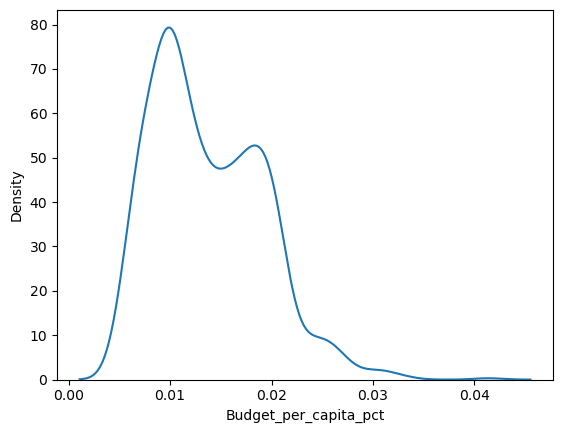

In [182]:
sns.kdeplot(Budget_per_capita_pct)
plt.show()

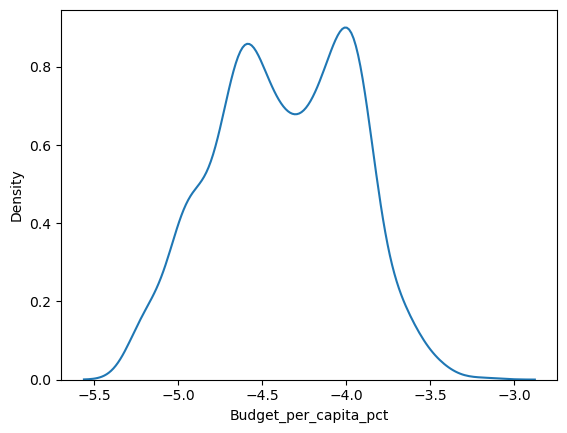

In [183]:
sns.kdeplot(Budget_per_capita_pct_log)
plt.show()

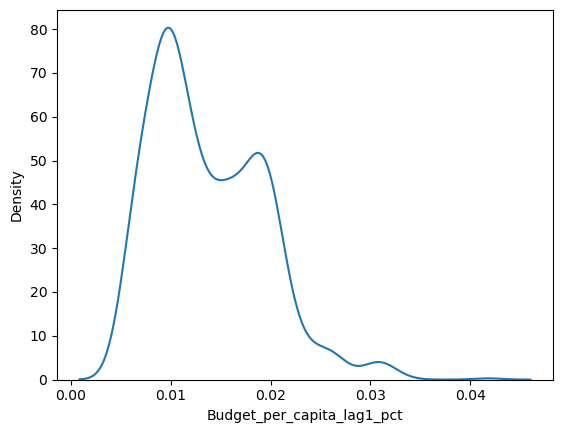

In [184]:
sns.kdeplot(Budget_per_capita_lag1_pct)
plt.show()

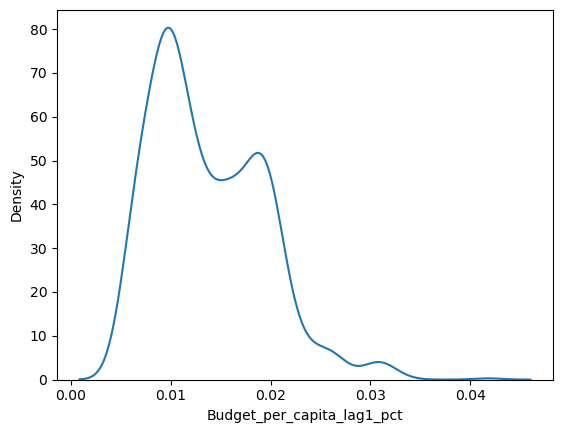

In [185]:
sns.kdeplot(Budget_per_capita_lag1_pct)
plt.show()

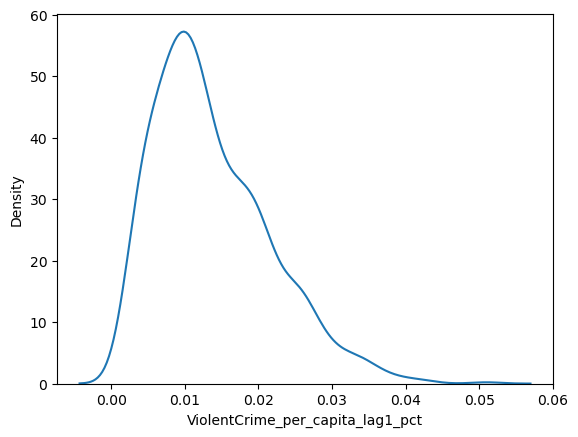

In [186]:
sns.kdeplot(ViolentCrime_per_capita_lag1_pct)
plt.show()

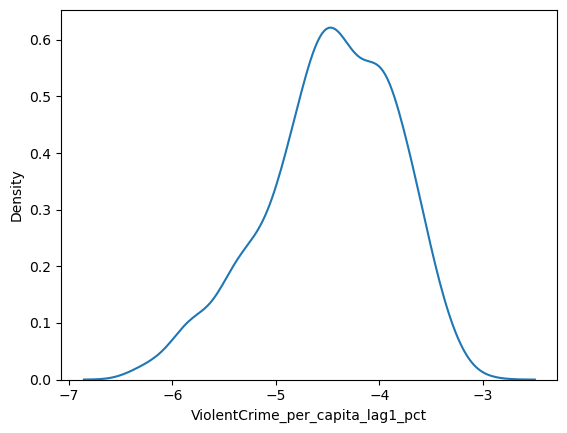

In [187]:
sns.kdeplot(ViolentCrime_per_capita_lag1_pct_log)
plt.show()

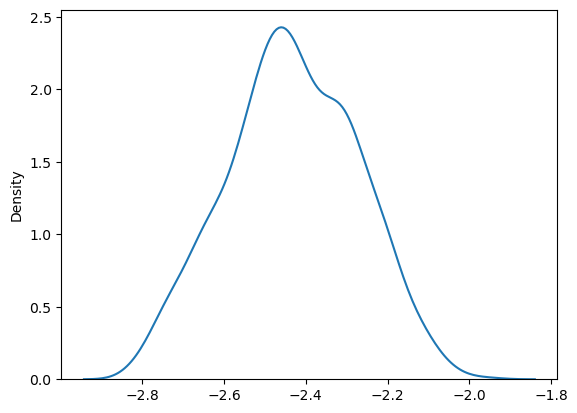

In [188]:
ViolentCrime_per_capita_lag1_pct_transform
sns.kdeplot(ViolentCrime_per_capita_lag1_pct_transform)
plt.show()

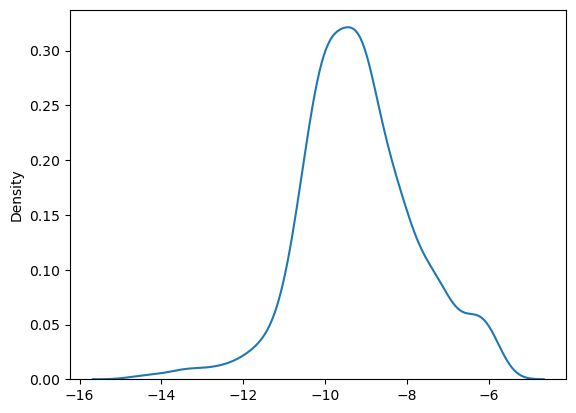

In [189]:
sns.kdeplot(PropertyCrime_per_capita_lag1_pct_transform)
plt.show()

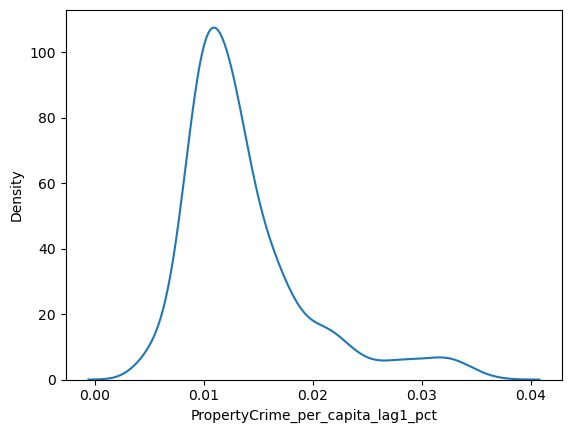

In [190]:

sns.kdeplot(PropertyCrime_per_capita_lag1_pct)
plt.show()

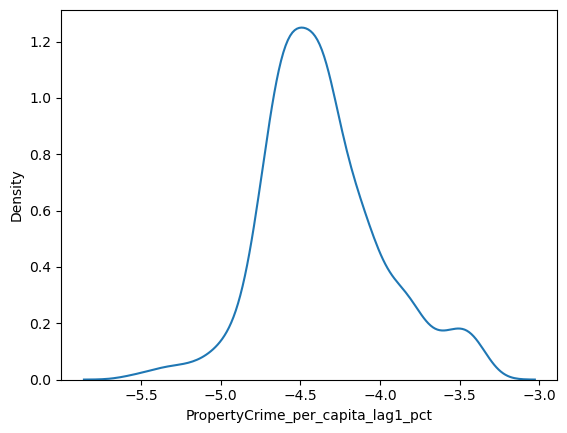

In [191]:

sns.kdeplot(PropertyCrime_per_capita_lag1_pct_log)
plt.show()

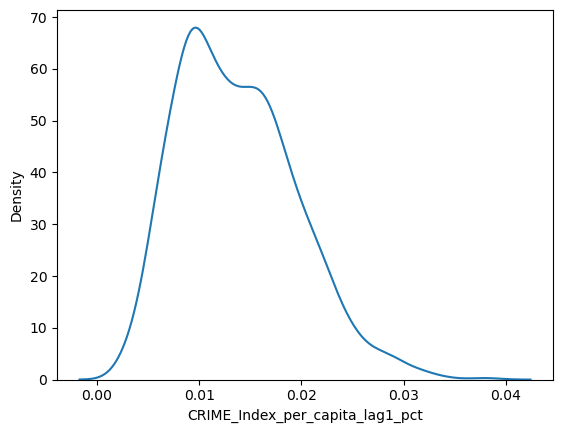

In [192]:
sns.kdeplot(CRIME_Index_per_capita_lag1_pct)
plt.show()

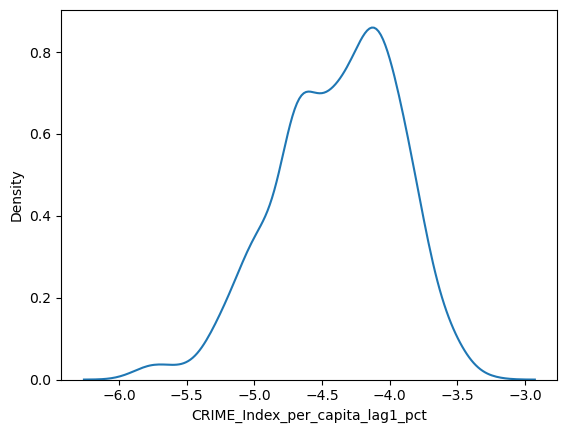

In [193]:
sns.kdeplot(CRIME_Index_per_capita_lag1_pct_log)
plt.show()

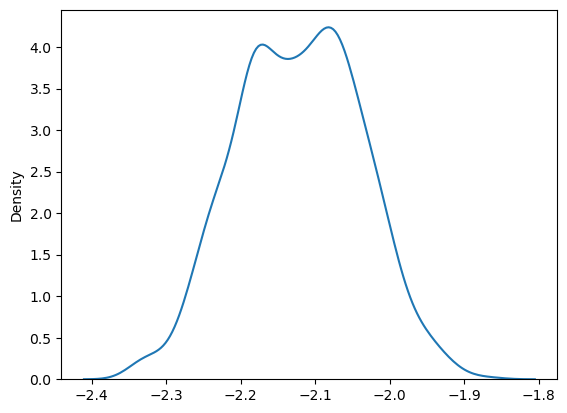

In [194]:
sns.kdeplot(CRIME_Index_per_capita_lag1_pct_transform)
plt.show()

In [195]:
##OLS before data transformation

# Budget_per_capita_pct = pre_ts_analysis_no_2022_clean['Budget_per_capita_pct']
# Budget_per_capita_lag1_pct = pre_ts_analysis_no_2022_clean['Budget_per_capita_lag1_pct']
# ViolentCrime_per_capita_lag1_pct = pre_ts_analysis_no_2022_clean['ViolentCrime_per_capita_lag1_pct']
# PropertyCrime_per_capita_lag1_pct = pre_ts_analysis_no_2022_clean['PropertyCrime_per_capita_lag1_pct']
# CRIME_Index_per_capita_lag1_pct = pre_ts_analysis_no_2022_clean['CRIME_Index_per_capita_lag1_pct']

# Budget_per_capita_pct_log = np.log(Budget_per_capita_pct)
# Budget_per_capita_lag1_pct_log = np.log(Budget_per_capita_lag1_pct)
# ViolentCrime_per_capita_lag1_pct_log = np.log(ViolentCrime_per_capita_lag1_pct)
# PropertyCrime_per_capita_lag1_pct_log = np.log(PropertyCrime_per_capita_lag1_pct)
# CRIME_Index_per_capita_lag1_pct_log = np.log(CRIME_Index_per_capita_lag1_pct)

X = df[['const', 'ViolentCrime_per_capita_lag1_pct', 'PropertyCrime_per_capita_lag1_pct', 'Budget_per_capita_lag1_pct']]
y = df['Budget_per_capita_pct']
model_transformed_2 = sm.OLS(y, X).fit()
print(model_transformed_2.summary())

X = df[['const', 'CRIME_Index_per_capita_lag1_pct', 'Budget_per_capita_lag1_pct']]
y = df['Budget_per_capita_pct']
model_transformed = sm.OLS(y, X).fit()
print(model_transformed.summary())



                              OLS Regression Results                             
Dep. Variable:     Budget_per_capita_pct   R-squared:                       0.932
Model:                               OLS   Adj. R-squared:                  0.932
Method:                    Least Squares   F-statistic:                     4284.
Date:                   Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                           14:20:06   Log-Likelihood:                 4803.0
No. Observations:                    935   AIC:                            -9598.
Df Residuals:                        931   BIC:                            -9579.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [196]:
df['Budget_per_capita_pct_log'] = Budget_per_capita_pct_log
df['Budget_per_capita_lag1_pct_log'] = Budget_per_capita_lag1_pct_log
df['ViolentCrime_per_capita_lag1_pct_log'] = ViolentCrime_per_capita_lag1_pct_log
df['PropertyCrime_per_capita_lag1_pct_log'] = PropertyCrime_per_capita_lag1_pct_log
df['CRIME_Index_per_capita_lag1_pct_log'] = CRIME_Index_per_capita_lag1_pct_log

# Budget_per_capita_pct_log = np.log(Budget_per_capita_pct)
# Budget_per_capita_lag1_pct_log = np.log(Budget_per_capita_lag1_pct)
# ViolentCrime_per_capita_lag1_pct_log = np.log(ViolentCrime_per_capita_lag1_pct)
# PropertyCrime_per_capita_lag1_pct_log = np.log(PropertyCrime_per_capita_lag1_pct)
# CRIME_Index_per_capita_lag1_pct_log = np.log(CRIME_Index_per_capita_lag1_pct)

X = df[['const', 'ViolentCrime_per_capita_lag1_pct_log', 'PropertyCrime_per_capita_lag1_pct_log', 'Budget_per_capita_lag1_pct_log']]
y = df['Budget_per_capita_pct_log']
model_transformed_2 = sm.OLS(y, X).fit()
print(model_transformed_2.summary())

X = df[['const', 'CRIME_Index_per_capita_lag1_pct_log', 'Budget_per_capita_lag1_pct_log']]
y = df['Budget_per_capita_pct_log']
model_transformed = sm.OLS(y, X).fit()
print(model_transformed.summary())

                                OLS Regression Results                               
Dep. Variable:     Budget_per_capita_pct_log   R-squared:                       0.968
Model:                                   OLS   Adj. R-squared:                  0.968
Method:                        Least Squares   F-statistic:                     9494.
Date:                       Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                               14:20:06   Log-Likelihood:                 1134.0
No. Observations:                        935   AIC:                            -2260.
Df Residuals:                            931   BIC:                            -2241.
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\4038314654.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\4038314654.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yinwe\AppData\Local\Temp\ipykernel_42420\4038314654.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [197]:
import pandas as pd

# Set the display to show maximum rows
pd.set_option('display.max_rows', None)

# Now when you run the command, it should display all rows
print(df.isna().sum())
pd.reset_option('display.max_rows')

Year                                                   0
Precinct                                               0
Full Time Positions                                    0
Budget                                                 0
Borough                                                0
Citizen_2010                                           0
Poverty Rate_2010                                      0
Immigration Rates 2010                                 0
Budget per Capita                                      0
BURGLARY                                               0
FELONY ASSAULT                                         0
GRAND LARCENY                                          0
GRAND LARCENY OF MOTOR VEHICLE                         0
MURDER & NON NEGL. MANSLAUGHTER                        0
RAPE                                                   0
ROBBERY                                                0
TOTAL SEVEN MAJOR FELONY OFFENSES                      0
Shootings                      